***
## Table of Contents
<br>
<ol>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;"> 70:30 Uninfected:Infected Users</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. 70:30 Train Test Split </h3></a>
            </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. 80:20 Train Test Split with PCA </h3></a>
        </ul>
        <ul>
            <a href='#1.D' style="text-decoration : none; color : #000000;"><h3>D. 70:30 Train Test Split with PCA </h3></a>
           </ul>
     </ol>
<br>

In [1]:
### Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline
pd.set_option("display.max_columns",40)
warnings.filterwarnings("ignore")

from IPython.display import HTML


import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,binarize
from pandas_ml import ConfusionMatrix


Using TensorFlow backend.


In [2]:


### Function get_params takes as input a grid search model and prints out the best parameters for the model and 
### prints the best accuracy of the model
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

### The function takes as input the model, X and Y data to generate the confusion matrix  
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    display(cm)
    return cm
 
### The get accuracy plot takes as input a dataframe and a string for the title of the plot and displays a plot
### The function is primarily for plotting of accuracies for various classifiers for the same split.
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

### Function grid takes as input an estimator, X_train,Y_Train,X_test and Y_test and a string represetning the name of the model
### We perform StratifiedKFold cross validation and grid search to hypertune the parameters of the model     
def grid_acc(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold,n_jobs=-1)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    acc_train=accuracy_score(y,grid_search.predict(x))
    print("Accuracy of the ",model_name," model for the training data is:",acc_train)
    print("\nConfusion Matrix for Training data is:")
    cm_train=get_cm(grid_search,x,y)
    acc_test=accuracy_score(y_test,grid_search.predict(x_test))
    print("Accuracy of the ",model_name," model for test data is:",acc_test)
    print("\nConfusion Matrix for test data is:")
    cm_test=get_cm(grid_search,x_test,y_test)
    return grid_search,cm_train,cm_test,acc_train,acc_test    

### Plot roc curve
def get_roc_curve(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy on test data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

def get_roc_curve_deep_learning(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy of Logistic Model on training data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

### <a id='1.A' style="text-decoration : none; color : #000000;">A. 80:20 Train Test split </a>

#### Random State 0

In [3]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_0.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC        PAR  \
Source_User                                                           
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...   441  46.138322   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...   254  24.370079   

                                                          PAS        LEN  \
Source_User                                                                
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  29.460317  66.585034   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  21.968504  33.976378   

                                                            BYS           BYR  \
Source_User                                                                     
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  4755.390023  54162.571429   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  3180.610236  25776.055118   

                                                       SP   DP  NAPP  SIP  \
Source_User                                                                 
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  438.0  6.0    21   25   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  252.0  4.0    12    2   

                                                    DIP          TDIF  0000  \
Source_User                                                                   
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  132  10734.321995    14   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  108   1006.488189     0   

                                                    0100  0200  0300  0400  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    15     2     0     1   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     0     0   

                                                    0500  0600  0700  0800  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...     1     6    19    15   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     6   231   

                                                    0900  1000  1100  1200  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...     9    12    18    18   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     1     3     1     2   

                                                    1300  1400  1500  1600  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    21    33    49    86   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     2     1     3     1   

                                                    1700  1800  1900  2000  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    72    13     4    14   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     3     0     0     0   

                                                    2100  2200  2300  
Source_User                                                           
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    11     2     6  
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     0

In [4]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce66a9a4968c19e7923    0
0f12269fba4fbd7f6a9229708650d1511638053b127dc8df6d8ed628067c1c17    0
b343b9f652a841f55180dec62614b6f3f4ef123aa6c7bd4e11ba330f1f20ab1e    0
d4522f4975663af6ea4d8c261c8ff4ccca09ed099f1b4bf18c22a92219746d40    0
fd3ce5c94c3c37ad6e64bcd3fea156bce5f73d66ff8d5e38c668fd65d2fbad35    1
9bd426dc9dd76d55870bfa1d277228863be08643c1c251bfa01fbeea6befa548    0
64c7c7ab1002f853fec50dcb65b8d4ce104aa67df24a116fe47ab67d9816fda6    1
b232f1a6b8db7b92cce166503c5faafe30609a93860360536391ef9f827958ab    1
89085fa53e0136faacd2e660766c2af3e4f45890a9fe3954c72b9abd9706be63    0
13e3cf1c083c78d4313f1f000c24f9d1051d78d19a69725479c0c59cf105df0c    0
Name: Target, dtype: int64

In [5]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [6]:
## Table to store training and test measures
table_80_70_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  manhattan           50  uniform

Accuracy of the  KNN  model for the training data is: 0.79387675507

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3178   398     3576
1           659   893     1552
__all__    3837  1291     5128

Accuracy of the  KNN  model for test data is: 0.790951638066

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          809  102      911
1          166  205      371
__all__    975  307     1282

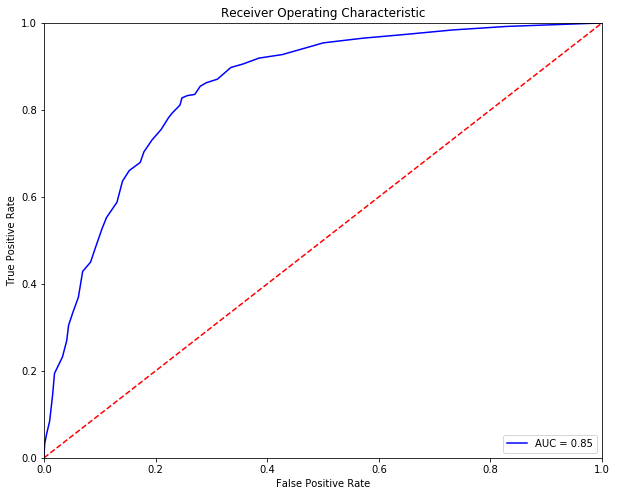

Optimal Threshold is 0.36
Accuracy on test data is: 0.780031201248


Predicted  0.0  1.0  __all__
Actual                      
0.0        720  191      911
1.0         91  280      371
__all__    811  471     1282

In [8]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [9]:
table_80_70_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [10]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5        50          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.778666146646

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3173   403     3576
1           732   820     1552
__all__    3905  1223     5128

Accuracy of the  Logistic  model for test data is: 0.785491419657

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          808  103      911
1          172  199      371
__all__    980  302     1282

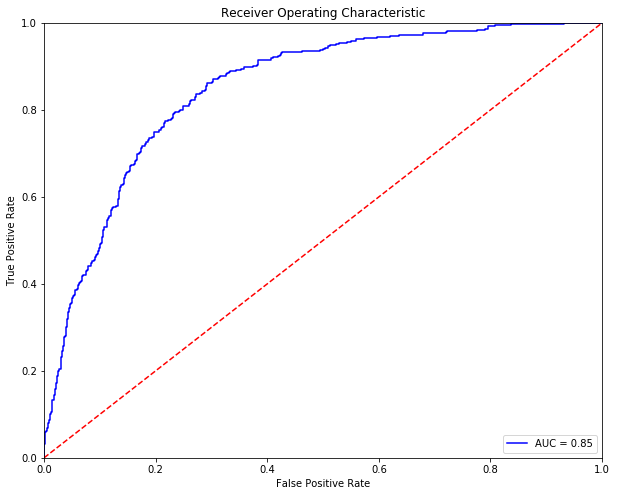

Optimal Threshold is 0.302990719313
Accuracy on test data is: 0.776911076443


Predicted  0.0  1.0  __all__
Actual                      
0.0        709  202      911
1.0         84  287      371
__all__    793  489     1282

In [11]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [12]:
table_80_70_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [13]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0        entropy         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           100      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.781591263651

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2846   730     3576
1           390  1162     1552
__all__    3236  1892     5128

Accuracy of the  Random Forest Trees  model for test data is: 0.784711388456

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          721  190      911
1           86  285      371
__all__    807  475     1282

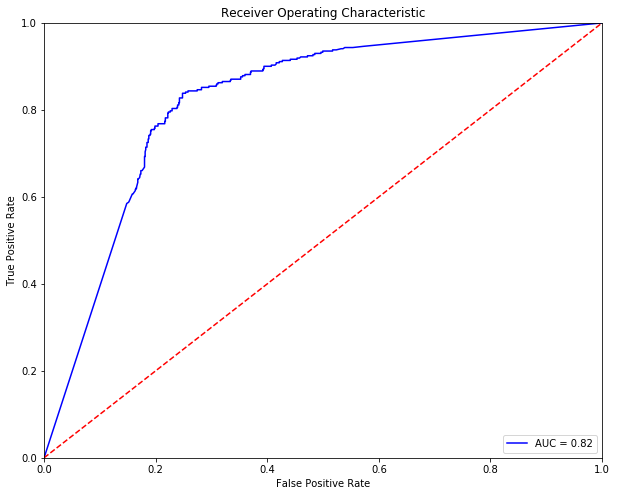

Optimal Threshold is 0.484335252434
Accuracy on test data is: 0.781591263651


Predicted  0.0  1.0  __all__
Actual                      
0.0        713  198      911
1.0         82  289      371
__all__    795  487     1282

In [14]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [15]:
table_80_70_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

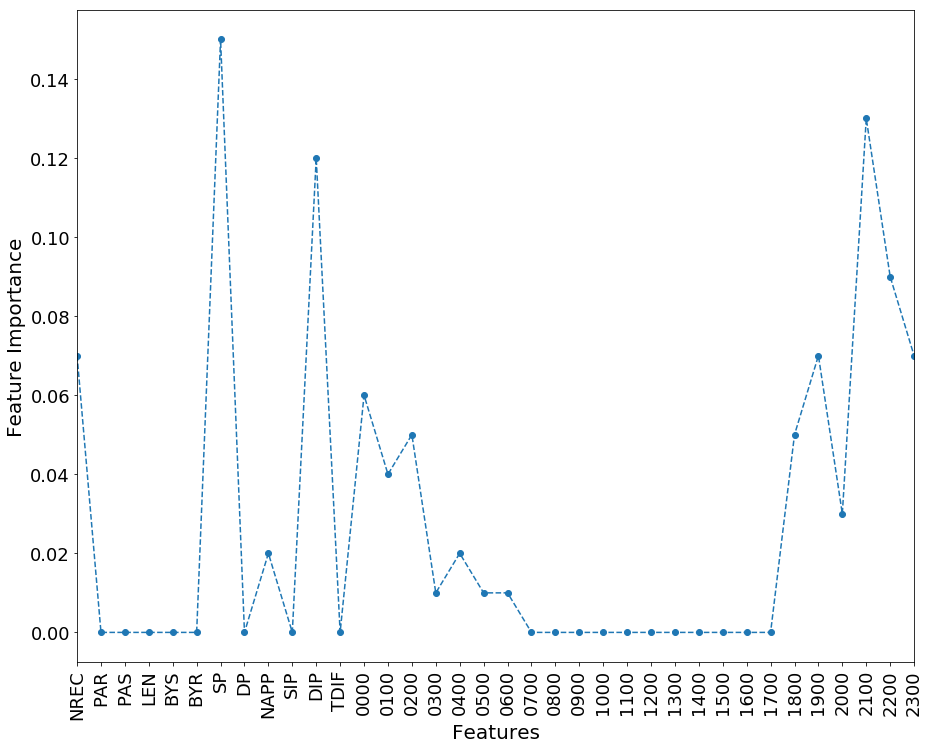

In [16]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [17]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5           150             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.814157566303

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3141   435     3576
1           518  1034     1552
__all__    3659  1469     5128

Accuracy of the  AdaBoostClassifier  model for test data is: 0.782371294852

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          777  134      911
1          145  226      371
__all__    922  360     1282

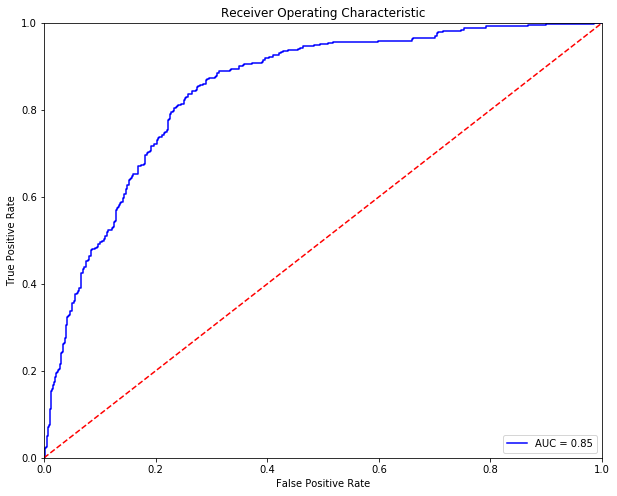

Optimal Threshold is 0.498402469746
Accuracy on test data is: 0.776911076443


Predicted  0.0  1.0  __all__
Actual                      
0.0        708  203      911
1.0         83  288      371
__all__    791  491     1282

In [18]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [19]:
table_80_70_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

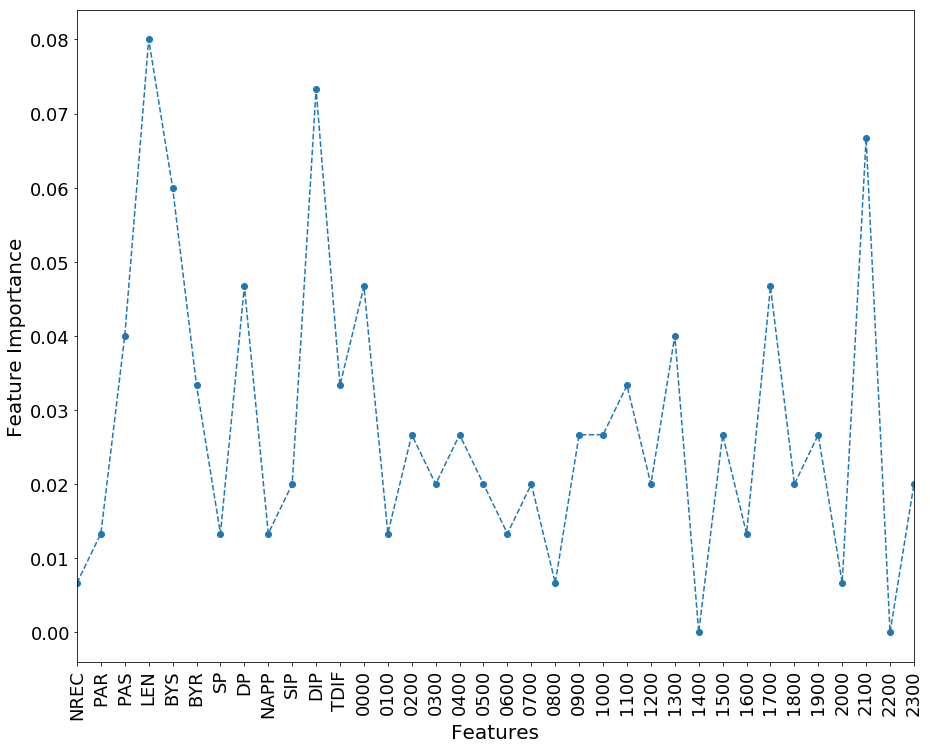

In [20]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [21]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse            0.1  exponential                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3            50             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.795046801872

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3017   559     3576
1           492  1060     1552
__all__    3509  1619     5128

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.784711388456

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          759  152      911
1          124  247      371
__all__    883  399     1282

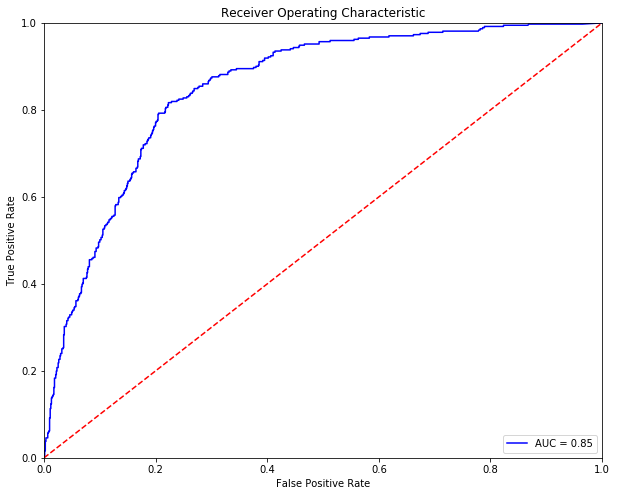

Optimal Threshold is 0.415529600177
Accuracy on test data is: 0.793291731669


Predicted  0.0  1.0  __all__
Actual                      
0.0        724  187      911
1.0         78  293      371
__all__    802  480     1282

In [22]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [23]:
table_80_70_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

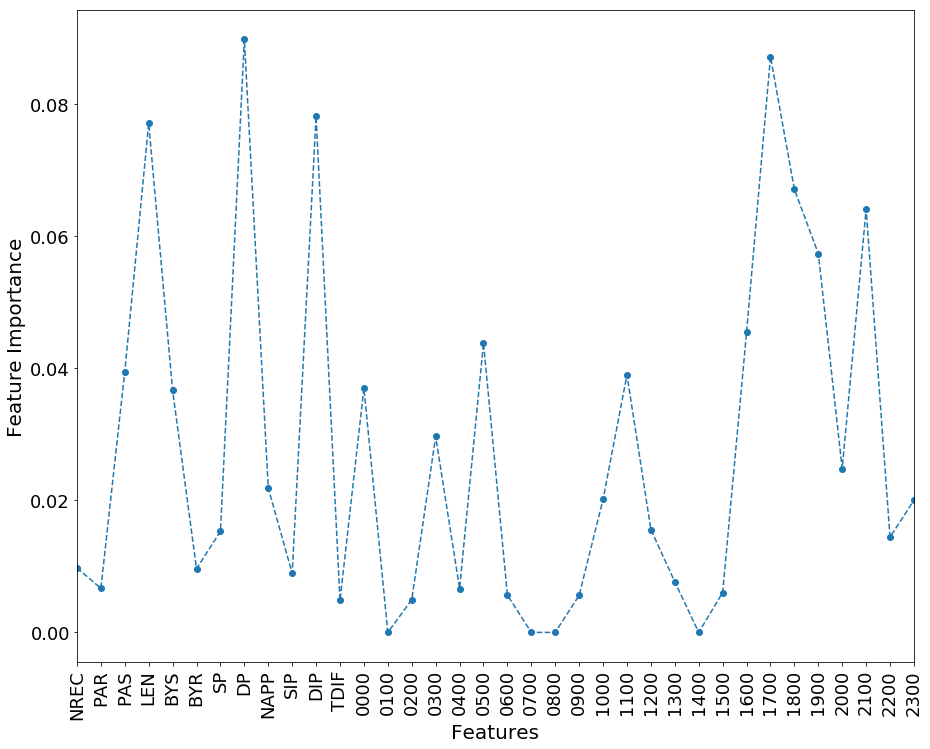

In [24]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [25]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.796216848674

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3147   429     3576
1           616   936     1552
__all__    3763  1365     5128

Accuracy of the  Extra Decision Tree  model for test data is: 0.777691107644

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          779  132      911
1          153  218      371
__all__    932  350     1282

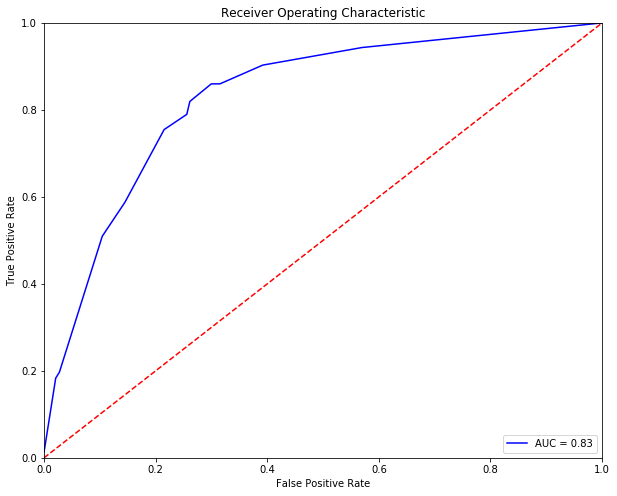

Optimal Threshold is 0.432692307692
Accuracy on test data is: 0.777691107644


Predicted  0.0  1.0  __all__
Actual                      
0.0        779  132      911
1.0        153  218      371
__all__    932  350     1282

In [26]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [27]:
table_80_70_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [28]:
%%capture
table_80_70_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

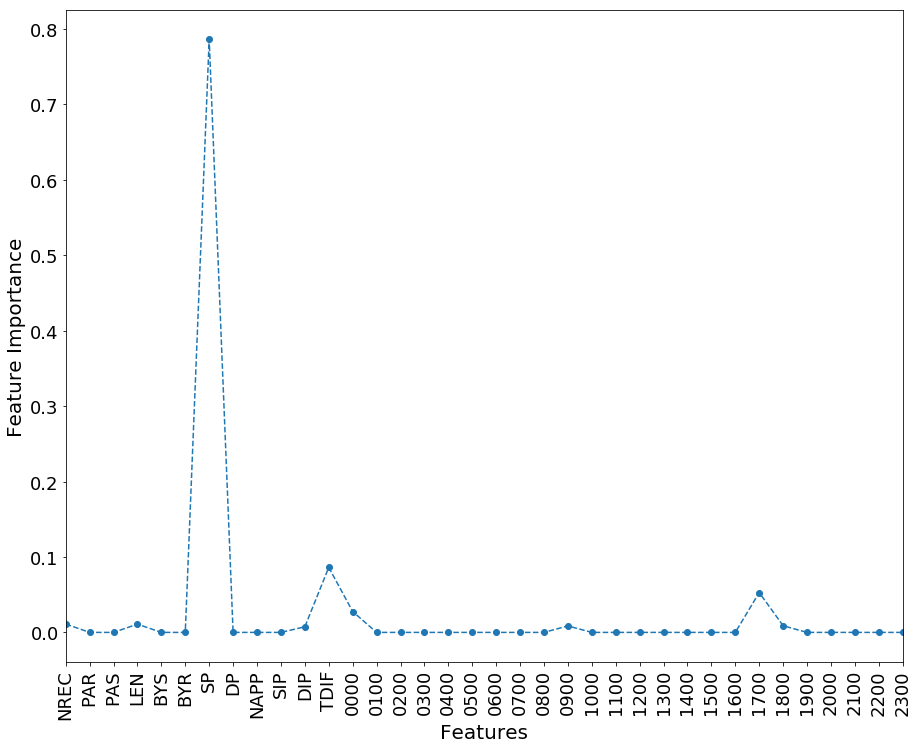

In [29]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [30]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[300,500,100], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.3          0.6           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.989274570983

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3574     2     3576
1            53  1499     1552
__all__    3627  1501     5128

Accuracy of the  Bagging  model for test data is: 0.791731669267

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          786  125      911
1          142  229      371
__all__    928  354     1282

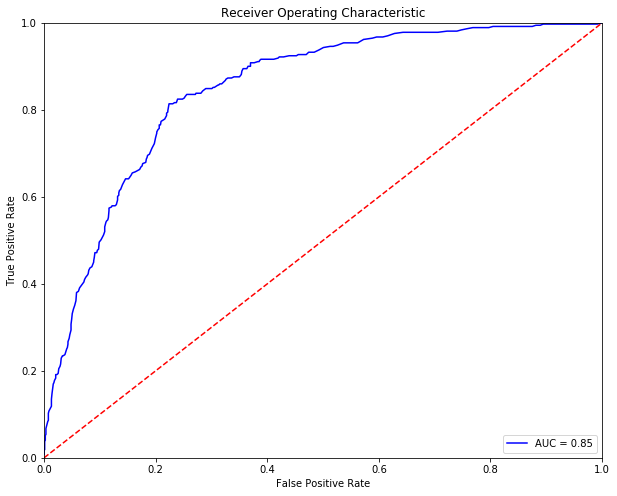

Optimal Threshold is 0.41
Accuracy on test data is: 0.782371294852


Predicted  0.0  1.0  __all__
Actual                      
0.0        714  197      911
1.0         82  289      371
__all__    796  486     1282

In [31]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [32]:
table_80_70_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [33]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.936037441498


Predicted     0     1  __all__
Actual                        
0          3504    72     3576
1           256  1296     1552
__all__    3760  1368     5128

The test accuracy is: 0.791731669267


Predicted    0    1  __all__
Actual                      
0          779  132      911
1          135  236      371
__all__    914  368     1282

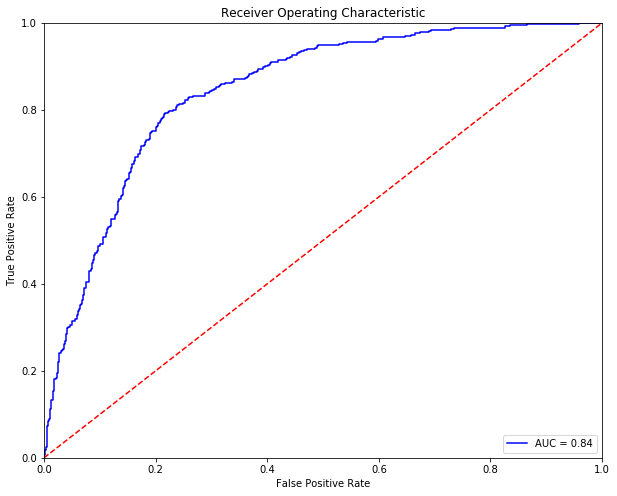

Optimal Threshold is 0.395424319
Accuracy on test data is: 0.786271450858


Predicted  0.0  1.0  __all__
Actual                      
0.0        717  194      911
1.0         80  291      371
__all__    797  485     1282

In [34]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [35]:
table_80_70_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [36]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.947542901716


Predicted     0     1  __all__
Actual                        
0          3528    48     3576
1           221  1331     1552
__all__    3749  1379     5128

The accuracy of the model on test data is: 0.758970358814


Predicted    0    1  __all__
Actual                      
0          777  134      911
1          175  196      371
__all__    952  330     1282

  32/1282 [..............................] - ETA: 0s

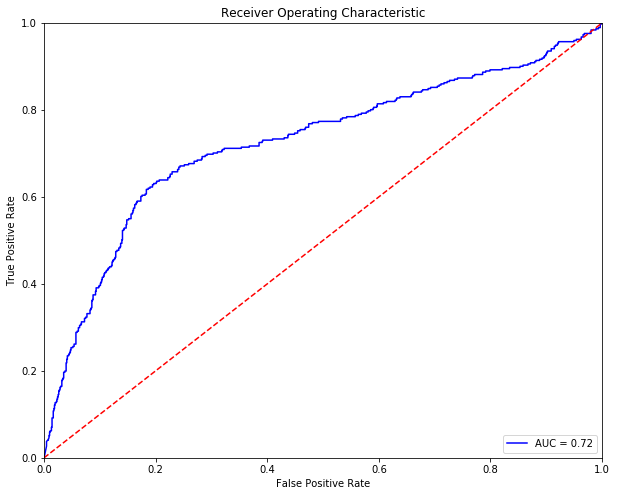

Optimal Threshold is 0.151366
Accuracy of Logistic Model on training data is: 0.698127925117


Predicted  0.0  1.0  __all__
Actual                      
0.0        636  275      911
1.0        112  259      371
__all__    748  534     1282

In [37]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [38]:
table_80_70_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [39]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.8min finished


The accuracy of the model on training data is: 0.798946957878


Predicted     0     1  __all__
Actual                        
0          2943   633     3576
1           398  1154     1552
__all__    3341  1787     5128

The accuracy of the model on test data is: 0.794071762871


Predicted    0    1  __all__
Actual                      
0          744  167      911
1           97  274      371
__all__    841  441     1282

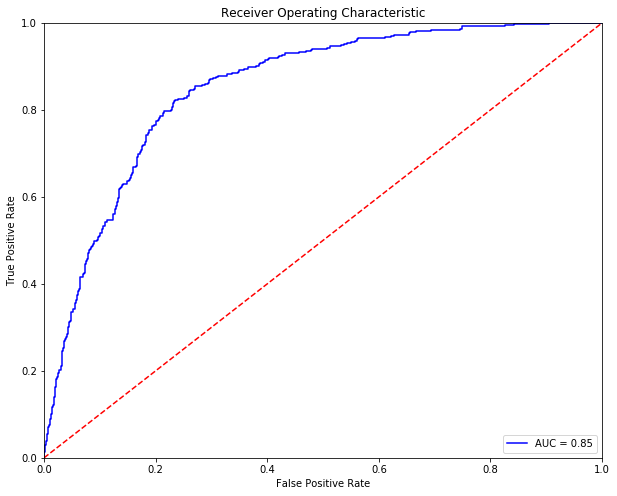

Optimal Threshold is 0.394674
Accuracy on test data is: 0.787831513261


Predicted  0.0  1.0  __all__
Actual                      
0.0        718  193      911
1.0         79  292      371
__all__    797  485     1282

In [40]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [41]:
table_80_70_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [42]:
table_80_70_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_70_test.set_index(['index'],drop=True,inplace=True)
table_80_70_train.set_index(['index'],drop=True,inplace=True)
table_80_70_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_70_train)

print("Comparision Table for Test Accuracies:")
display(table_80_70_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_70_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        0.793877   893.0  3178.0  398.0  659.0  0.111298   
LogisticRegression          0.778666   820.0  3173.0  403.0  732.0  0.112696   
RandomForestClassifier      0.781591  1162.0  2846.0  730.0  390.0  0.204139   
AdaBoostClassifier          0.814158  1034.0  3141.0  435.0  518.0  0.121644   
GradientBoostingClassifier  0.795047  1060.0  3017.0  559.0  492.0  0.156320   
ExtraTreeClassifier         0.796217   936.0  3147.0  429.0  616.0  0.119966   
BaggingClassifier           0.989275  1499.0  3574.0    2.0   53.0  0.000559   
VotingClassifier            0.936037  1296.0  3504.0   72.0  256.0  0.020134   
Neural Network-1            0.947543  1331.0  3528.0   48.0  221.0  0.013423   
Neural-Network-2            0.798947  1154.0  2943.0  633.0  398.0  0.177013   

                                 FNR  
index                                 
KNeighborsClassifier        0.424613  
LogisticRegression          0.471649  
RandomForestClassifier      0.251289  
AdaBoostClassifier          0.333763  
GradientBoostingClassifier  0.317010  
ExtraTreeClassifier         0.396907  
BaggingClassifier           0.034149  
VotingClassifier            0.164948  
Neural Network-1            0.142397  
Neural-Network-2            0.256443

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.790952  205.0  809.0  102.0  166.0  0.111965   
LogisticRegression          0.785491  199.0  808.0  103.0  172.0  0.113063   
RandomForestClassifier      0.784711  285.0  721.0  190.0   86.0  0.208562   
AdaBoostClassifier          0.782371  226.0  777.0  134.0  145.0  0.147091   
GradientBoostingClassifier  0.784711  247.0  759.0  152.0  124.0  0.166850   
ExtraTreeClassifier         0.777691  218.0  779.0  132.0  153.0  0.144896   
BaggingClassifier           0.791732  229.0  786.0  125.0  142.0  0.137212   
VotingClassifier            0.791732  236.0  779.0  132.0  135.0  0.144896   
Neural Network-1            0.758970  196.0  777.0  134.0  175.0  0.147091   
Neural-Network-2            0.794072  274.0  744.0  167.0   97.0  0.183315   

                                 FNR  
index                                 
KNeighborsClassifier        0.447439  
LogisticRegression          0.463612  
RandomForestClassifier      0.231806  
AdaBoostClassifier          0.390836  
GradientBoostingClassifier  0.334232  
ExtraTreeClassifier         0.412399  
BaggingClassifier           0.382749  
VotingClassifier            0.363881  
Neural Network-1            0.471698  
Neural-Network-2            0.261456

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.780031  280.0  720.0  191.0   91.0  0.209660   
LogisticRegression          0.776911  287.0  709.0  202.0   84.0  0.221734   
RandomForestClassifier      0.781591  289.0  713.0  198.0   82.0  0.217344   
AdaBoostClassifier          0.776911  288.0  708.0  203.0   83.0  0.222832   
GradientBoostingClassifier  0.793292  293.0  724.0  187.0   78.0  0.205269   
ExtraTreeClassifier         0.777691  218.0  779.0  132.0  153.0  0.144896   
BaggingClassifier           0.782371  289.0  714.0  197.0   82.0  0.216246   
VotingClassifier            0.786271  291.0  717.0  194.0   80.0  0.212953   
Neural Network-1            0.698128  259.0  636.0  275.0  112.0  0.301866   
Neural-Network-2            0.787832  292.0  718.0  193.0   79.0  0.211855   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.245283   0.360000  0.851002  
LogisticRegression          0.226415   0.302991  0.848394  
RandomForestClassifier      0.221024   0.484335  0.823342  
AdaBoostClassifier          0.223720   0.498402  0.846882  
GradientBoostingClassifier  0.210243   0.415530  0.851199  
ExtraTreeClassifier         0.412399   0.432692  0.831125  
BaggingClassifier           0.221024   0.410000  0.846515  
VotingClassifier            0.215633   0.395424  0.844400  
Neural Network-1            0.301887   0.151366  0.724675  
Neural-Network-2            0.212938   0.394674  0.851012

#### Random State 10

In [43]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_10.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  5164  438.195198   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  1347  462.677060   

                                                           PAS         LEN  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  231.486445  116.998644   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  125.536748   90.790646   

                                                             BYS  \
Source_User                                                        
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  25566.860767   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  13083.769859   

                                                              BYR      SP  \
Source_User                                                                 
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  578623.737026  4106.0   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  633355.270973  1269.0   

                                                      DP  NAPP  SIP   DIP  \
Source_User                                                                 
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  42.0    54   69  1296   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  14.0    38   39   396   

                                                           TDIF  0000  0100  \
Source_User                                                                   
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   952.221340   521   405   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  3335.414996    63    65   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   398   211   281   225   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...   145   123   147    56   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   163   170    68    59   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    61    73    32    19   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...    36    74    99   142   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    19     6    26    52   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   201   218   307   284   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    33   135    75    21   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   219   257   223   225   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    24    23    15    28   

                                                    2200  2300  
Source_User                                                     
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   173   205  
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    56    50

In [44]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
23a784294c34545e19b709e6b22286bd5cfda913b32d55224d18437016ca9135    1
69881d3627335af7ed5613256f13b575318085c62d0a4eb30ef45663cdf794ef    0
4336978528c6a752e441b177d8222c6477449660ce0c772e567e6d7f32c7e896    0
6507f3f2e0c22751060868de62ee74aed8c0c37d331ab7ab39d0f9b17e8ef426    0
6944129302f4af2ade449b755a7cb0eace943209459b735222b74dbd369ed94e    0
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
9695f657a7d9b2c3202a6a25c401a660dd4fff43b396060141f23b9eefe1bed1    1
da1de679d352a2e7977a412053149f36d9e70e9bf3a059d44111774d3d8dd73f    0
4f663930f46b6dbf3e88f4a24101abb6ec2d202593d5042e26aebb10b705acf4    0
ded957eff469c307b079c16459b5caffca56d2ec1b3e36a05326c99daff1888e    0
Name: Target, dtype: int64

In [45]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [46]:
## Table to store training and test measures
table_80_70_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           50  uniform

Accuracy of the  KNN  model for the training data is: 0.786661466459

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3117   467     3584
1           627   917     1544
__all__    3744  1384     5128

Accuracy of the  KNN  model for test data is: 0.764430577223

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          765  138      903
1          164  215      379
__all__    929  353     1282

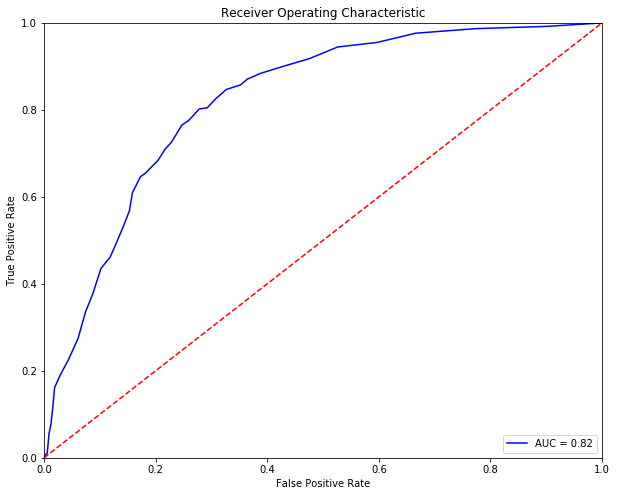

Optimal Threshold is 0.34
Accuracy on test data is: 0.757410296412


Predicted  0.0  1.0  __all__
Actual                      
0.0        689  214      903
1.0         97  282      379
__all__    786  496     1282

In [48]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [49]:
table_80_70_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [50]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.784321372855

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3197   387     3584
1           719   825     1544
__all__    3916  1212     5128

Accuracy of the  Logistic  model for test data is: 0.758190327613

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          782  121      903
1          189  190      379
__all__    971  311     1282

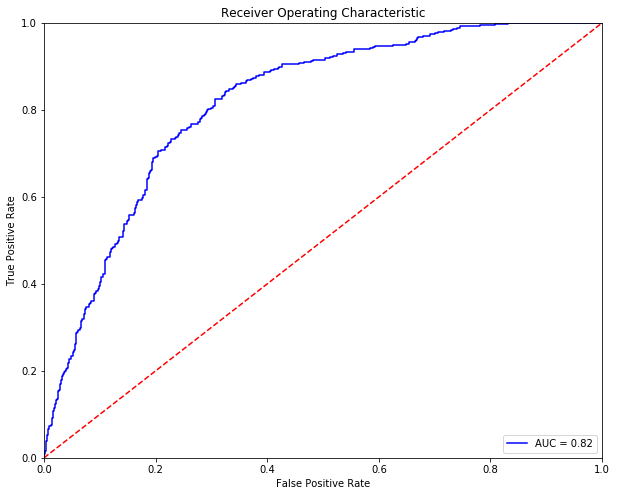

Optimal Threshold is 0.294216128295
Accuracy on test data is: 0.754290171607


Predicted  0.0  1.0  __all__
Actual                      
0.0        682  221      903
1.0         94  285      379
__all__    776  506     1282

In [51]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [52]:
table_80_70_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [53]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.784516380655

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2904   680     3584
1           425  1119     1544
__all__    3329  1799     5128

Accuracy of the  Random Forest Trees  model for test data is: 0.767550702028

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          716  187      903
1          111  268      379
__all__    827  455     1282

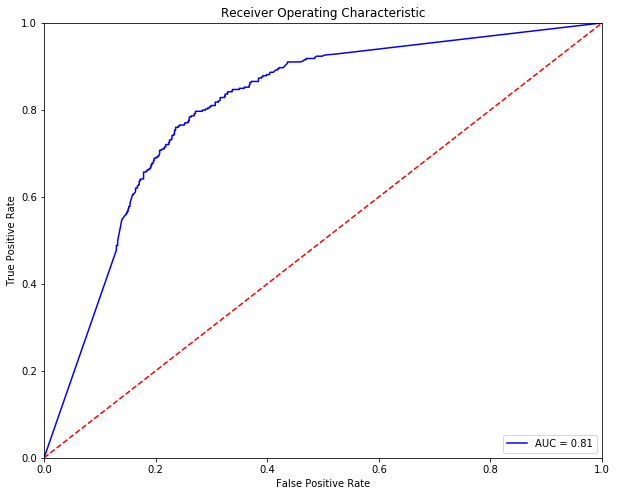

Optimal Threshold is 0.417173695074
Accuracy on test data is: 0.760530421217


Predicted  0.0  1.0  __all__
Actual                      
0.0        687  216      903
1.0         91  288      379
__all__    778  504     1282

In [54]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [55]:
table_80_70_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

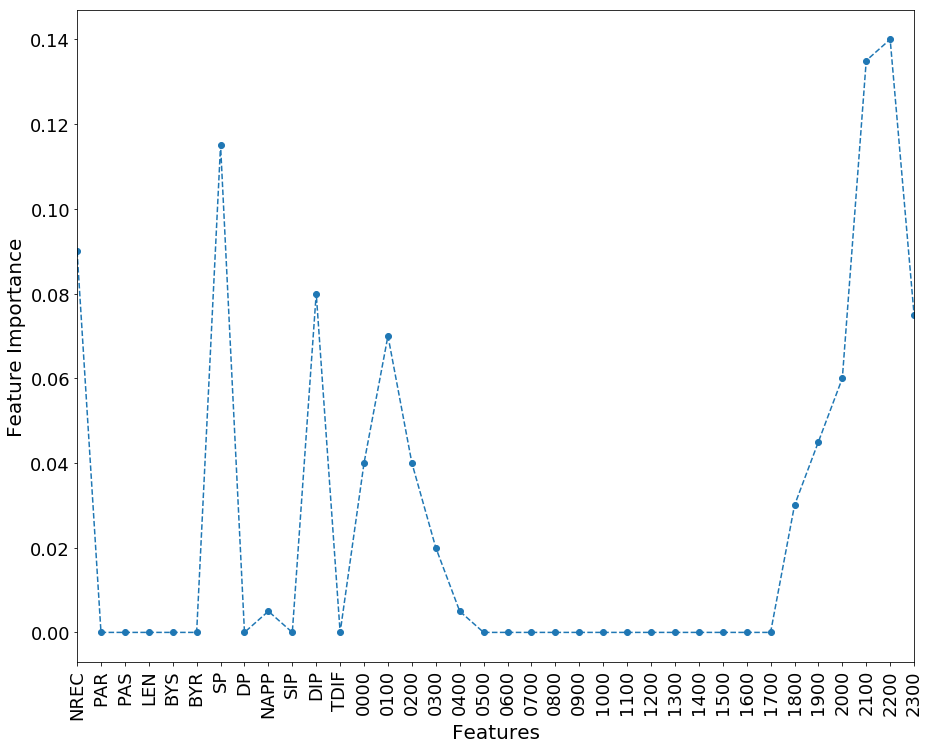

In [56]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [57]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.796801872075

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3092   492     3584
1           550   994     1544
__all__    3642  1486     5128

Accuracy of the  AdaBoostClassifier  model for test data is: 0.772230889236

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          755  148      903
1          144  235      379
__all__    899  383     1282

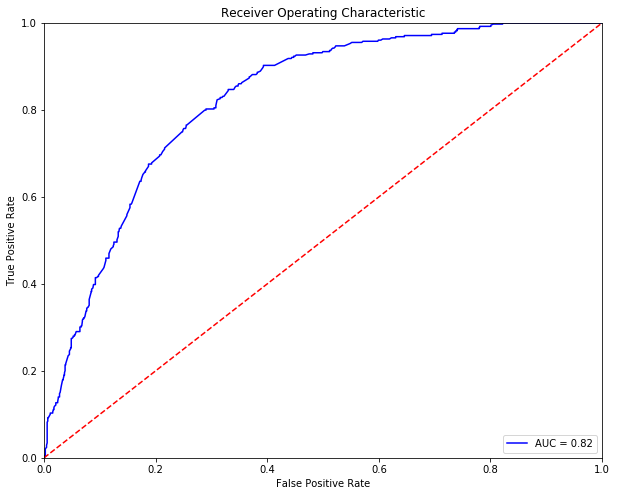

Optimal Threshold is 0.493800937179
Accuracy on test data is: 0.751950078003


Predicted  0.0  1.0  __all__
Actual                      
0.0        680  223      903
1.0         95  284      379
__all__    775  507     1282

In [58]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [59]:
table_80_70_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

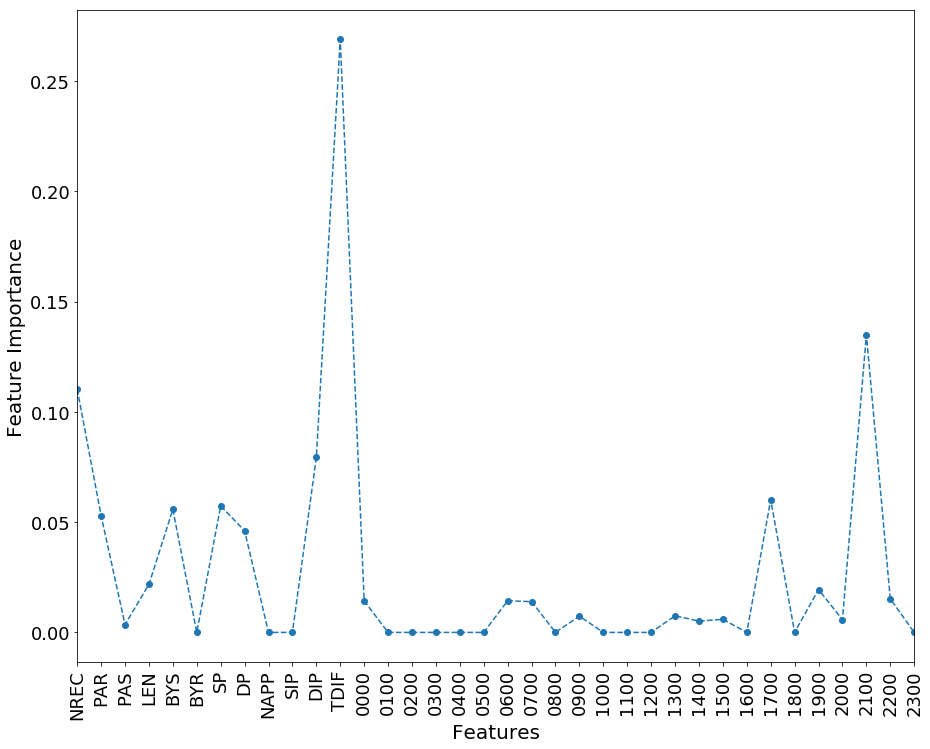

In [60]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [61]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2            50             0          1

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.80596723869

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3143   441     3584
1           554   990     1544
__all__    3697  1431     5128

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.770670826833

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          761  142      903
1          152  227      379
__all__    913  369     1282

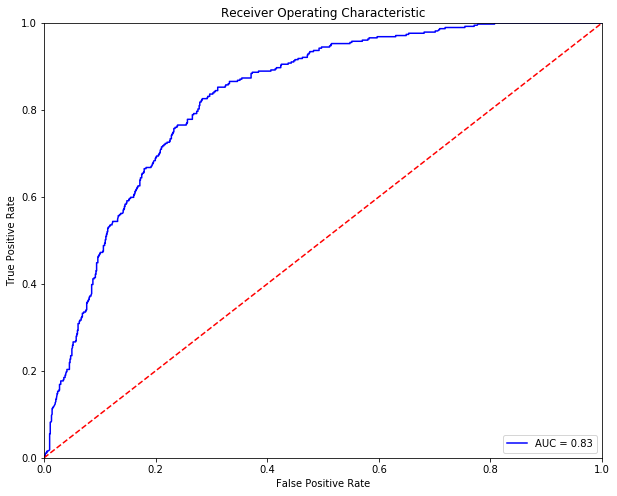

Optimal Threshold is 0.365689681734
Accuracy on test data is: 0.761310452418


Predicted  0.0  1.0  __all__
Actual                      
0.0        688  215      903
1.0         91  288      379
__all__    779  503     1282

In [62]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [63]:
table_80_70_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

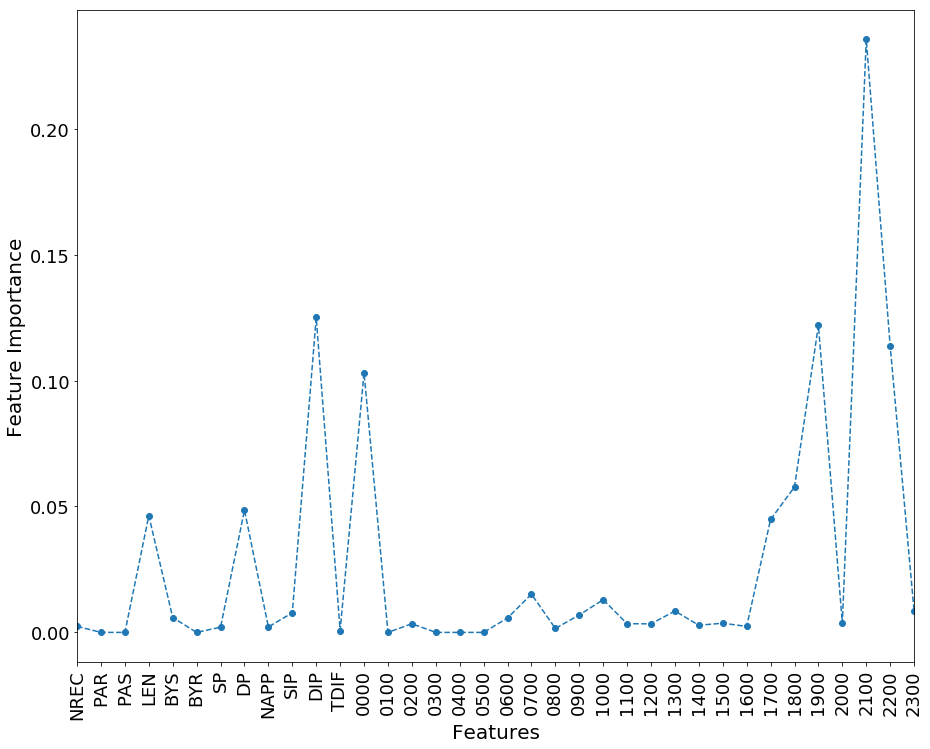

In [64]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [65]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.802457098284

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3161   423     3584
1           590   954     1544
__all__    3751  1377     5128

Accuracy of the  Extra Decision Tree  model for test data is: 0.768330733229

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          768  135      903
1          162  217      379
__all__    930  352     1282

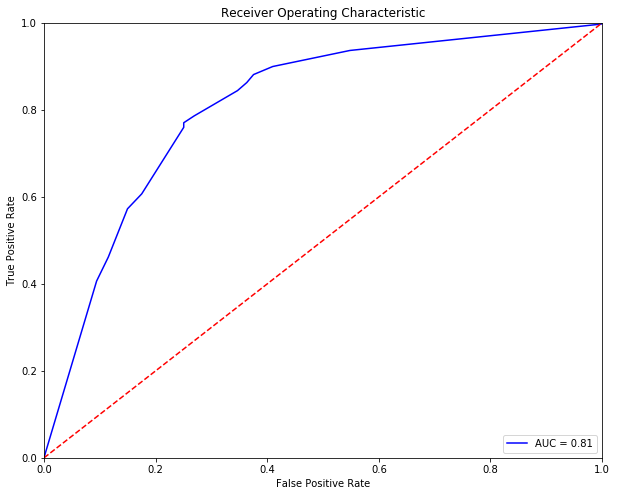

Optimal Threshold is 0.410931174089
Accuracy on test data is: 0.760530421217


Predicted  0.0  1.0  __all__
Actual                      
0.0        745  158      903
1.0        149  230      379
__all__    894  388     1282

In [66]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [67]:
table_80_70_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [68]:
%%capture
table_80_70_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

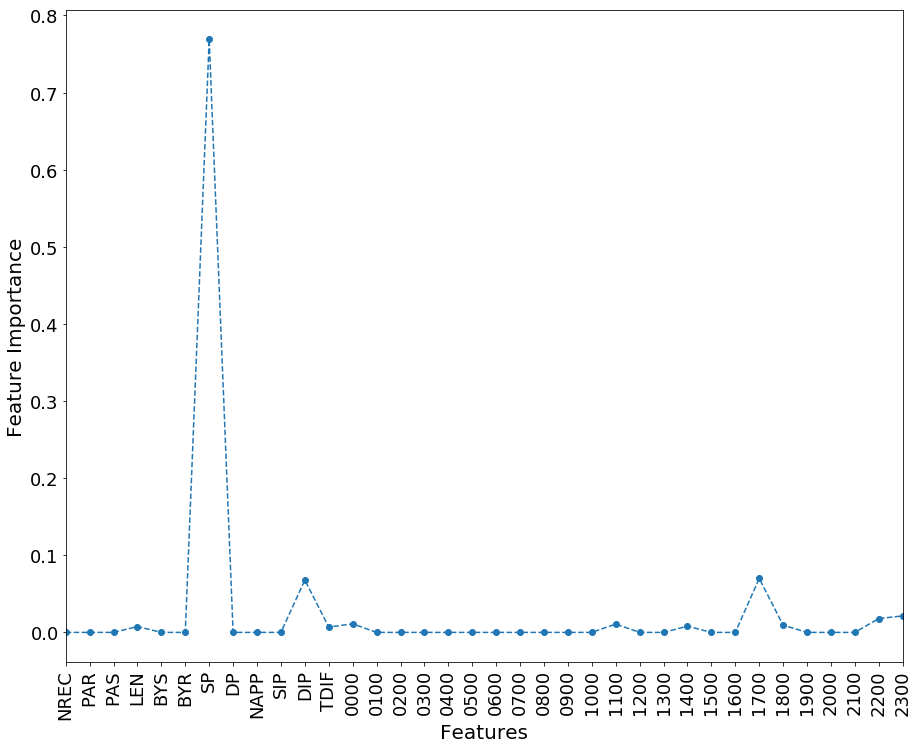

In [69]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [70]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[100,200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.2          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.952418096724

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3547    37     3584
1           207  1337     1544
__all__    3754  1374     5128

Accuracy of the  Bagging  model for test data is: 0.774570982839

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          753  150      903
1          139  240      379
__all__    892  390     1282

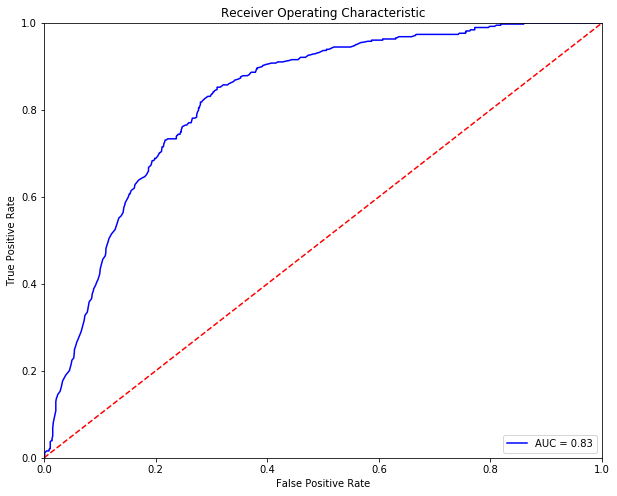

Optimal Threshold is 0.383333333333
Accuracy on test data is: 0.752730109204


Predicted  0.0  1.0  __all__
Actual                      
0.0        681  222      903
1.0         95  284      379
__all__    776  506     1282

In [71]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [72]:
table_80_70_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [73]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.939352574103


Predicted     0     1  __all__
Actual                        
0          3533    51     3584
1           260  1284     1544
__all__    3793  1335     5128

The test accuracy is: 0.754290171607


Predicted    0    1  __all__
Actual                      
0          755  148      903
1          167  212      379
__all__    922  360     1282

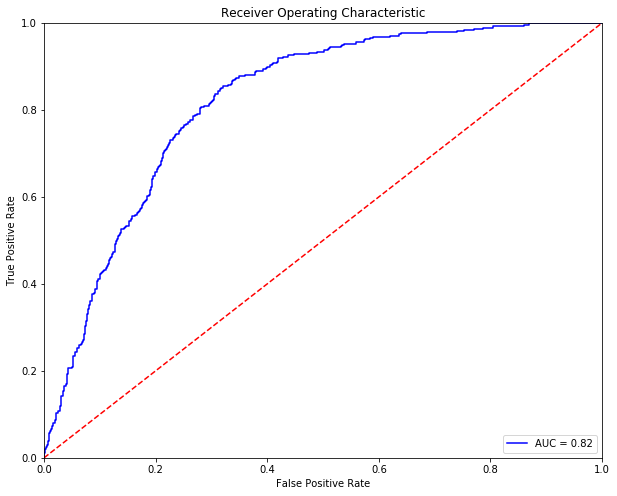

Optimal Threshold is 0.384785696134
Accuracy on test data is: 0.755070202808


Predicted  0.0  1.0  __all__
Actual                      
0.0        682  221      903
1.0         93  286      379
__all__    775  507     1282

In [74]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [75]:
table_80_70_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [76]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.952613104524


Predicted     0     1  __all__
Actual                        
0          3526    58     3584
1           185  1359     1544
__all__    3711  1417     5128

The accuracy of the model on test data is: 0.738689547582


Predicted    0    1  __all__
Actual                      
0          744  159      903
1          176  203      379
__all__    920  362     1282

1216/1282 [===========================>..] - ETA: 0s

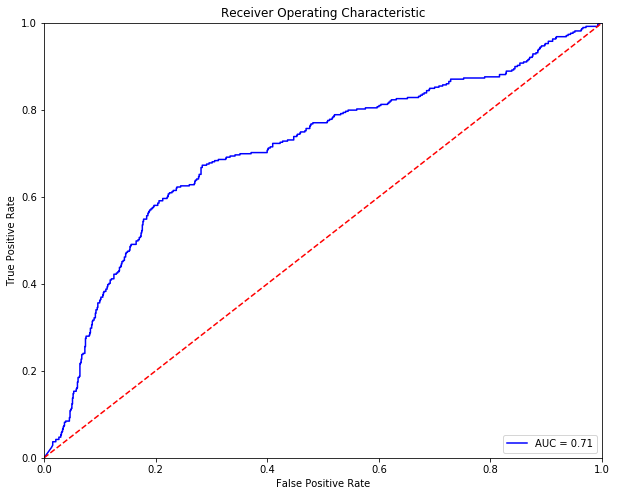

Optimal Threshold is 0.133492
Accuracy of Logistic Model on training data is: 0.686427457098


Predicted  0.0  1.0  __all__
Actual                      
0.0        621  282      903
1.0        120  259      379
__all__    741  541     1282

In [77]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [78]:
table_80_70_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [79]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.3min finished


The accuracy of the model on training data is: 0.823322932917


Predicted     0     1  __all__
Actual                        
0          3124   460     3584
1           446  1098     1544
__all__    3570  1558     5128

The accuracy of the model on test data is: 0.765210608424


Predicted    0    1  __all__
Actual                      
0          740  163      903
1          138  241      379
__all__    878  404     1282

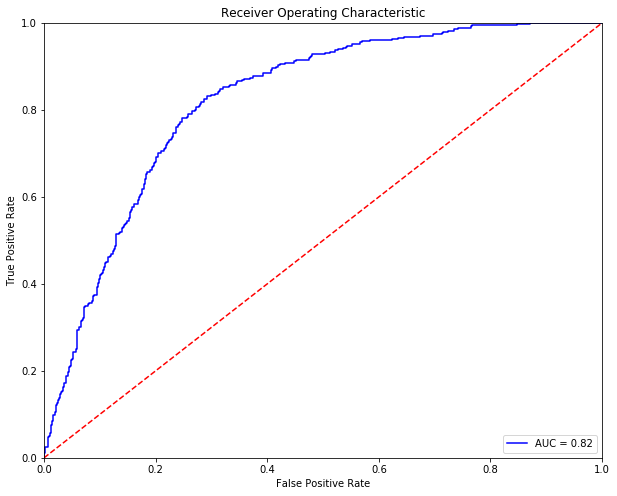

Optimal Threshold is 0.31672
Accuracy on test data is: 0.760530421217


Predicted  0.0  1.0  __all__
Actual                      
0.0        687  216      903
1.0         91  288      379
__all__    778  504     1282

In [80]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [81]:
table_80_70_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [82]:
table_80_70_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_70_10_test.set_index(['index'],drop=True,inplace=True)
table_80_70_10_train.set_index(['index'],drop=True,inplace=True)
table_80_70_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_70_10_train)

print("Comparision Table for Test Accuracies:")
display(table_80_70_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_70_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        0.786661   917.0  3117.0  467.0  627.0  0.130301   
LogisticRegression          0.784321   825.0  3197.0  387.0  719.0  0.107980   
RandomForestClassifier      0.784516  1119.0  2904.0  680.0  425.0  0.189732   
AdaBoostClassifier          0.796802   994.0  3092.0  492.0  550.0  0.137277   
GradientBoostingClassifier  0.805967   990.0  3143.0  441.0  554.0  0.123047   
ExtraTreeClassifier         0.802457   954.0  3161.0  423.0  590.0  0.118025   
BaggingClassifier           0.952418  1337.0  3547.0   37.0  207.0  0.010324   
VotingClassifier            0.939353  1284.0  3533.0   51.0  260.0  0.014230   
Neural Network-1            0.952613  1359.0  3526.0   58.0  185.0  0.016183   
Neural-Network-2            0.823323  1098.0  3124.0  460.0  446.0  0.128348   

                                 FNR  
index                                 
KNeighborsClassifier        0.406088  
LogisticRegression          0.465674  
RandomForestClassifier      0.275259  
AdaBoostClassifier          0.356218  
GradientBoostingClassifier  0.358808  
ExtraTreeClassifier         0.382124  
BaggingClassifier           0.134067  
VotingClassifier            0.168394  
Neural Network-1            0.119819  
Neural-Network-2            0.288860

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.764431  215.0  765.0  138.0  164.0  0.152824   
LogisticRegression          0.758190  190.0  782.0  121.0  189.0  0.133998   
RandomForestClassifier      0.767551  268.0  716.0  187.0  111.0  0.207087   
AdaBoostClassifier          0.772231  235.0  755.0  148.0  144.0  0.163898   
GradientBoostingClassifier  0.770671  227.0  761.0  142.0  152.0  0.157254   
ExtraTreeClassifier         0.768331  217.0  768.0  135.0  162.0  0.149502   
BaggingClassifier           0.774571  240.0  753.0  150.0  139.0  0.166113   
VotingClassifier            0.754290  212.0  755.0  148.0  167.0  0.163898   
Neural Network-1            0.738690  203.0  744.0  159.0  176.0  0.176080   
Neural-Network-2            0.765211  241.0  740.0  163.0  138.0  0.180509   

                                 FNR  
index                                 
KNeighborsClassifier        0.432718  
LogisticRegression          0.498681  
RandomForestClassifier      0.292876  
AdaBoostClassifier          0.379947  
GradientBoostingClassifier  0.401055  
ExtraTreeClassifier         0.427441  
BaggingClassifier           0.366755  
VotingClassifier            0.440633  
Neural Network-1            0.464380  
Neural-Network-2            0.364116

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.757410  282.0  689.0  214.0   97.0  0.236988   
LogisticRegression          0.754290  285.0  682.0  221.0   94.0  0.244740   
RandomForestClassifier      0.760530  288.0  687.0  216.0   91.0  0.239203   
AdaBoostClassifier          0.751950  284.0  680.0  223.0   95.0  0.246955   
GradientBoostingClassifier  0.761310  288.0  688.0  215.0   91.0  0.238095   
ExtraTreeClassifier         0.760530  230.0  745.0  158.0  149.0  0.174972   
BaggingClassifier           0.752730  284.0  681.0  222.0   95.0  0.245847   
VotingClassifier            0.755070  286.0  682.0  221.0   93.0  0.244740   
Neural Network-1            0.686427  259.0  621.0  282.0  120.0  0.312292   
Neural-Network-2            0.760530  288.0  687.0  216.0   91.0  0.239203   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.255937   0.340000  0.821521  
LogisticRegression          0.248021   0.294216  0.816414  
RandomForestClassifier      0.240106   0.417174  0.806666  
AdaBoostClassifier          0.250660   0.493801  0.823906  
GradientBoostingClassifier  0.240106   0.365690  0.830093  
ExtraTreeClassifier         0.393140   0.410931  0.809832  
BaggingClassifier           0.250660   0.383333  0.825482  
VotingClassifier            0.245383   0.384786  0.819359  
Neural Network-1            0.316623   0.133492  0.706084  
Neural-Network-2            0.240106   0.316720  0.821510

#### Random State 20

In [83]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_20.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  1580  297.743038   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  2071   92.849831   

                                                           PAS        LEN  \
Source_User                                                                 
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  121.938608  75.572152   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   68.084500  85.015451   

                                                             BYS  \
Source_User                                                        
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  10785.806962   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   9264.509416   

                                                              BYR      SP  \
Source_User                                                                 
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  373515.271519  1513.0   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  113797.491067  1908.0   

                                                      DP  NAPP  SIP  DIP  \
Source_User                                                                
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  12.0    30   34  415   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  18.0    44   58  538   

                                                           TDIF  0000  0100  \
Source_User                                                                   
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  2816.703797    18    34   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  2378.489136   200   135   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    54    15    18    46   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    60    81    56   117   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    81    30    43    44   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    50    80   174    78   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    47    92    79    47   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   145    77    57    41   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    56    60    40   119   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    41    49    29    66   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    88   127   191   167   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    37    72    45   122   

                                                    2200  2300  
Source_User                                                     
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    45    39  
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    68   191

In [84]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
73592328e1aba504b315fc06ce72a444a3afa3ca071ce135c6519b653b782900    0
5393c0df6a44651953827b1afab0c1c821dbdc352b1b88263f9d325b00bf1b7d    0
20e2144674cba74b4658c48eb02e290912cdf7d9815e9f0a8913e8f253d40b3c    0
0a8a122a1d0a74f656a8c288853357fe1e8ee2681f2308f75b9217f8dd73489d    0
e39c9093096a6ba89ad4d2e3987b430f8f6f8a86a6e73fc80bf4b5e0408e0edd    0
c82e979deebbc9c33760931128b2552d94d73128806ee7f3ebe1bdd3f7ca5c21    0
de1af22a9df53353a6f2c79696966a215a429a47150cd06de7b4f39b2f8e9976    0
a4a89c63ce9691738b6b014ae723928e73b2bc57ddb4bce98beb47cdce1ab45e    0
d8ccad69e30b55cf1048301d2fb7cd696a0ecab46a80e73f992ac427cd241e77    0
b7826c03e71919e65e0236c1bb7fb63e1de351fbc74c65b9ddb5cfe7c19881b0    0
Name: Target, dtype: int64

In [85]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [86]:
## Table to store training and test measures
table_80_70_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3591     0     3591
1             0  1537     1537
__all__    3591  1537     5128

Accuracy of the  KNN  model for test data is: 0.790951638066

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          773  123      896
1          145  241      386
__all__    918  364     1282

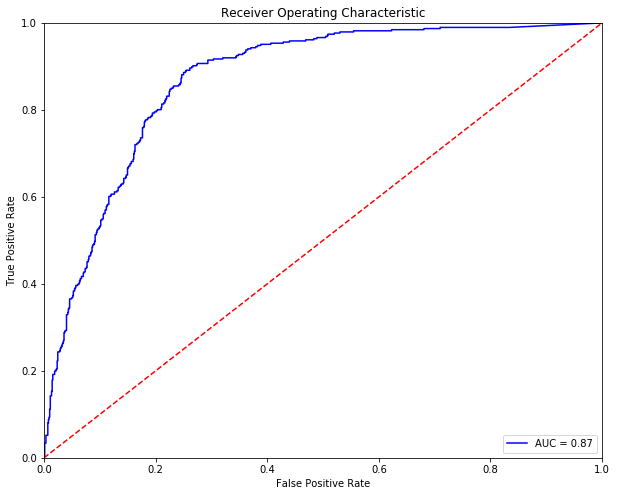

Optimal Threshold is 0.336023006138
Accuracy on test data is: 0.797971918877


Predicted  0.0  1.0  __all__
Actual                      
0.0        715  181      896
1.0         78  308      386
__all__    793  489     1282

In [88]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [89]:
table_80_70_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [90]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.7        50          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.784321372855

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3036   555     3591
1           551   986     1537
__all__    3587  1541     5128

Accuracy of the  Logistic  model for test data is: 0.791731669267

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          760  136      896
1          131  255      386
__all__    891  391     1282

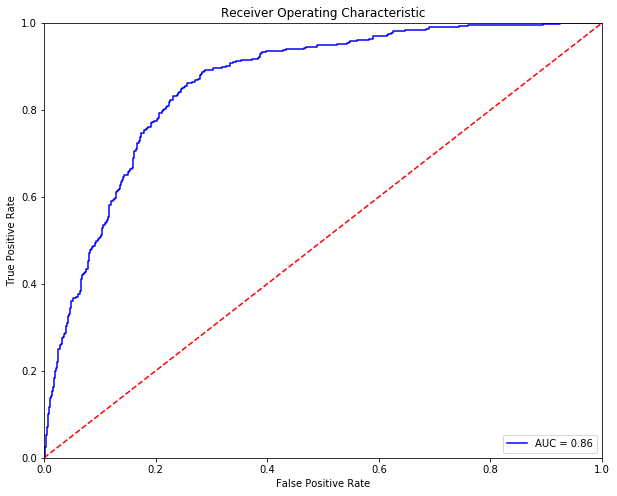

Optimal Threshold is 0.366600513458
Accuracy on test data is: 0.792511700468


Predicted  0.0  1.0  __all__
Actual                      
0.0        711  185      896
1.0         81  305      386
__all__    792  490     1282

In [91]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [92]:
table_80_70_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [93]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.784126365055

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2991   600     3591
1           507  1030     1537
__all__    3498  1630     5128

Accuracy of the  Random Forest Trees  model for test data is: 0.794851794072

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          750  146      896
1          117  269      386
__all__    867  415     1282

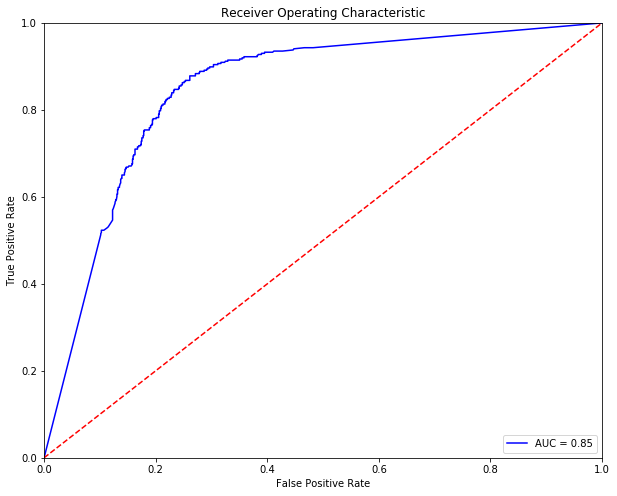

Optimal Threshold is 0.388747727174
Accuracy on test data is: 0.793291731669


Predicted  0.0  1.0  __all__
Actual                      
0.0        712  184      896
1.0         81  305      386
__all__    793  489     1282

In [94]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [95]:
table_80_70_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

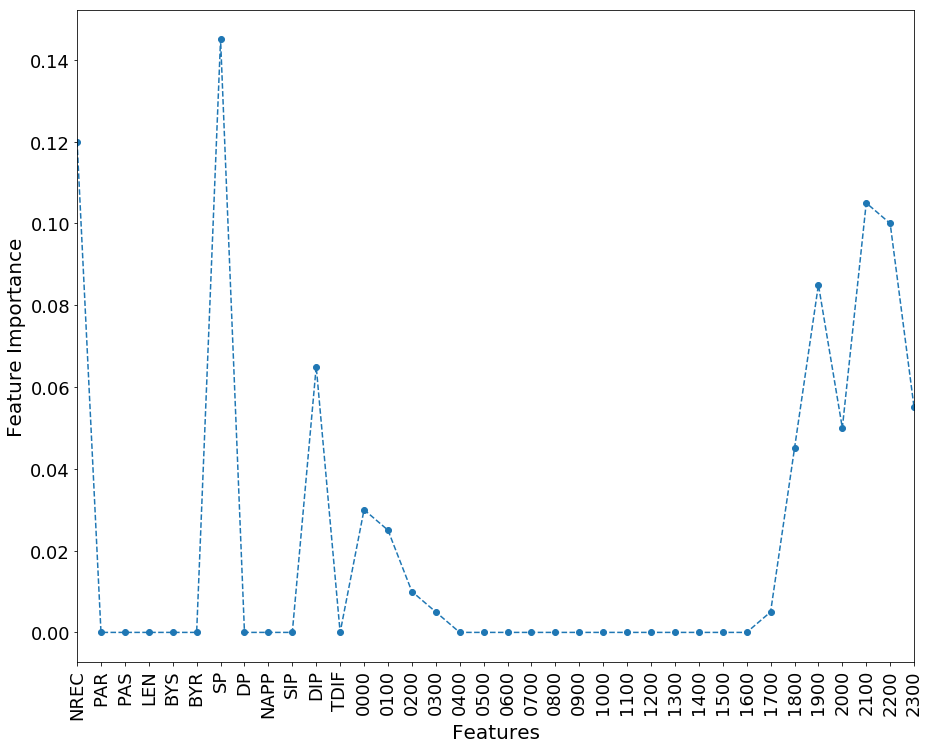

In [96]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [97]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.790171606864

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3106   485     3591
1           591   946     1537
__all__    3697  1431     5128

Accuracy of the  AdaBoostClassifier  model for test data is: 0.787831513261

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          764  132      896
1          140  246      386
__all__    904  378     1282

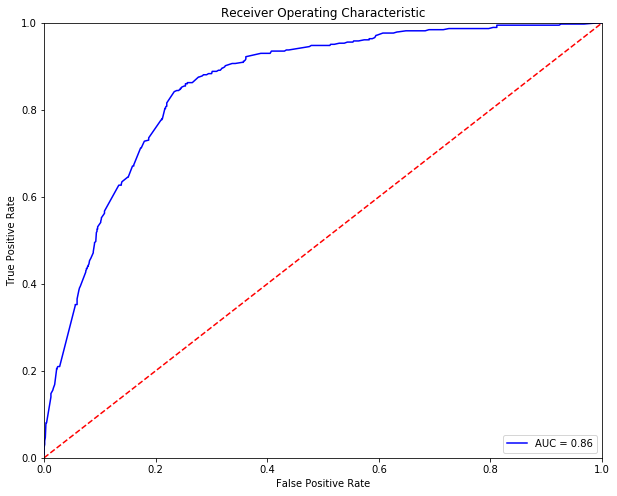

Optimal Threshold is 0.478636146462
Accuracy on test data is: 0.786271450858


Predicted  0.0  1.0  __all__
Actual                      
0.0        707  189      896
1.0         85  301      386
__all__    792  490     1282

In [98]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [99]:
table_80_70_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

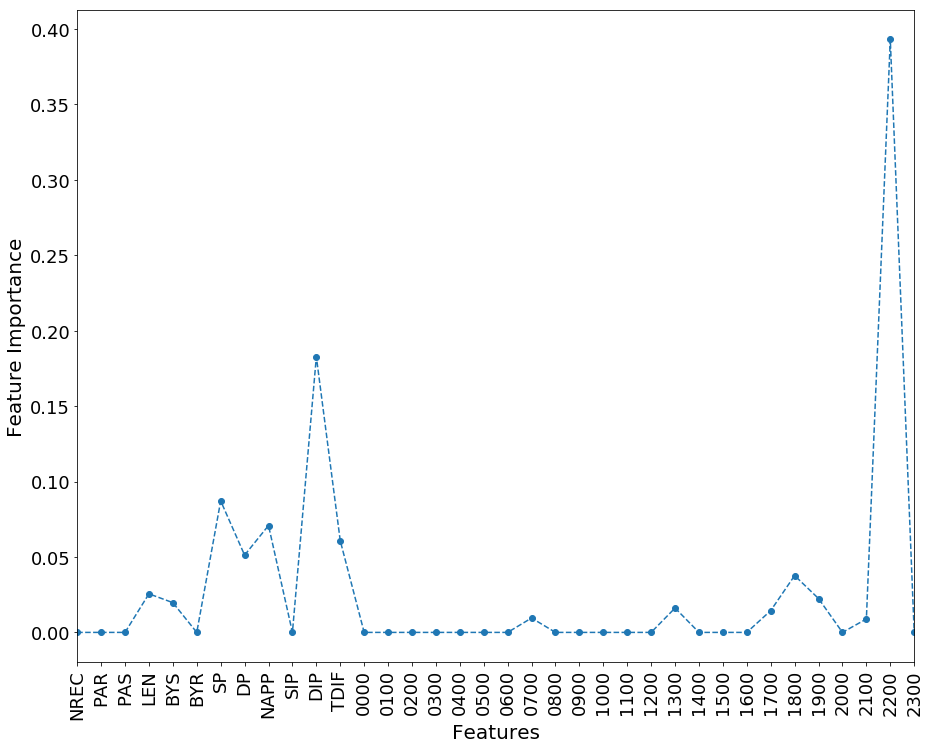

In [100]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [101]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse            0.1  exponential                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.801872074883

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3103   488     3591
1           528  1009     1537
__all__    3631  1497     5128

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.789391575663

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          766  130      896
1          140  246      386
__all__    906  376     1282

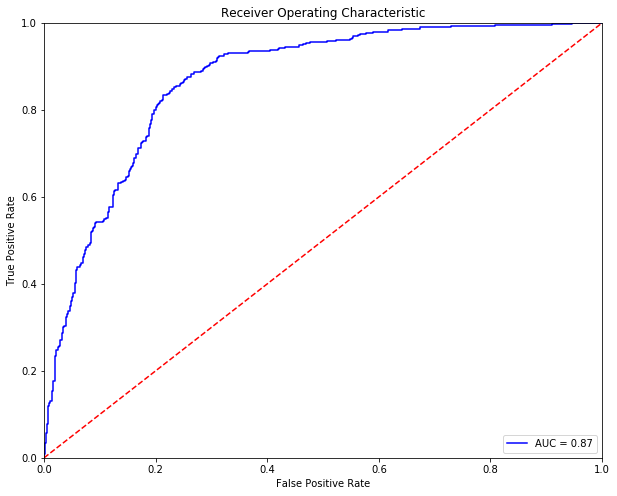

Optimal Threshold is 0.384062397209
Accuracy on test data is: 0.801092043682


Predicted  0.0  1.0  __all__
Actual                      
0.0        718  178      896
1.0         77  309      386
__all__    795  487     1282

In [102]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [103]:
table_80_70_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

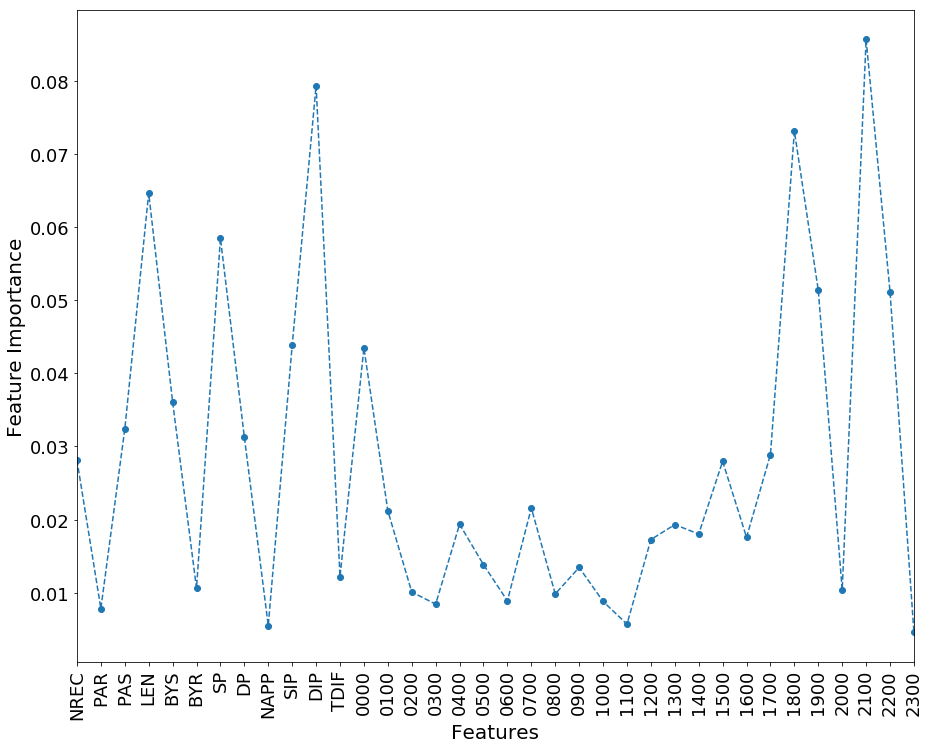

In [104]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [105]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.78763650546

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2968   623     3591
1           466  1071     1537
__all__    3434  1694     5128

Accuracy of the  Extra Decision Tree  model for test data is: 0.785491419657

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          742  154      896
1          121  265      386
__all__    863  419     1282

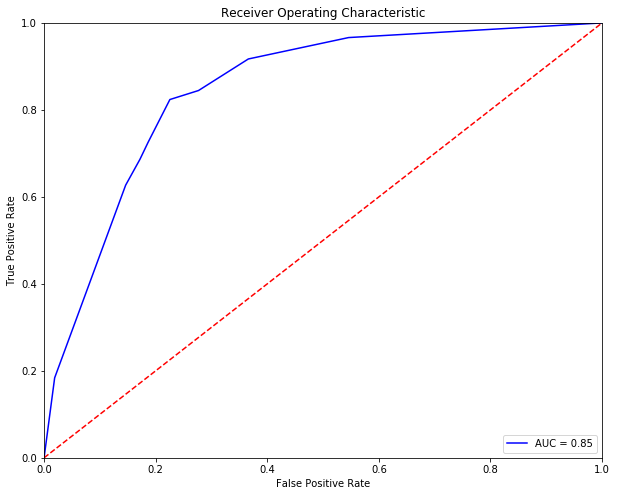

Optimal Threshold is 0.359832635983
Accuracy on test data is: 0.787051482059


Predicted  0.0  1.0  __all__
Actual                      
0.0        729  167      896
1.0        106  280      386
__all__    835  447     1282

In [106]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [107]:
table_80_70_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [108]:
%%capture
table_80_70_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

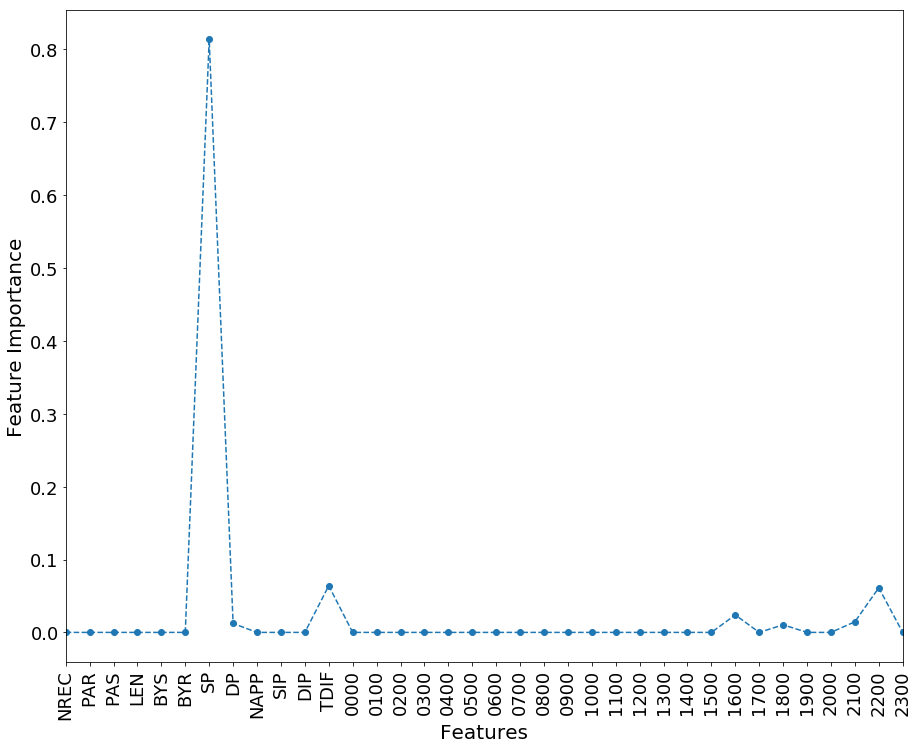

In [109]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [110]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[100,200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.6           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.990054602184

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3591     0     3591
1            51  1486     1537
__all__    3642  1486     5128

Accuracy of the  Bagging  model for test data is: 0.791731669267

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          764  132      896
1          135  251      386
__all__    899  383     1282

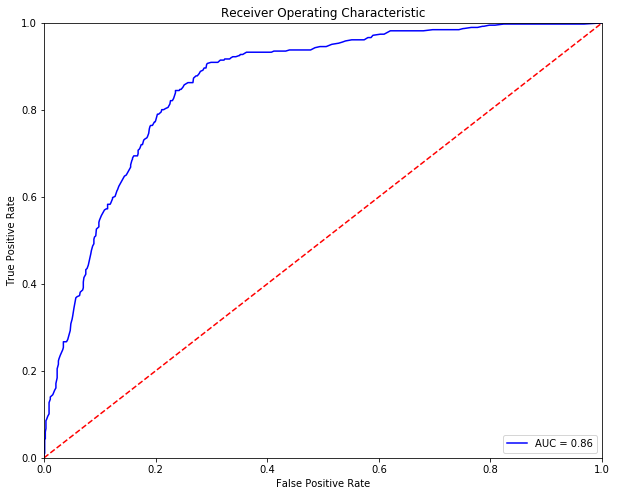

Optimal Threshold is 0.39
Accuracy on test data is: 0.794851794072


Predicted  0.0  1.0  __all__
Actual                      
0.0        714  182      896
1.0         81  305      386
__all__    795  487     1282

In [111]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [112]:
table_80_70_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [113]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.939352574103


Predicted     0     1  __all__
Actual                        
0          3552    39     3591
1           272  1265     1537
__all__    3824  1304     5128

The test accuracy is: 0.790171606864


Predicted    0    1  __all__
Actual                      
0          783  113      896
1          156  230      386
__all__    939  343     1282

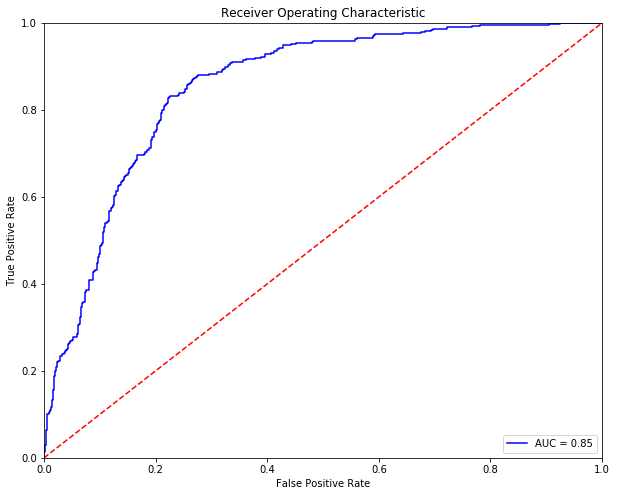

Optimal Threshold is 0.381639376235
Accuracy on test data is: 0.790171606864


Predicted  0.0  1.0  __all__
Actual                      
0.0        708  188      896
1.0         81  305      386
__all__    789  493     1282

In [114]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [115]:
table_80_70_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [116]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.925507020281


Predicted     0     1  __all__
Actual                        
0          3498    93     3591
1           289  1248     1537
__all__    3787  1341     5128

The accuracy of the model on test data is: 0.769110764431


Predicted    0    1  __all__
Actual                      
0          781  115      896
1          181  205      386
__all__    962  320     1282

  32/1282 [..............................] - ETA: 0s

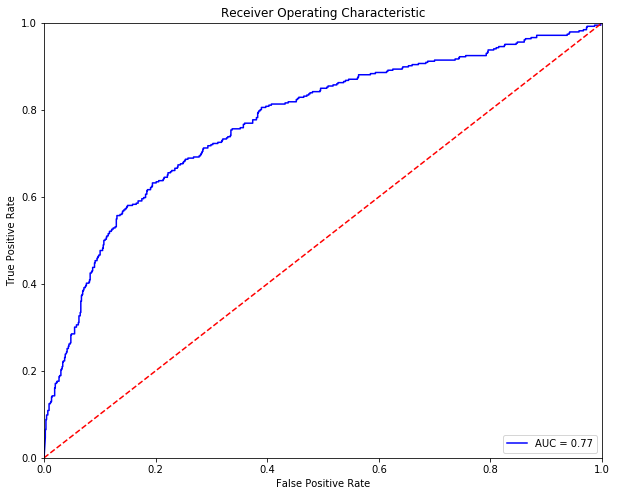

Optimal Threshold is 0.161495
Accuracy of Logistic Model on training data is: 0.712948517941


Predicted  0.0  1.0  __all__
Actual                      
0.0        640  256      896
1.0        112  274      386
__all__    752  530     1282

In [117]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [118]:
table_80_70_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [119]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.8min finished


The accuracy of the model on training data is: 0.801872074883


Predicted     0     1  __all__
Actual                        
0          3064   527     3591
1           489  1048     1537
__all__    3553  1575     5128

The accuracy of the model on test data is: 0.791731669267


Predicted    0    1  __all__
Actual                      
0          760  136      896
1          131  255      386
__all__    891  391     1282

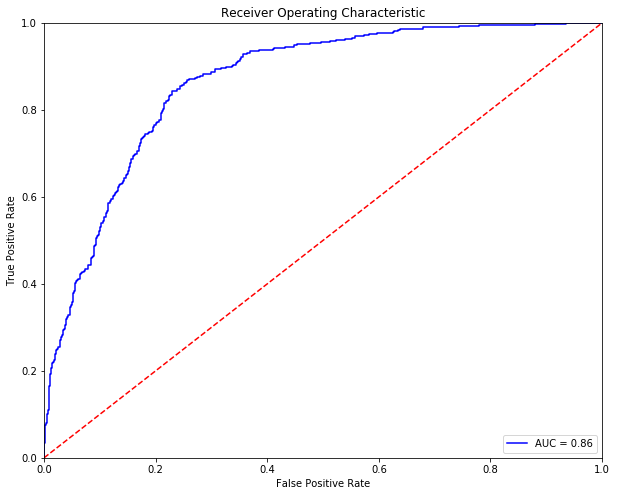

Optimal Threshold is 0.314487
Accuracy on test data is: 0.790171606864


Predicted  0.0  1.0  __all__
Actual                      
0.0        708  188      896
1.0         81  305      386
__all__    789  493     1282

In [120]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [121]:
table_80_70_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [122]:
table_80_70_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_70_20_test.set_index(['index'],drop=True,inplace=True)
table_80_70_20_train.set_index(['index'],drop=True,inplace=True)
table_80_70_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_70_20_train)

print("Comparision Table for Test Accuracies:")
display(table_80_70_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_70_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1537.0  3591.0    0.0    0.0  0.000000   
LogisticRegression          0.784321   986.0  3036.0  555.0  551.0  0.154553   
RandomForestClassifier      0.784126  1030.0  2991.0  600.0  507.0  0.167084   
AdaBoostClassifier          0.790172   946.0  3106.0  485.0  591.0  0.135060   
GradientBoostingClassifier  0.801872  1009.0  3103.0  488.0  528.0  0.135895   
ExtraTreeClassifier         0.787637  1071.0  2968.0  623.0  466.0  0.173489   
BaggingClassifier           0.990055  1486.0  3591.0    0.0   51.0  0.000000   
VotingClassifier            0.939353  1265.0  3552.0   39.0  272.0  0.010860   
Neural Network-1            0.925507  1248.0  3498.0   93.0  289.0  0.025898   
Neural-Network-2            0.801872  1048.0  3064.0  527.0  489.0  0.146756   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.358491  
RandomForestClassifier      0.329863  
AdaBoostClassifier          0.384515  
GradientBoostingClassifier  0.343526  
ExtraTreeClassifier         0.303188  
BaggingClassifier           0.033182  
VotingClassifier            0.176968  
Neural Network-1            0.188029  
Neural-Network-2            0.318152

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.790952  241.0  773.0  123.0  145.0  0.137277   
LogisticRegression          0.791732  255.0  760.0  136.0  131.0  0.151786   
RandomForestClassifier      0.794852  269.0  750.0  146.0  117.0  0.162946   
AdaBoostClassifier          0.787832  246.0  764.0  132.0  140.0  0.147321   
GradientBoostingClassifier  0.789392  246.0  766.0  130.0  140.0  0.145089   
ExtraTreeClassifier         0.785491  265.0  742.0  154.0  121.0  0.171875   
BaggingClassifier           0.791732  251.0  764.0  132.0  135.0  0.147321   
VotingClassifier            0.790172  230.0  783.0  113.0  156.0  0.126116   
Neural Network-1            0.769111  205.0  781.0  115.0  181.0  0.128348   
Neural-Network-2            0.791732  255.0  760.0  136.0  131.0  0.151786   

                                 FNR  
index                                 
KNeighborsClassifier        0.375648  
LogisticRegression          0.339378  
RandomForestClassifier      0.303109  
AdaBoostClassifier          0.362694  
GradientBoostingClassifier  0.362694  
ExtraTreeClassifier         0.313472  
BaggingClassifier           0.349741  
VotingClassifier            0.404145  
Neural Network-1            0.468912  
Neural-Network-2            0.339378

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.797972  308.0  715.0  181.0   78.0  0.202009   
LogisticRegression          0.792512  305.0  711.0  185.0   81.0  0.206473   
RandomForestClassifier      0.793292  305.0  712.0  184.0   81.0  0.205357   
AdaBoostClassifier          0.786271  301.0  707.0  189.0   85.0  0.210938   
GradientBoostingClassifier  0.801092  309.0  718.0  178.0   77.0  0.198661   
ExtraTreeClassifier         0.787051  280.0  729.0  167.0  106.0  0.186384   
BaggingClassifier           0.794852  305.0  714.0  182.0   81.0  0.203125   
VotingClassifier            0.790172  305.0  708.0  188.0   81.0  0.209821   
Neural Network-1            0.712949  274.0  640.0  256.0  112.0  0.285714   
Neural-Network-2            0.790172  305.0  708.0  188.0   81.0  0.209821   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.202073   0.336023  0.869853  
LogisticRegression          0.209845   0.366601  0.860173  
RandomForestClassifier      0.209845   0.388748  0.848091  
AdaBoostClassifier          0.220207   0.478636  0.857905  
GradientBoostingClassifier  0.199482   0.384062  0.868231  
ExtraTreeClassifier         0.274611   0.359833  0.847967  
BaggingClassifier           0.209845   0.390000  0.860815  
VotingClassifier            0.209845   0.381639  0.853905  
Neural Network-1            0.290155   0.161495  0.773135  
Neural-Network-2            0.209845   0.314487  0.864441

In [123]:
table_80_70_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_70_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_70_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [124]:
table_80_70_train_avg['accuracy']=(table_80_70_train['accuracy']+table_80_70_10_train['accuracy']+table_80_70_20_train['accuracy'])/3.0
table_80_70_train_avg['FPR']=(table_80_70_train['FPR']+table_80_70_10_train['FPR']+table_80_70_20_train['FPR'])/3.0
table_80_70_train_avg['FNR']=(table_80_70_train['FNR']+table_80_70_10_train['FNR']+table_80_70_20_train['FNR'])/3.0

In [125]:
table_80_70_test_avg['accuracy']=(table_80_70_test['accuracy']+table_80_70_10_test['accuracy']+table_80_70_20_test['accuracy'])/3.0
table_80_70_test_avg['FPR']=(table_80_70_test['FPR']+table_80_70_10_test['FPR']+table_80_70_20_test['FPR'])/3.0
table_80_70_test_avg['FNR']=(table_80_70_test['FNR']+table_80_70_10_test['FNR']+table_80_70_20_test['FNR'])/3.0

In [126]:
table_80_70_test_roc_avg['accuracy']=(table_80_70_test_roc['accuracy']+table_80_70_10_test_roc['accuracy']+table_80_70_20_test_roc['accuracy'])/3.0
table_80_70_test_roc_avg['FPR']=(table_80_70_test_roc['FPR']+table_80_70_10_test_roc['FPR']+table_80_70_20_test_roc['FPR'])/3.0
table_80_70_test_roc_avg['FNR']=(table_80_70_test_roc['FNR']+table_80_70_10_test_roc['FNR']+table_80_70_20_test_roc['FNR'])/3.0
table_80_70_test_roc_avg['auc']=(table_80_70_test_roc['auc']+table_80_70_10_test_roc['auc']+table_80_70_20_test_roc['auc'])/3.0

In [127]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_80_70_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_80_70_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_70_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.860179  0.080533  0.276900
LogisticRegression          0.782436  0.125076  0.431938
RandomForestClassifier      0.783411  0.186985  0.285470
AdaBoostClassifier          0.800377  0.131327  0.358165
GradientBoostingClassifier  0.800962  0.138421  0.339782
ExtraTreeClassifier         0.795437  0.137160  0.360740
BaggingClassifier           0.977249  0.003628  0.067133
VotingClassifier            0.938248  0.015075  0.170103
Neural Network-1            0.941888  0.018501  0.150081
Neural-Network-2            0.808047  0.150706  0.287819

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.782111  0.134022  0.418602
LogisticRegression          0.778471  0.132949  0.433890
RandomForestClassifier      0.782371  0.192865  0.275930
AdaBoostClassifier          0.780811  0.152770  0.377826
GradientBoostingClassifier  0.781591  0.156398  0.365994
ExtraTreeClassifier         0.777171  0.155424  0.384437
BaggingClassifier           0.786011  0.150215  0.366415
VotingClassifier            0.778731  0.144970  0.402887
Neural Network-1            0.755590  0.150506  0.468330
Neural-Network-2            0.783671  0.171870  0.321650

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.778471  0.216219  0.234431  0.847459
LogisticRegression          0.774571  0.224316  0.228094  0.841660
RandomForestClassifier      0.778471  0.220634  0.223658  0.826033
AdaBoostClassifier          0.771711  0.226908  0.231529  0.842897
GradientBoostingClassifier  0.785231  0.214008  0.216610  0.849841
ExtraTreeClassifier         0.775091  0.168751  0.360050  0.829641
BaggingClassifier           0.776651  0.221739  0.227176  0.844271
VotingClassifier            0.777171  0.222505  0.223620  0.839221
Neural Network-1            0.699168  0.299958  0.302888  0.734631
Neural-Network-2            0.779511  0.220293  0.220963  0.845654

### <a id='1.B'  style="text-decoration : none; color : #000000;"> B. 70:30 Train Test Split</a>

#### Random State 0

In [128]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_0.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC        PAR  \
Source_User                                                           
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...   441  46.138322   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...   254  24.370079   

                                                          PAS        LEN  \
Source_User                                                                
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  29.460317  66.585034   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  21.968504  33.976378   

                                                            BYS           BYR  \
Source_User                                                                     
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  4755.390023  54162.571429   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  3180.610236  25776.055118   

                                                       SP   DP  NAPP  SIP  \
Source_User                                                                 
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  438.0  6.0    21   25   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  252.0  4.0    12    2   

                                                    DIP          TDIF  0000  \
Source_User                                                                   
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  132  10734.321995    14   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  108   1006.488189     0   

                                                    0100  0200  0300  0400  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    15     2     0     1   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     0     0   

                                                    0500  0600  0700  0800  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...     1     6    19    15   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     6   231   

                                                    0900  1000  1100  1200  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...     9    12    18    18   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     1     3     1     2   

                                                    1300  1400  1500  1600  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    21    33    49    86   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     2     1     3     1   

                                                    1700  1800  1900  2000  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    72    13     4    14   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     3     0     0     0   

                                                    2100  2200  2300  
Source_User                                                           
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    11     2     6  
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     0

In [129]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce66a9a4968c19e7923    0
0f12269fba4fbd7f6a9229708650d1511638053b127dc8df6d8ed628067c1c17    0
b343b9f652a841f55180dec62614b6f3f4ef123aa6c7bd4e11ba330f1f20ab1e    0
d4522f4975663af6ea4d8c261c8ff4ccca09ed099f1b4bf18c22a92219746d40    0
fd3ce5c94c3c37ad6e64bcd3fea156bce5f73d66ff8d5e38c668fd65d2fbad35    1
9bd426dc9dd76d55870bfa1d277228863be08643c1c251bfa01fbeea6befa548    0
64c7c7ab1002f853fec50dcb65b8d4ce104aa67df24a116fe47ab67d9816fda6    1
b232f1a6b8db7b92cce166503c5faafe30609a93860360536391ef9f827958ab    1
89085fa53e0136faacd2e660766c2af3e4f45890a9fe3954c72b9abd9706be63    0
13e3cf1c083c78d4313f1f000c24f9d1051d78d19a69725479c0c59cf105df0c    0
Name: Target, dtype: int64

In [130]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [131]:
## Table to store training and test measures
table_70_70_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3133     0     3133
1             0  1354     1354
__all__    3133  1354     4487

Accuracy of the  KNN  model for test data is: 0.788871554862

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1207  147     1354
1           259  310      569
__all__    1466  457     1923

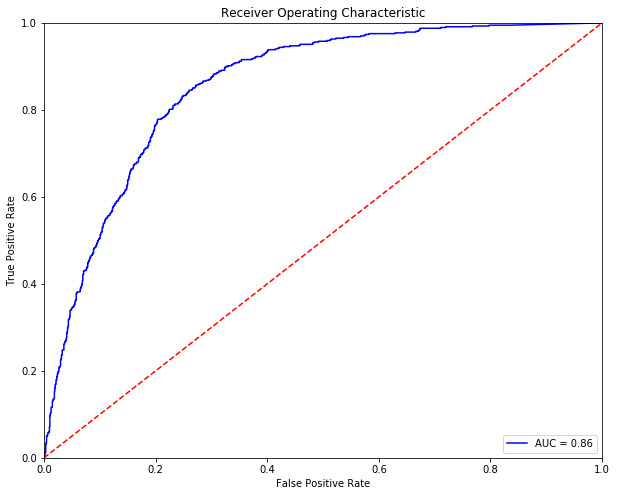

Optimal Threshold is 0.345436325582
Accuracy on test data is: 0.784191367655


Predicted   0.0  1.0  __all__
Actual                       
0.0        1062  292     1354
1.0         123  446      569
__all__    1185  738     1923

In [133]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [134]:
table_70_70_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [135]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.781368397593

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2777   356     3133
1           625   729     1354
__all__    3402  1085     4487

Accuracy of the  Logistic  model for test data is: 0.783151326053

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1205  149     1354
1           268  301      569
__all__    1473  450     1923

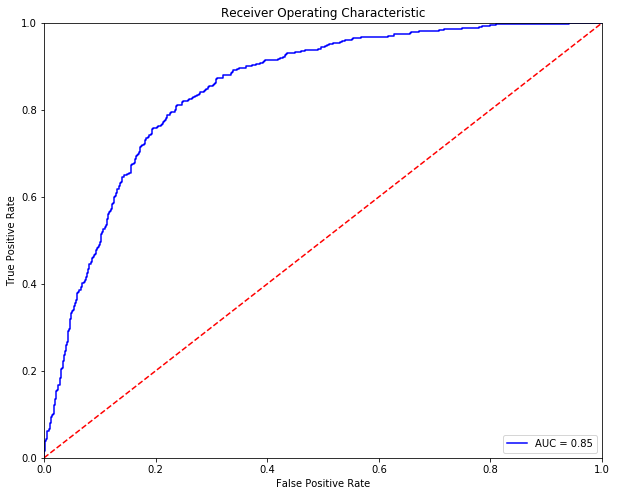

Optimal Threshold is 0.308765945988
Accuracy on test data is: 0.78107124285


Predicted   0.0  1.0  __all__
Actual                       
0.0        1058  296     1354
1.0         125  444      569
__all__    1183  740     1923

In [136]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [137]:
table_70_70_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [138]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.780922665478

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2532   601     3133
1           382   972     1354
__all__    2914  1573     4487

Accuracy of the  Random Forest Trees  model for test data is: 0.791991679667

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1101  253     1354
1           147  422      569
__all__    1248  675     1923

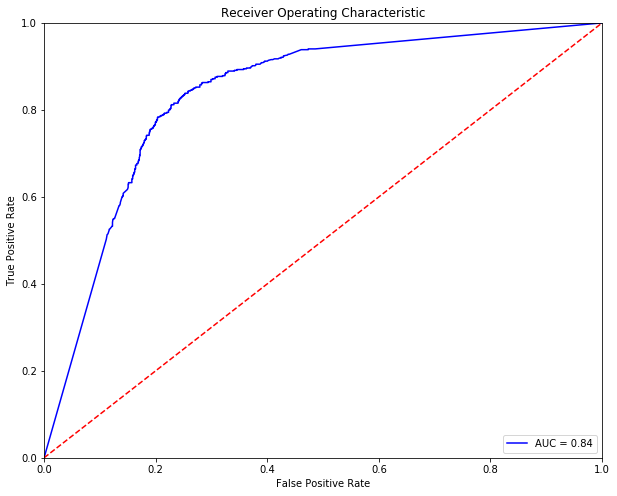

Optimal Threshold is 0.41036415099
Accuracy on test data is: 0.787831513261


Predicted   0.0  1.0  __all__
Actual                       
0.0        1067  287     1354
1.0         121  448      569
__all__    1188  735     1923

In [139]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [140]:
table_70_70_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

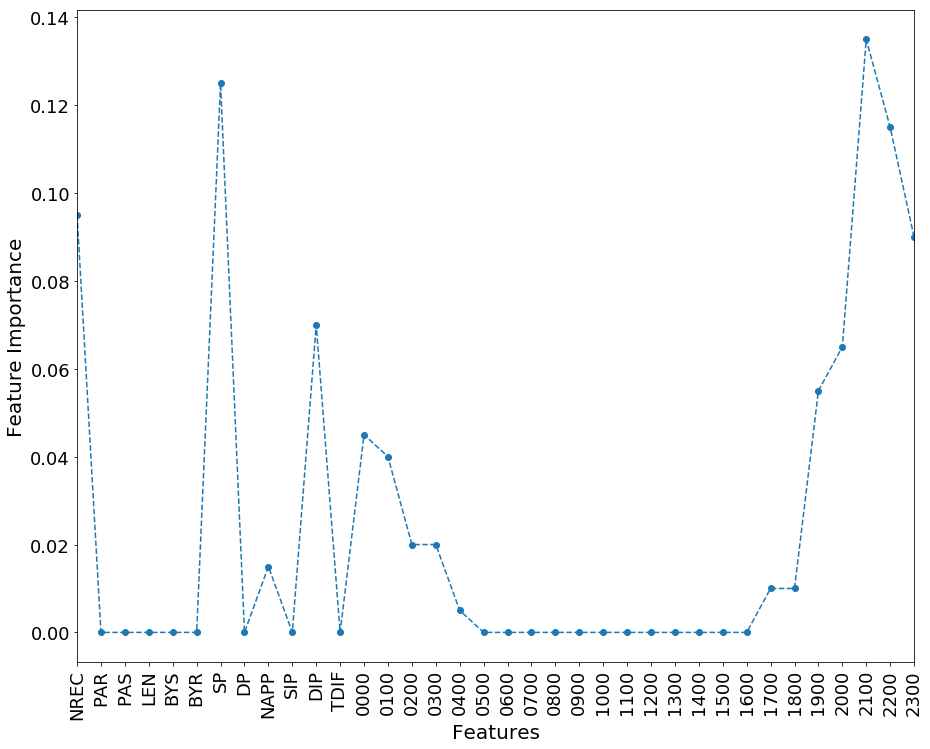

In [141]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [142]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.783151326053

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2554   579     3133
1           394   960     1354
__all__    2948  1539     4487

Accuracy of the  AdaBoostClassifier  model for test data is: 0.782111284451

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1106  248     1354
1           171  398      569
__all__    1277  646     1923

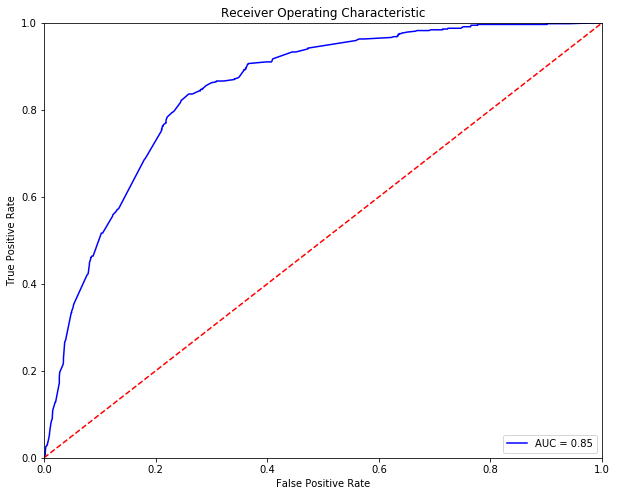

Optimal Threshold is 0.485781821722
Accuracy on test data is: 0.779511180447


Predicted   0.0  1.0  __all__
Actual                       
0.0        1058  296     1354
1.0         128  441      569
__all__    1186  737     1923

In [143]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [144]:
table_70_70_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

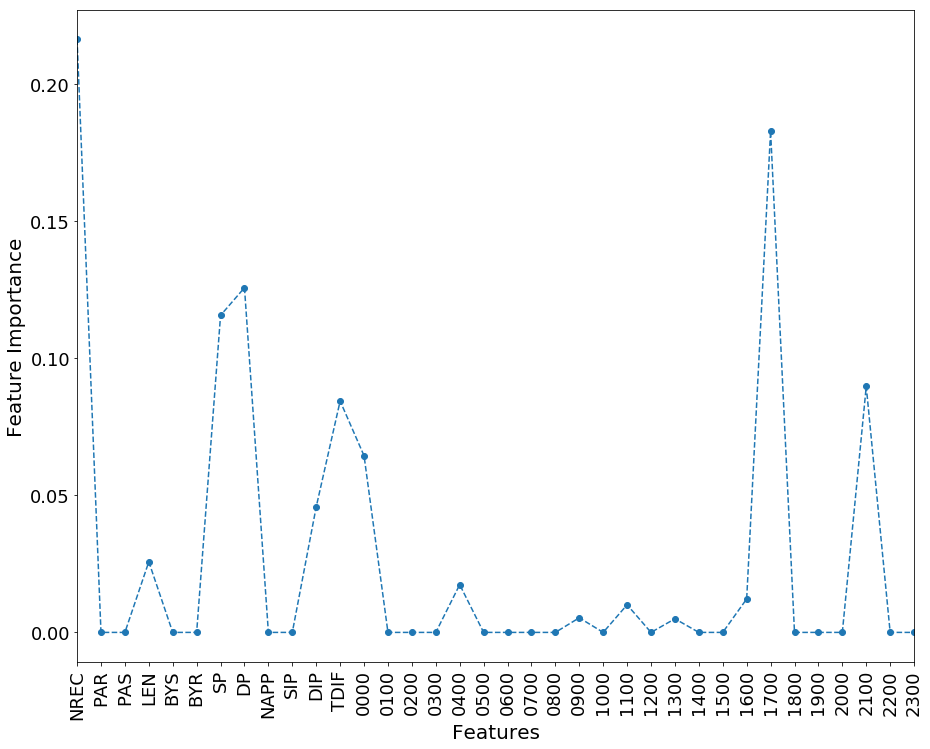

In [145]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [146]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse            0.1  deviance                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1            50             0          1

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.81546690439

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2770   363     3133
1           465   889     1354
__all__    3235  1252     4487

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.794591783671

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1181  173     1354
1           222  347      569
__all__    1403  520     1923

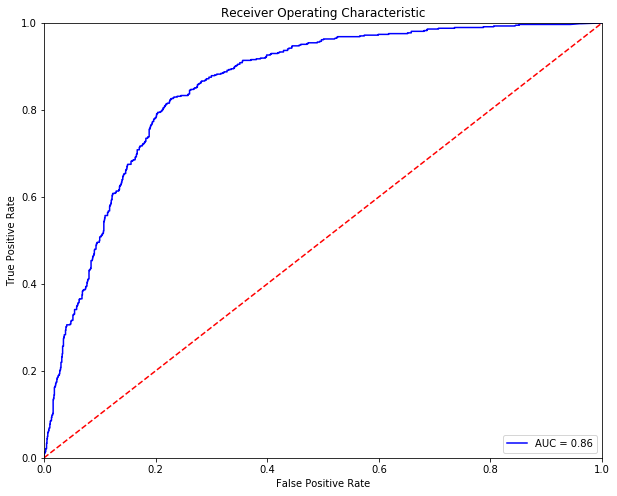

Optimal Threshold is 0.384100245051
Accuracy on test data is: 0.795111804472


Predicted   0.0  1.0  __all__
Actual                       
0.0        1078  276     1354
1.0         118  451      569
__all__    1196  727     1923

In [147]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [148]:
table_70_70_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

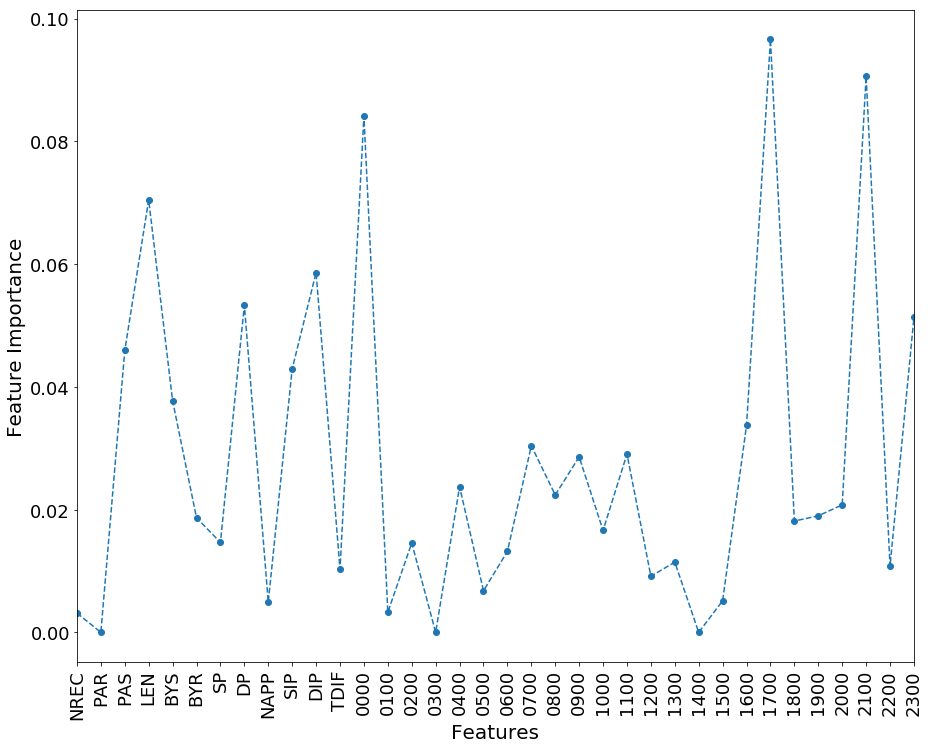

In [149]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [150]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.793403164698

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2741   392     3133
1           535   819     1354
__all__    3276  1211     4487

Accuracy of the  Extra Decision Tree  model for test data is: 0.780551222049

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1175  179     1354
1           243  326      569
__all__    1418  505     1923

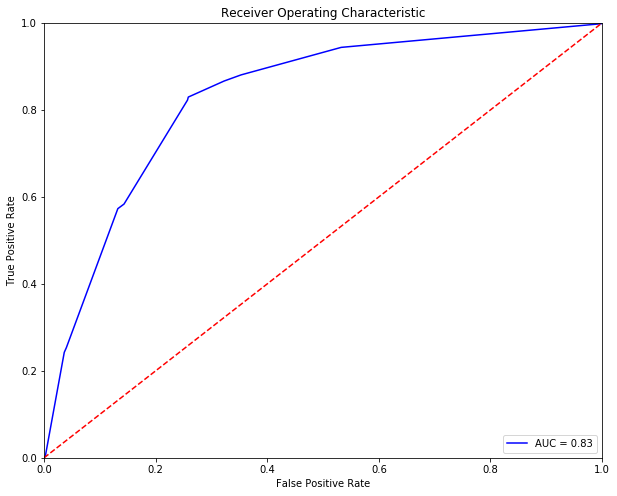

Optimal Threshold is 0.401898734177
Accuracy on test data is: 0.775871034841


Predicted   0.0  1.0  __all__
Actual                       
0.0        1160  194     1354
1.0         237  332      569
__all__    1397  526     1923

In [151]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [152]:
table_70_70_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [153]:
%%capture
table_70_70_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

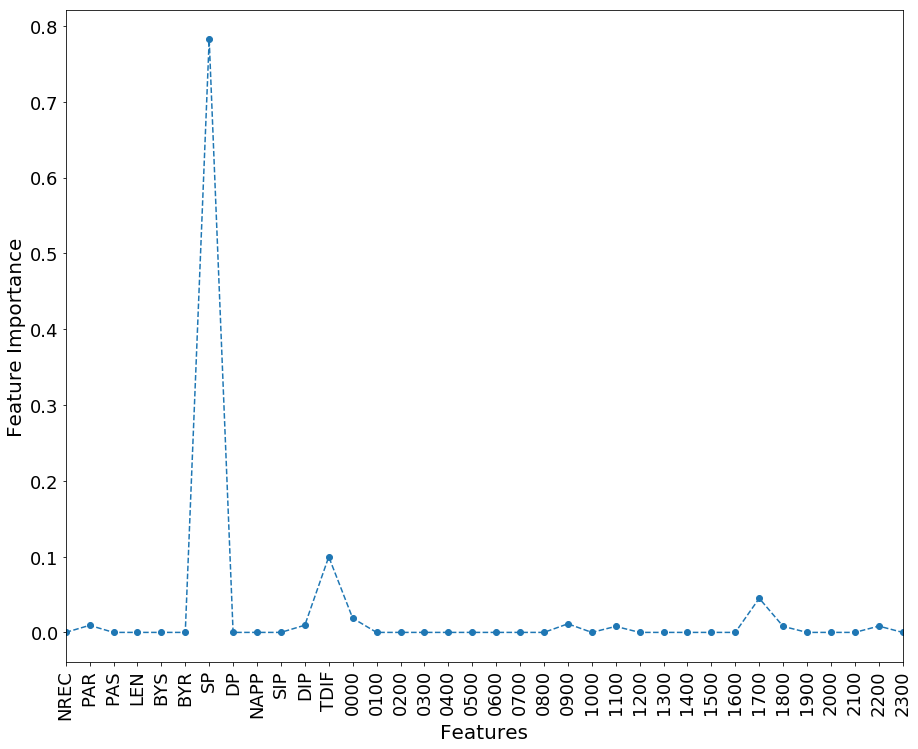

In [154]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [155]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[100,200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.920213951415

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3012   121     3133
1           237  1117     1354
__all__    3249  1238     4487

Accuracy of the  Bagging  model for test data is: 0.792511700468

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1172  182     1354
1           217  352      569
__all__    1389  534     1923

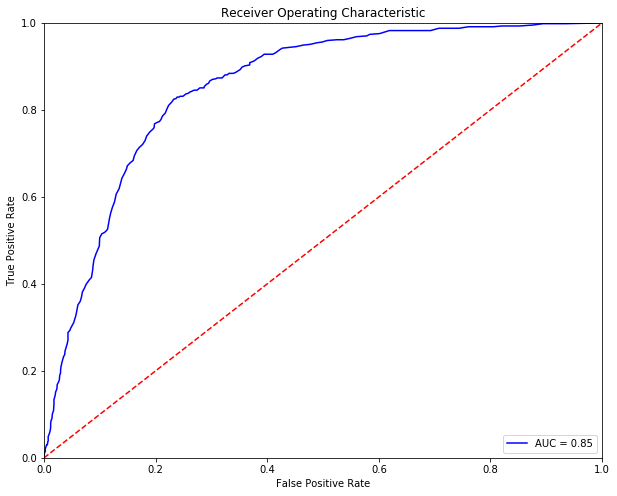

Optimal Threshold is 0.405
Accuracy on test data is: 0.786791471659


Predicted   0.0  1.0  __all__
Actual                       
0.0        1070  284     1354
1.0         126  443      569
__all__    1196  727     1923

In [156]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [157]:
table_70_70_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [158]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.9375975039


Predicted     0     1  __all__
Actual                        
0          3083    50     3133
1           230  1124     1354
__all__    3313  1174     4487

The test accuracy is: 0.793031721269


Predicted     0    1  __all__
Actual                       
0          1174  180     1354
1           218  351      569
__all__    1392  531     1923

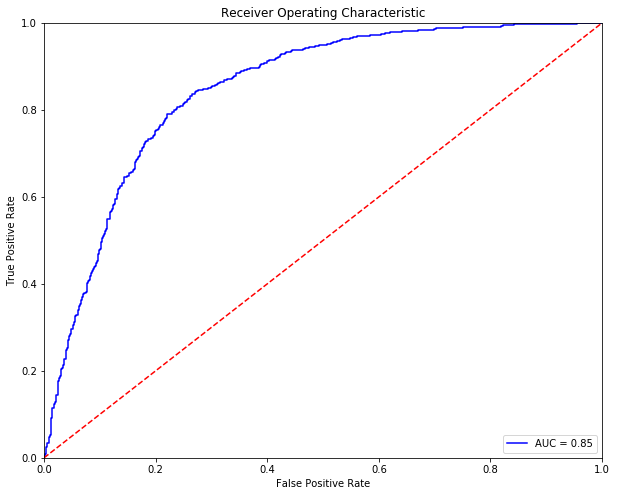

Optimal Threshold is 0.380443997879
Accuracy on test data is: 0.780031201248


Predicted   0.0  1.0  __all__
Actual                       
0.0        1057  297     1354
1.0         126  443      569
__all__    1183  740     1923

In [159]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [160]:
table_70_70_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [161]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.94116336082


Predicted     0     1  __all__
Actual                        
0          3048    85     3133
1           179  1175     1354
__all__    3227  1260     4487

The accuracy of the model on test data is: 0.757670306812


Predicted     0    1  __all__
Actual                       
0          1140  214     1354
1           252  317      569
__all__    1392  531     1923

1504/1923 [======================>.......] - ETA: 0s

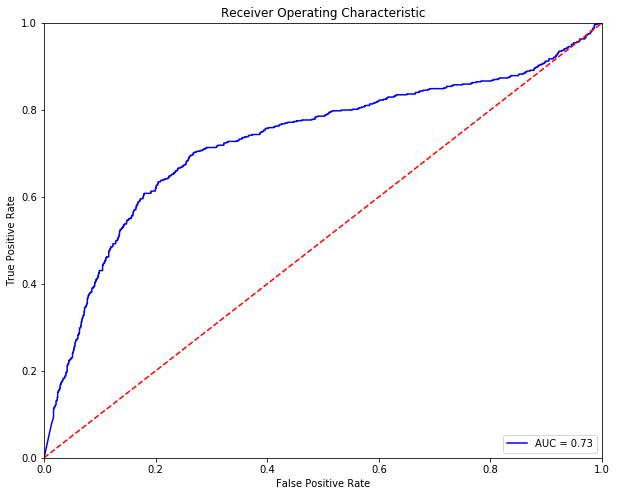

Optimal Threshold is 0.1121
Accuracy of Logistic Model on training data is: 0.710868434737


Predicted   0.0  1.0  __all__
Actual                       
0.0         963  391     1354
1.0         165  404      569
__all__    1128  795     1923

In [162]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [163]:
table_70_70_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [164]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.9min finished


The accuracy of the model on training data is: 0.796523289503


Predicted     0     1  __all__
Actual                        
0          2528   605     3133
1           308  1046     1354
__all__    2836  1651     4487

The accuracy of the model on test data is: 0.795111804472


Predicted     0    1  __all__
Actual                       
0          1097  257     1354
1           137  432      569
__all__    1234  689     1923

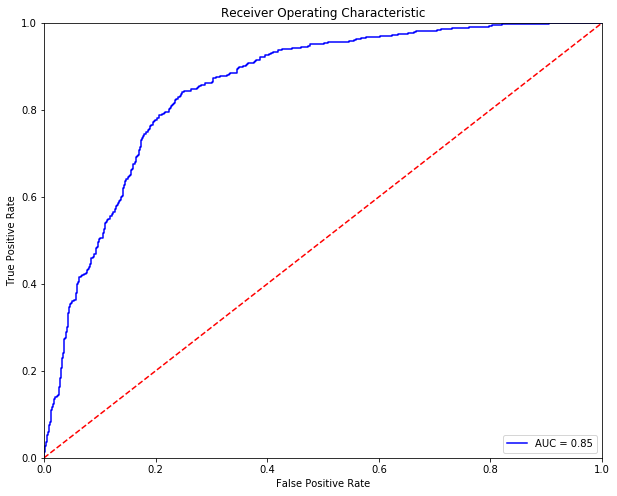

Optimal Threshold is 0.439358
Accuracy on test data is: 0.789911596464


Predicted   0.0  1.0  __all__
Actual                       
0.0        1070  284     1354
1.0         120  449      569
__all__    1190  733     1923

In [165]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [166]:
table_70_70_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [167]:
table_70_70_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_70_test.set_index(['index'],drop=True,inplace=True)
table_70_70_train.set_index(['index'],drop=True,inplace=True)
table_70_70_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_70_train)

print("Comparision Table for Test Accuracies:")
display(table_70_70_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_70_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1354.0  3133.0    0.0    0.0  0.000000   
LogisticRegression          0.781368   729.0  2777.0  356.0  625.0  0.113629   
RandomForestClassifier      0.780923   972.0  2532.0  601.0  382.0  0.191829   
AdaBoostClassifier          0.783151   960.0  2554.0  579.0  394.0  0.184807   
GradientBoostingClassifier  0.815467   889.0  2770.0  363.0  465.0  0.115863   
ExtraTreeClassifier         0.793403   819.0  2741.0  392.0  535.0  0.125120   
BaggingClassifier           0.920214  1117.0  3012.0  121.0  237.0  0.038621   
VotingClassifier            0.937598  1124.0  3083.0   50.0  230.0  0.015959   
Neural Network-1            0.941163  1175.0  3048.0   85.0  179.0  0.027131   
Neural-Network-2            0.796523  1046.0  2528.0  605.0  308.0  0.193106   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.461595  
RandomForestClassifier      0.282127  
AdaBoostClassifier          0.290990  
GradientBoostingClassifier  0.343427  
ExtraTreeClassifier         0.395126  
BaggingClassifier           0.175037  
VotingClassifier            0.169867  
Neural Network-1            0.132201  
Neural-Network-2            0.227474

Comparision Table for Test Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.788872  310.0  1207.0  147.0  259.0  0.108567   
LogisticRegression          0.783151  301.0  1205.0  149.0  268.0  0.110044   
RandomForestClassifier      0.791992  422.0  1101.0  253.0  147.0  0.186854   
AdaBoostClassifier          0.782111  398.0  1106.0  248.0  171.0  0.183161   
GradientBoostingClassifier  0.794592  347.0  1181.0  173.0  222.0  0.127770   
ExtraTreeClassifier         0.780551  326.0  1175.0  179.0  243.0  0.132201   
BaggingClassifier           0.792512  352.0  1172.0  182.0  217.0  0.134417   
VotingClassifier            0.793032  351.0  1174.0  180.0  218.0  0.132939   
Neural Network-1            0.757670  317.0  1140.0  214.0  252.0  0.158050   
Neural-Network-2            0.795112  432.0  1097.0  257.0  137.0  0.189808   

                                 FNR  
index                                 
KNeighborsClassifier        0.455185  
LogisticRegression          0.471002  
RandomForestClassifier      0.258348  
AdaBoostClassifier          0.300527  
GradientBoostingClassifier  0.390158  
ExtraTreeClassifier         0.427065  
BaggingClassifier           0.381371  
VotingClassifier            0.383128  
Neural Network-1            0.442882  
Neural-Network-2            0.240773

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.784191  446.0  1062.0  292.0  123.0  0.215657   
LogisticRegression          0.781071  444.0  1058.0  296.0  125.0  0.218612   
RandomForestClassifier      0.787832  448.0  1067.0  287.0  121.0  0.211965   
AdaBoostClassifier          0.779511  441.0  1058.0  296.0  128.0  0.218612   
GradientBoostingClassifier  0.795112  451.0  1078.0  276.0  118.0  0.203840   
ExtraTreeClassifier         0.775871  332.0  1160.0  194.0  237.0  0.143279   
BaggingClassifier           0.786791  443.0  1070.0  284.0  126.0  0.209749   
VotingClassifier            0.780031  443.0  1057.0  297.0  126.0  0.219350   
Neural Network-1            0.710868  404.0   963.0  391.0  165.0  0.288774   
Neural-Network-2            0.789912  449.0  1070.0  284.0  120.0  0.209749   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.216169   0.345436  0.855836  
LogisticRegression          0.219684   0.308766  0.849226  
RandomForestClassifier      0.212654   0.410364  0.835480  
AdaBoostClassifier          0.224956   0.485782  0.846042  
GradientBoostingClassifier  0.207381   0.384100  0.856036  
ExtraTreeClassifier         0.416520   0.401899  0.829409  
BaggingClassifier           0.221441   0.405000  0.852918  
VotingClassifier            0.221441   0.380444  0.846716  
Neural Network-1            0.289982   0.112100  0.729099  
Neural-Network-2            0.210896   0.439358  0.853464

#### Random State 10

In [168]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_10.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  5164  438.195198   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  1347  462.677060   

                                                           PAS         LEN  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  231.486445  116.998644   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  125.536748   90.790646   

                                                             BYS  \
Source_User                                                        
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  25566.860767   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  13083.769859   

                                                              BYR      SP  \
Source_User                                                                 
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  578623.737026  4106.0   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  633355.270973  1269.0   

                                                      DP  NAPP  SIP   DIP  \
Source_User                                                                 
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  42.0    54   69  1296   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  14.0    38   39   396   

                                                           TDIF  0000  0100  \
Source_User                                                                   
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   952.221340   521   405   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  3335.414996    63    65   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   398   211   281   225   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...   145   123   147    56   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   163   170    68    59   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    61    73    32    19   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...    36    74    99   142   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    19     6    26    52   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   201   218   307   284   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    33   135    75    21   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   219   257   223   225   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    24    23    15    28   

                                                    2200  2300  
Source_User                                                     
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   173   205  
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    56    50

In [169]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
23a784294c34545e19b709e6b22286bd5cfda913b32d55224d18437016ca9135    1
69881d3627335af7ed5613256f13b575318085c62d0a4eb30ef45663cdf794ef    0
4336978528c6a752e441b177d8222c6477449660ce0c772e567e6d7f32c7e896    0
6507f3f2e0c22751060868de62ee74aed8c0c37d331ab7ab39d0f9b17e8ef426    0
6944129302f4af2ade449b755a7cb0eace943209459b735222b74dbd369ed94e    0
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
9695f657a7d9b2c3202a6a25c401a660dd4fff43b396060141f23b9eefe1bed1    1
da1de679d352a2e7977a412053149f36d9e70e9bf3a059d44111774d3d8dd73f    0
4f663930f46b6dbf3e88f4a24101abb6ec2d202593d5042e26aebb10b705acf4    0
ded957eff469c307b079c16459b5caffca56d2ec1b3e36a05326c99daff1888e    0
Name: Target, dtype: int64

In [170]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [171]:
## Table to store training and test measures
table_70_70_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [172]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  manhattan           50  uniform

Accuracy of the  KNN  model for the training data is: 0.788722977491

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2782   355     3137
1           593   757     1350
__all__    3375  1112     4487

Accuracy of the  KNN  model for test data is: 0.776911076443

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1191  159     1350
1           270  303      573
__all__    1461  462     1923

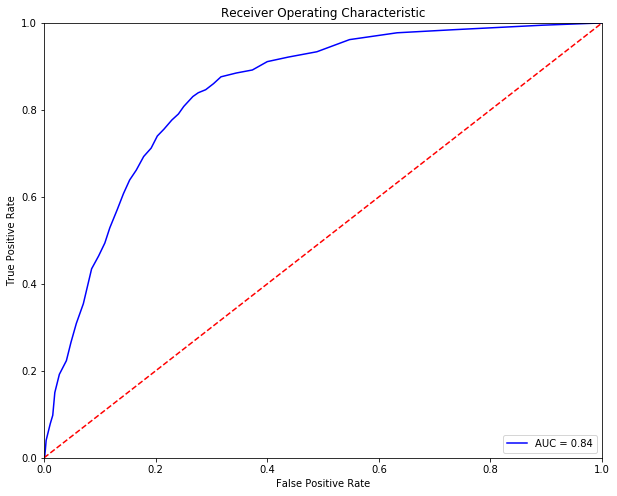

Optimal Threshold is 0.34
Accuracy on test data is: 0.776391055642


Predicted   0.0  1.0  __all__
Actual                       
0.0        1060  290     1350
1.0         140  433      573
__all__    1200  723     1923

In [173]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [174]:
table_70_70_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [175]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.7       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.782705593938

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2789   348     3137
1           627   723     1350
__all__    3416  1071     4487

Accuracy of the  Logistic  model for test data is: 0.768070722829

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1181  169     1350
1           277  296      573
__all__    1458  465     1923

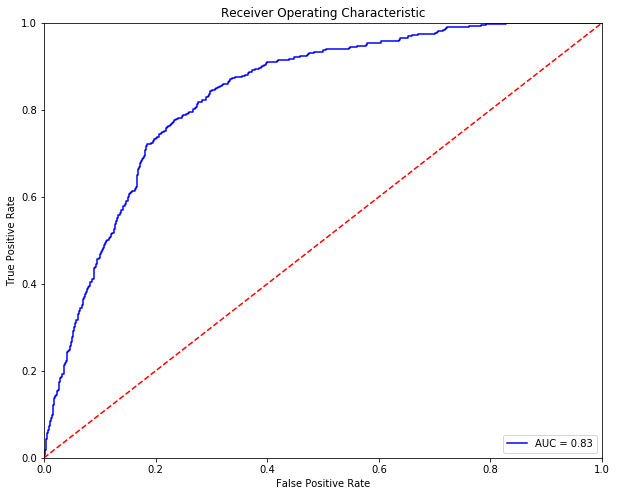

Optimal Threshold is 0.303492986573
Accuracy on test data is: 0.770150806032


Predicted   0.0  1.0  __all__
Actual                       
0.0        1040  310     1350
1.0         132  441      573
__all__    1172  751     1923

In [176]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [177]:
table_70_70_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [178]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.782482727881

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2555   582     3137
1           394   956     1350
__all__    2949  1538     4487

Accuracy of the  Random Forest Trees  model for test data is: 0.781591263651

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1098  252     1350
1           168  405      573
__all__    1266  657     1923

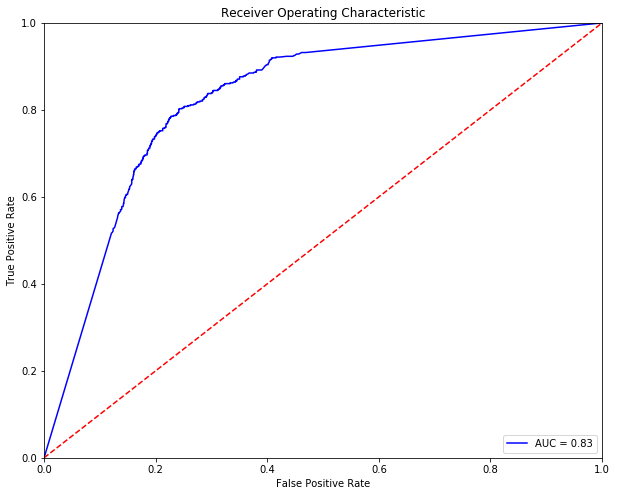

Optimal Threshold is 0.378992166903
Accuracy on test data is: 0.776911076443


Predicted   0.0  1.0  __all__
Actual                       
0.0        1049  301     1350
1.0         128  445      573
__all__    1177  746     1923

In [179]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [180]:
table_70_70_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

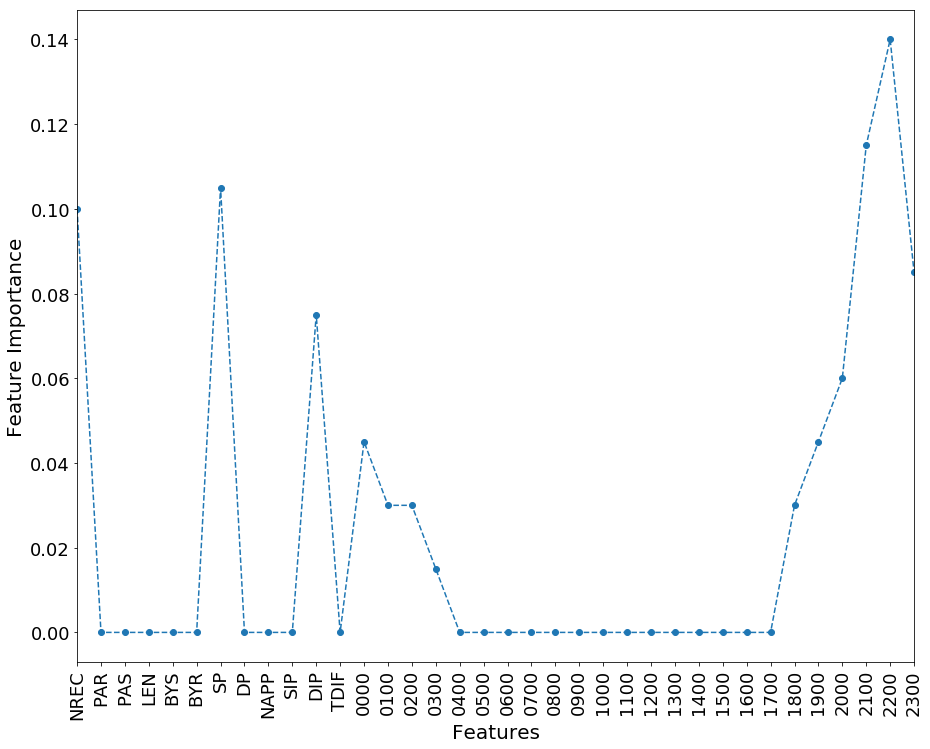

In [181]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [182]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.788500111433

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2748   389     3137
1           560   790     1350
__all__    3308  1179     4487

Accuracy of the  AdaBoostClassifier  model for test data is: 0.764950598024

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1156  194     1350
1           258  315      573
__all__    1414  509     1923

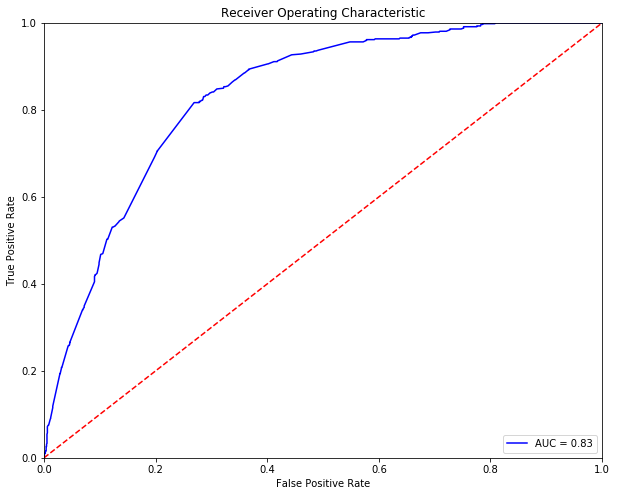

Optimal Threshold is 0.476187571106
Accuracy on test data is: 0.769630785231


Predicted   0.0  1.0  __all__
Actual                       
0.0        1075  275     1350
1.0         168  405      573
__all__    1243  680     1923

In [183]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [184]:
table_70_70_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

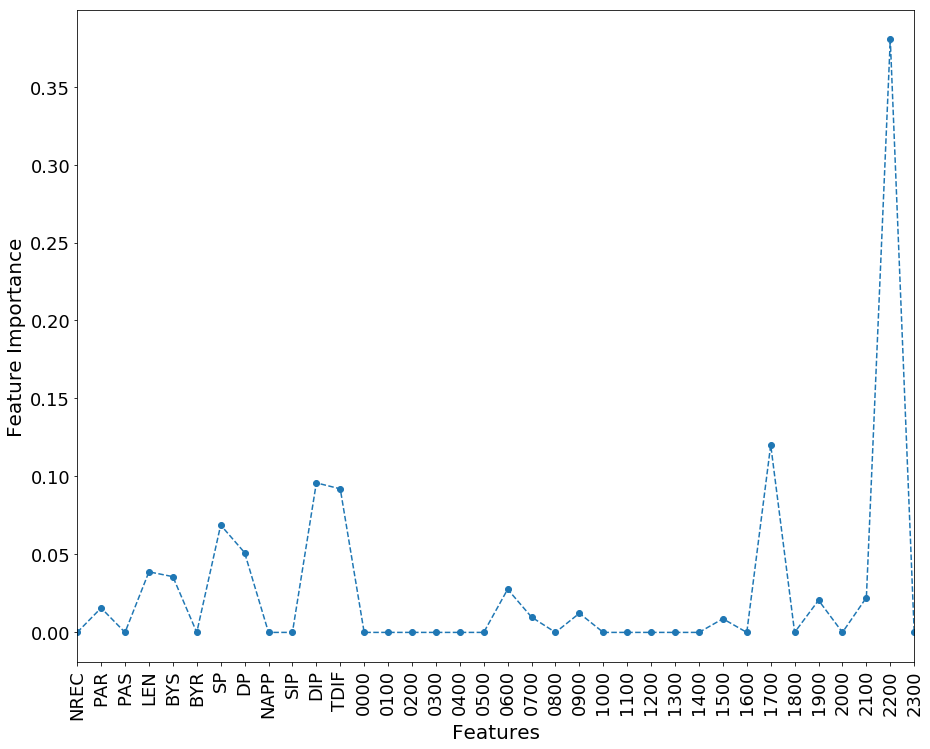

In [185]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [186]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse            0.1  exponential                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1           100             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.82081568977

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2760   377     3137
1           427   923     1350
__all__    3187  1300     4487

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.784191367655

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1157  193     1350
1           222  351      573
__all__    1379  544     1923

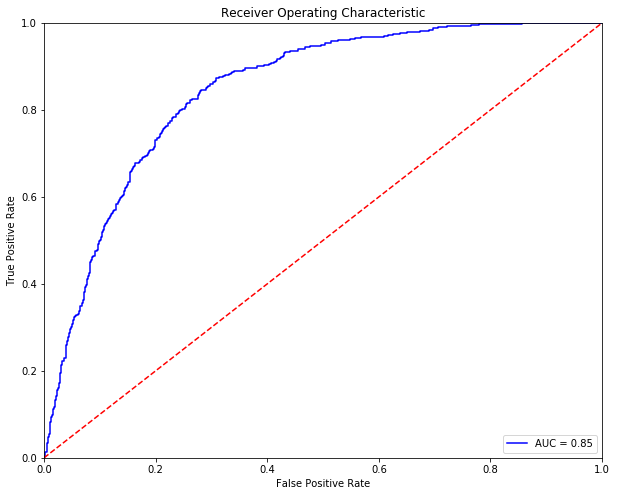

Optimal Threshold is 0.349666864972
Accuracy on test data is: 0.773790951638


Predicted   0.0  1.0  __all__
Actual                       
0.0        1045  305     1350
1.0         130  443      573
__all__    1175  748     1923

In [187]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [188]:
table_70_70_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

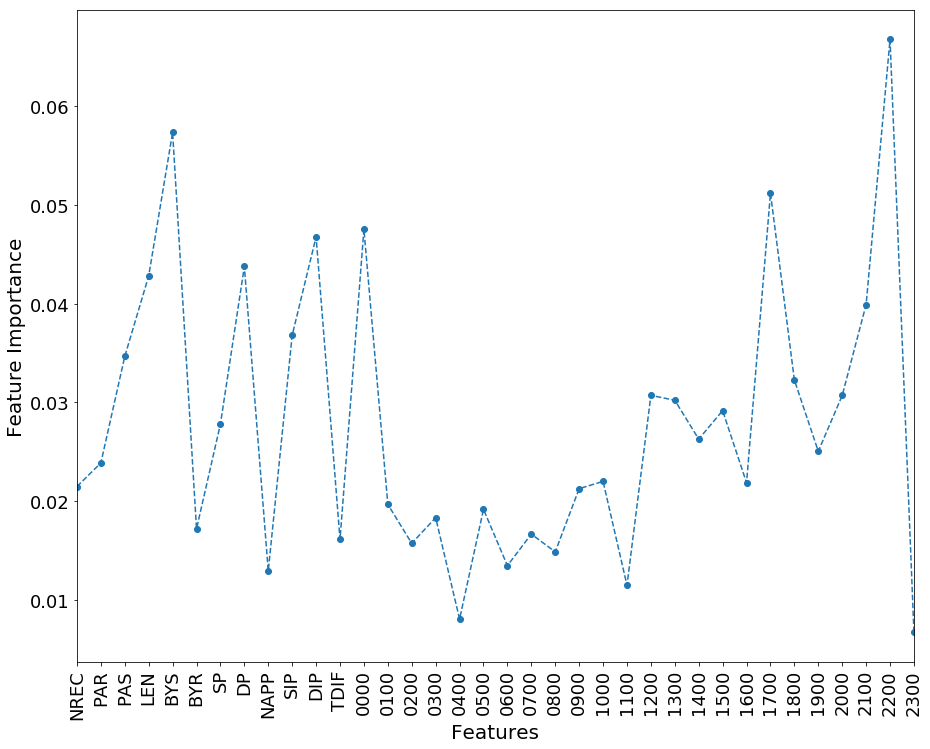

In [189]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [190]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.797191887676

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2775   362     3137
1           548   802     1350
__all__    3323  1164     4487

Accuracy of the  Extra Decision Tree  model for test data is: 0.776911076443

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1172  178     1350
1           251  322      573
__all__    1423  500     1923

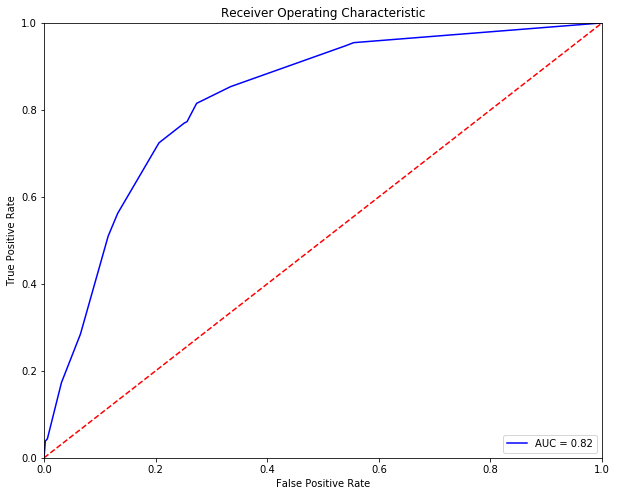

Optimal Threshold is 0.388888888889
Accuracy on test data is: 0.773270930837


Predicted   0.0  1.0  __all__
Actual                       
0.0        1072  278     1350
1.0         158  415      573
__all__    1230  693     1923

In [191]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [192]:
table_70_70_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [193]:
%%capture
table_70_70_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

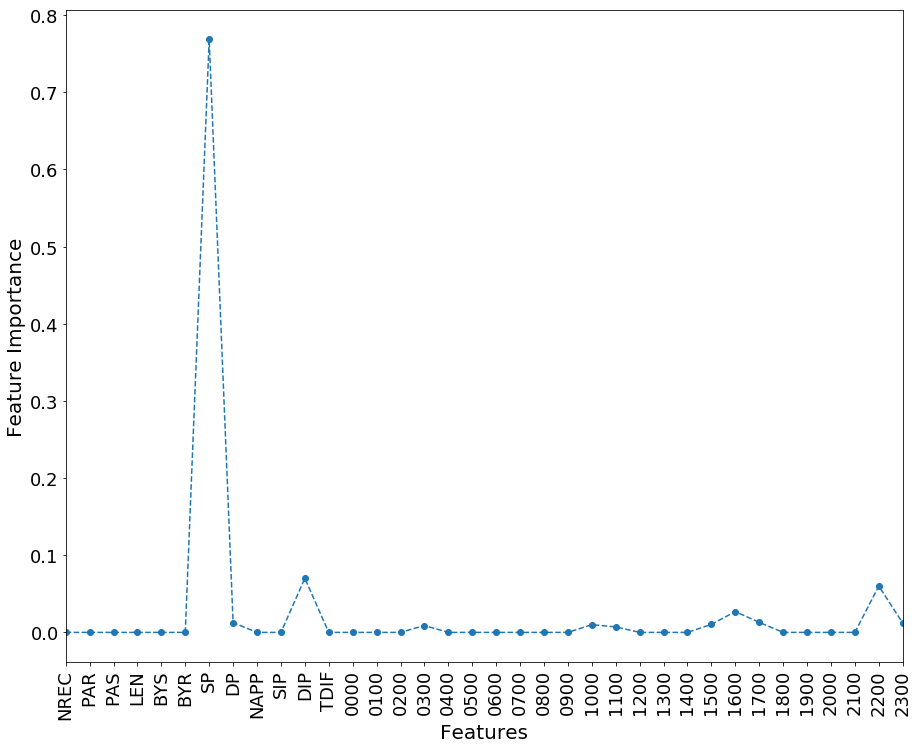

In [194]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [195]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[100,200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.3          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.95186093158

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3100    37     3137
1           179  1171     1350
__all__    3279  1208     4487

Accuracy of the  Bagging  model for test data is: 0.783151326053

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1147  203     1350
1           214  359      573
__all__    1361  562     1923

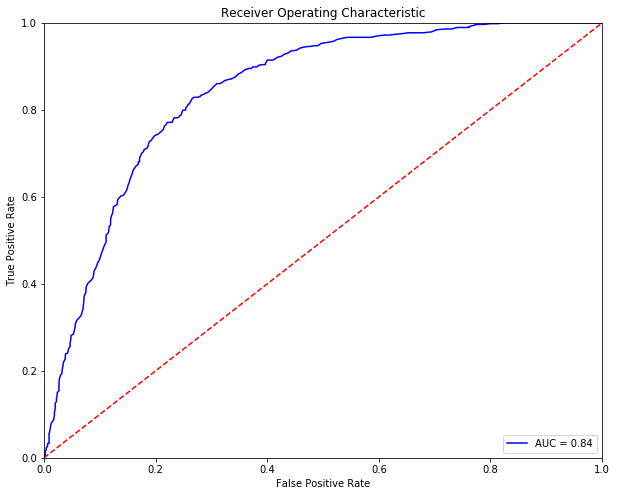

Optimal Threshold is 0.39
Accuracy on test data is: 0.773270930837


Predicted   0.0  1.0  __all__
Actual                       
0.0        1045  305     1350
1.0         131  442      573
__all__    1176  747     1923

In [196]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [197]:
table_70_70_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [198]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.94116336082


Predicted     0     1  __all__
Actual                        
0          3106    31     3137
1           233  1117     1350
__all__    3339  1148     4487

The test accuracy is: 0.767030681227


Predicted     0    1  __all__
Actual                       
0          1151  199     1350
1           249  324      573
__all__    1400  523     1923

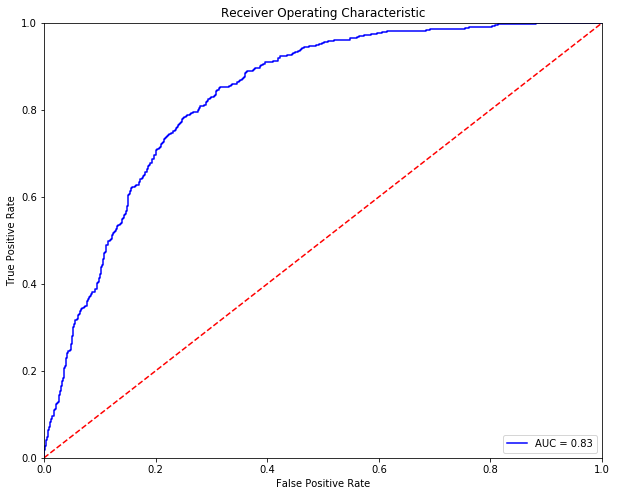

Optimal Threshold is 0.357479860428
Accuracy on test data is: 0.761310452418


Predicted   0.0  1.0  __all__
Actual                       
0.0        1028  322     1350
1.0         137  436      573
__all__    1165  758     1923

In [199]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [200]:
table_70_70_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [201]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.944283485638


Predicted     0     1  __all__
Actual                        
0          3081    56     3137
1           194  1156     1350
__all__    3275  1212     4487

The accuracy of the model on test data is: 0.757150286011


Predicted     0    1  __all__
Actual                       
0          1123  227     1350
1           240  333      573
__all__    1363  560     1923

1280/1923 [==================>...........] - ETA: 0s

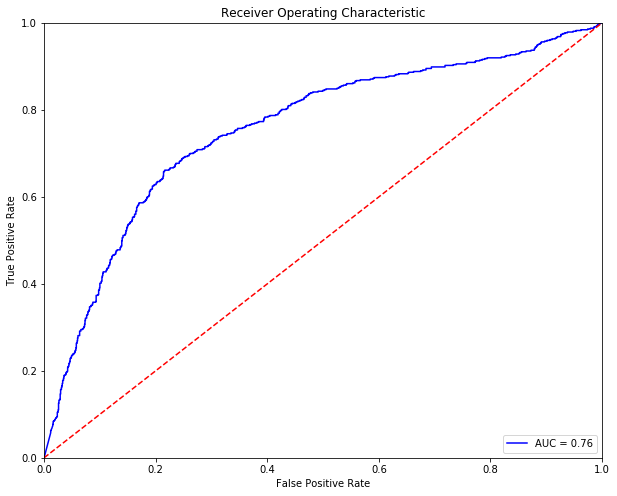

Optimal Threshold is 0.142494
Accuracy of Logistic Model on training data is: 0.71242849714


Predicted   0.0  1.0  __all__
Actual                       
0.0         962  388     1350
1.0         165  408      573
__all__    1127  796     1923

In [202]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [203]:
table_70_70_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [204]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.3min finished


The accuracy of the model on training data is: 0.817918431023


Predicted     0     1  __all__
Actual                        
0          2790   347     3137
1           470   880     1350
__all__    3260  1227     4487

The accuracy of the model on test data is: 0.771190847634


Predicted     0    1  __all__
Actual                       
0          1163  187     1350
1           253  320      573
__all__    1416  507     1923

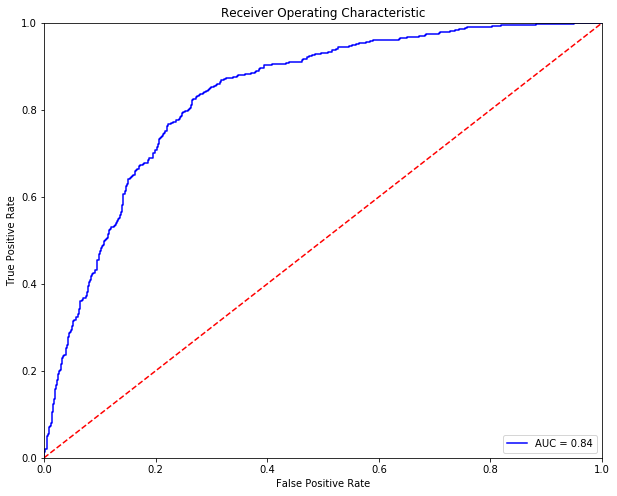

Optimal Threshold is 0.199639
Accuracy on test data is: 0.769630785231


Predicted   0.0  1.0  __all__
Actual                       
0.0        1039  311     1350
1.0         132  441      573
__all__    1171  752     1923

In [205]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [206]:
table_70_70_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [207]:
table_70_70_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_70_10_test.set_index(['index'],drop=True,inplace=True)
table_70_70_10_train.set_index(['index'],drop=True,inplace=True)
table_70_70_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_70_10_train)

print("Comparision Table for Test Accuracies:")
display(table_70_70_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_70_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        0.788723   757.0  2782.0  355.0  593.0  0.113165   
LogisticRegression          0.782706   723.0  2789.0  348.0  627.0  0.110934   
RandomForestClassifier      0.782483   956.0  2555.0  582.0  394.0  0.185528   
AdaBoostClassifier          0.788500   790.0  2748.0  389.0  560.0  0.124004   
GradientBoostingClassifier  0.820816   923.0  2760.0  377.0  427.0  0.120179   
ExtraTreeClassifier         0.797192   802.0  2775.0  362.0  548.0  0.115397   
BaggingClassifier           0.951861  1171.0  3100.0   37.0  179.0  0.011795   
VotingClassifier            0.941163  1117.0  3106.0   31.0  233.0  0.009882   
Neural Network-1            0.944283  1156.0  3081.0   56.0  194.0  0.017851   
Neural-Network-2            0.817918   880.0  2790.0  347.0  470.0  0.110615   

                                 FNR  
index                                 
KNeighborsClassifier        0.439259  
LogisticRegression          0.464444  
RandomForestClassifier      0.291852  
AdaBoostClassifier          0.414815  
GradientBoostingClassifier  0.316296  
ExtraTreeClassifier         0.405926  
BaggingClassifier           0.132593  
VotingClassifier            0.172593  
Neural Network-1            0.143704  
Neural-Network-2            0.348148

Comparision Table for Test Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.776911  303.0  1191.0  159.0  270.0  0.117778   
LogisticRegression          0.768071  296.0  1181.0  169.0  277.0  0.125185   
RandomForestClassifier      0.781591  405.0  1098.0  252.0  168.0  0.186667   
AdaBoostClassifier          0.764951  315.0  1156.0  194.0  258.0  0.143704   
GradientBoostingClassifier  0.784191  351.0  1157.0  193.0  222.0  0.142963   
ExtraTreeClassifier         0.776911  322.0  1172.0  178.0  251.0  0.131852   
BaggingClassifier           0.783151  359.0  1147.0  203.0  214.0  0.150370   
VotingClassifier            0.767031  324.0  1151.0  199.0  249.0  0.147407   
Neural Network-1            0.757150  333.0  1123.0  227.0  240.0  0.168148   
Neural-Network-2            0.771191  320.0  1163.0  187.0  253.0  0.138519   

                                 FNR  
index                                 
KNeighborsClassifier        0.471204  
LogisticRegression          0.483421  
RandomForestClassifier      0.293194  
AdaBoostClassifier          0.450262  
GradientBoostingClassifier  0.387435  
ExtraTreeClassifier         0.438045  
BaggingClassifier           0.373473  
VotingClassifier            0.434555  
Neural Network-1            0.418848  
Neural-Network-2            0.441536

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.776391  433.0  1060.0  290.0  140.0  0.214815   
LogisticRegression          0.770151  441.0  1040.0  310.0  132.0  0.229630   
RandomForestClassifier      0.776911  445.0  1049.0  301.0  128.0  0.222963   
AdaBoostClassifier          0.769631  405.0  1075.0  275.0  168.0  0.203704   
GradientBoostingClassifier  0.773791  443.0  1045.0  305.0  130.0  0.225926   
ExtraTreeClassifier         0.773271  415.0  1072.0  278.0  158.0  0.205926   
BaggingClassifier           0.773271  442.0  1045.0  305.0  131.0  0.225926   
VotingClassifier            0.761310  436.0  1028.0  322.0  137.0  0.238519   
Neural Network-1            0.712428  408.0   962.0  388.0  165.0  0.287407   
Neural-Network-2            0.769631  441.0  1039.0  311.0  132.0  0.230370   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.244328   0.340000  0.840886  
LogisticRegression          0.230366   0.303493  0.834873  
RandomForestClassifier      0.223386   0.378992  0.825260  
AdaBoostClassifier          0.293194   0.476188  0.832968  
GradientBoostingClassifier  0.226876   0.349667  0.845754  
ExtraTreeClassifier         0.275742   0.388889  0.823709  
BaggingClassifier           0.228621   0.390000  0.842992  
VotingClassifier            0.239092   0.357480  0.833213  
Neural Network-1            0.287958   0.142494  0.755995  
Neural-Network-2            0.230366   0.199639  0.835356

#### Random State 20

In [208]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_20.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  1580  297.743038   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  2071   92.849831   

                                                           PAS        LEN  \
Source_User                                                                 
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  121.938608  75.572152   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   68.084500  85.015451   

                                                             BYS  \
Source_User                                                        
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  10785.806962   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   9264.509416   

                                                              BYR      SP  \
Source_User                                                                 
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  373515.271519  1513.0   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  113797.491067  1908.0   

                                                      DP  NAPP  SIP  DIP  \
Source_User                                                                
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  12.0    30   34  415   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  18.0    44   58  538   

                                                           TDIF  0000  0100  \
Source_User                                                                   
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  2816.703797    18    34   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  2378.489136   200   135   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    54    15    18    46   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    60    81    56   117   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    81    30    43    44   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    50    80   174    78   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    47    92    79    47   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   145    77    57    41   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    56    60    40   119   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    41    49    29    66   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    88   127   191   167   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    37    72    45   122   

                                                    2200  2300  
Source_User                                                     
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    45    39  
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    68   191

In [209]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
73592328e1aba504b315fc06ce72a444a3afa3ca071ce135c6519b653b782900    0
5393c0df6a44651953827b1afab0c1c821dbdc352b1b88263f9d325b00bf1b7d    0
20e2144674cba74b4658c48eb02e290912cdf7d9815e9f0a8913e8f253d40b3c    0
0a8a122a1d0a74f656a8c288853357fe1e8ee2681f2308f75b9217f8dd73489d    0
e39c9093096a6ba89ad4d2e3987b430f8f6f8a86a6e73fc80bf4b5e0408e0edd    0
c82e979deebbc9c33760931128b2552d94d73128806ee7f3ebe1bdd3f7ca5c21    0
de1af22a9df53353a6f2c79696966a215a429a47150cd06de7b4f39b2f8e9976    0
a4a89c63ce9691738b6b014ae723928e73b2bc57ddb4bce98beb47cdce1ab45e    0
d8ccad69e30b55cf1048301d2fb7cd696a0ecab46a80e73f992ac427cd241e77    0
b7826c03e71919e65e0236c1bb7fb63e1de351fbc74c65b9ddb5cfe7c19881b0    0
Name: Target, dtype: int64

In [210]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [211]:
## Table to store training and test measures
table_70_70_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [212]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  manhattan           50  uniform

Accuracy of the  KNN  model for the training data is: 0.788277245376

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2725   403     3128
1           547   812     1359
__all__    3272  1215     4487

Accuracy of the  KNN  model for test data is: 0.796151846074

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1190  169     1359
1           223  341      564
__all__    1413  510     1923

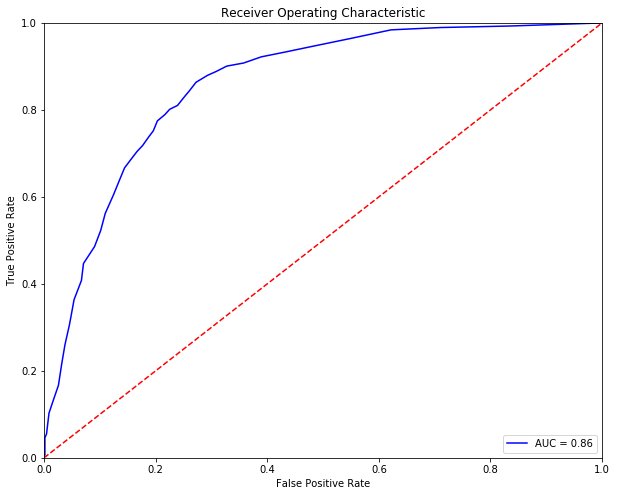

Optimal Threshold is 0.34
Accuracy on test data is: 0.790431617265


Predicted   0.0  1.0  __all__
Actual                       
0.0        1083  276     1359
1.0         127  437      564
__all__    1210  713     1923

In [213]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [214]:
table_70_70_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [215]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.5        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.782928459996

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2637   491     3128
1           483   876     1359
__all__    3120  1367     4487

Accuracy of the  Logistic  model for test data is: 0.794591783671

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1161  198     1359
1           197  367      564
__all__    1358  565     1923

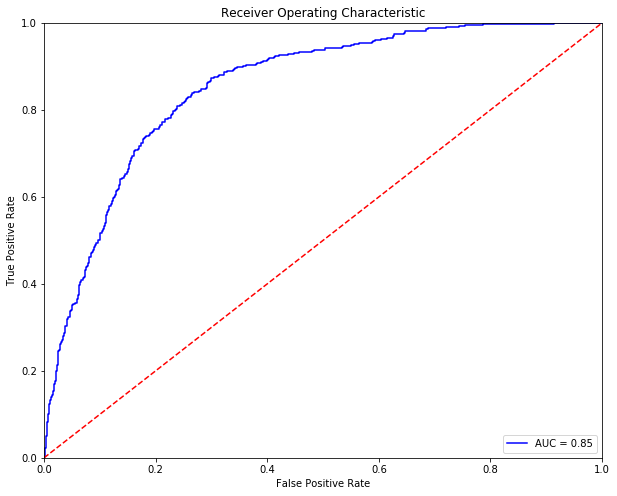

Optimal Threshold is 0.419715358838
Accuracy on test data is: 0.778991159646


Predicted   0.0  1.0  __all__
Actual                       
0.0        1059  300     1359
1.0         125  439      564
__all__    1184  739     1923

In [216]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [217]:
table_70_70_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [218]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           100      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.782036995766

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2562   566     3128
1           412   947     1359
__all__    2974  1513     4487

Accuracy of the  Random Forest Trees  model for test data is: 0.795631825273

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1129  230     1359
1           163  401      564
__all__    1292  631     1923

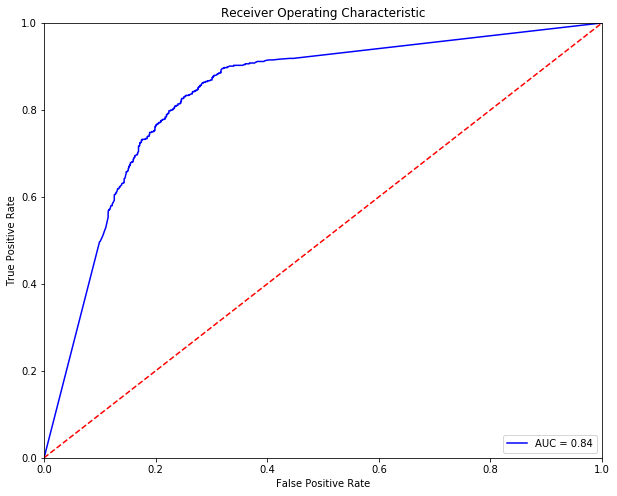

Optimal Threshold is 0.366072477373
Accuracy on test data is: 0.782631305252


Predicted   0.0  1.0  __all__
Actual                       
0.0        1064  295     1359
1.0         123  441      564
__all__    1187  736     1923

In [219]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [220]:
table_70_70_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

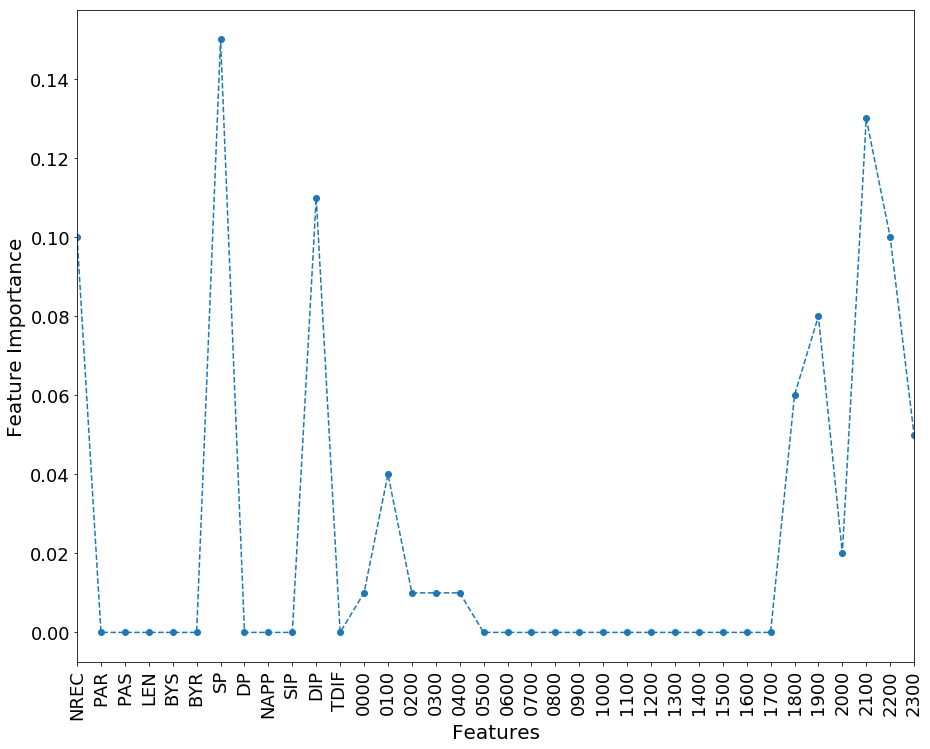

In [221]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [222]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.792511700468

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2630   498     3128
1           433   926     1359
__all__    3063  1424     4487

Accuracy of the  AdaBoostClassifier  model for test data is: 0.786271450858

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1135  224     1359
1           187  377      564
__all__    1322  601     1923

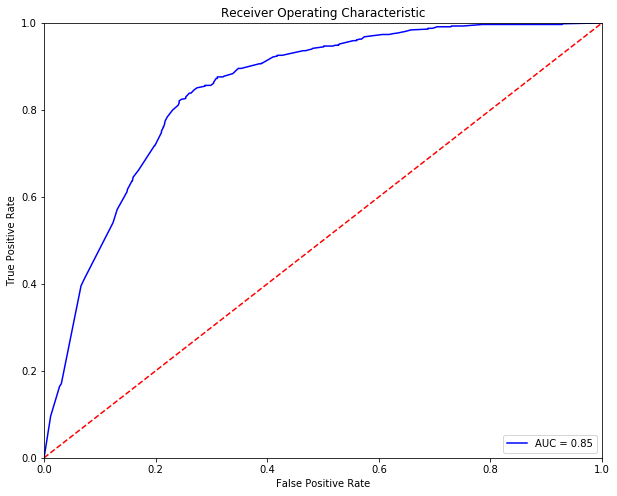

Optimal Threshold is 0.478376988818
Accuracy on test data is: 0.780551222049


Predicted   0.0  1.0  __all__
Actual                       
0.0        1064  295     1359
1.0         127  437      564
__all__    1191  732     1923

In [223]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [224]:
table_70_70_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

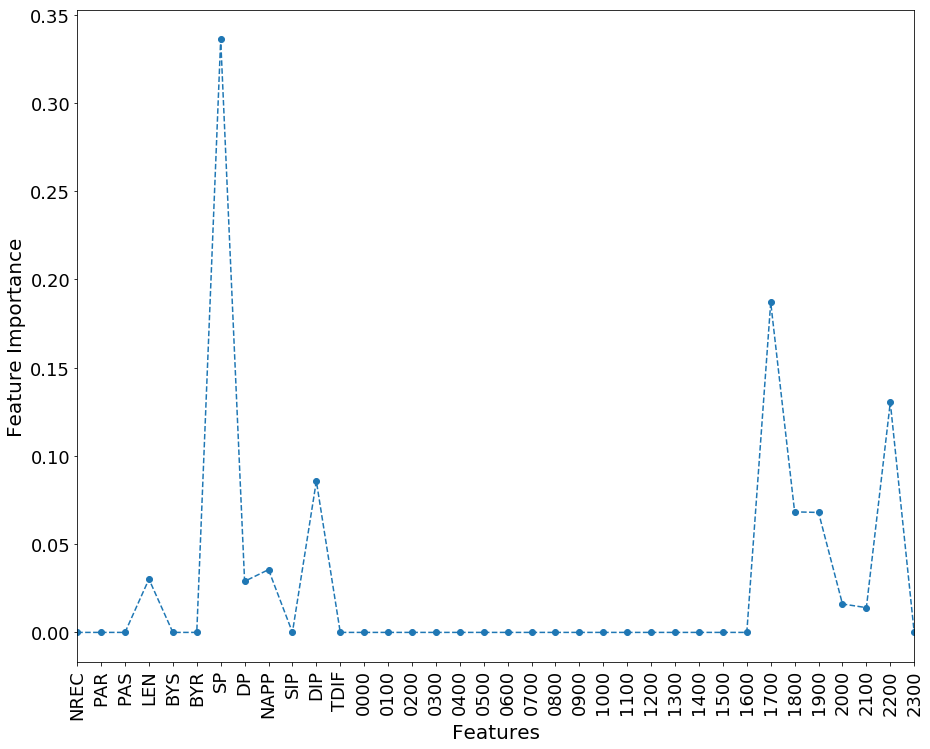

In [225]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [226]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           100             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.801649208825

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2680   448     3128
1           442   917     1359
__all__    3122  1365     4487

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.793031721269

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1161  198     1359
1           200  364      564
__all__    1361  562     1923

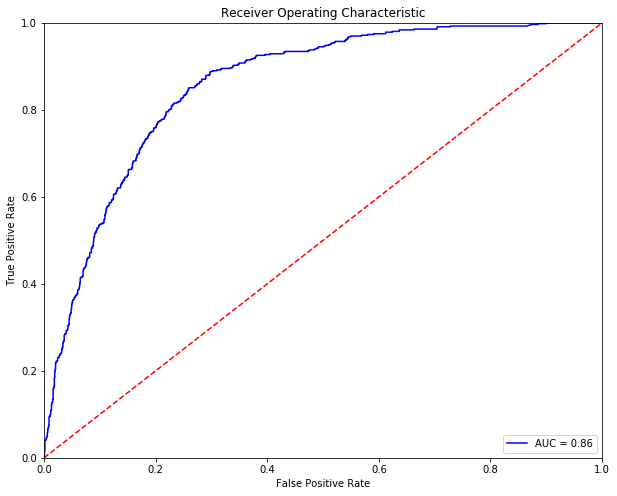

Optimal Threshold is 0.358413783513
Accuracy on test data is: 0.783671346854


Predicted   0.0  1.0  __all__
Actual                       
0.0        1066  293     1359
1.0         123  441      564
__all__    1189  734     1923

In [227]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [228]:
table_70_70_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

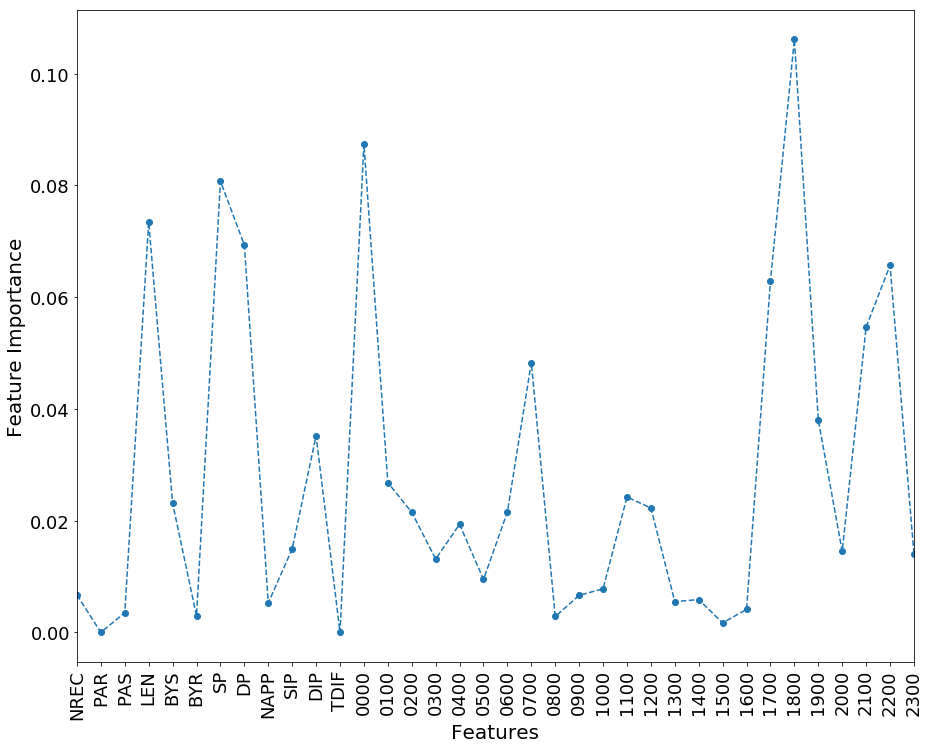

In [229]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [230]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.790951638066

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2604   524     3128
1           414   945     1359
__all__    3018  1469     4487

Accuracy of the  Extra Decision Tree  model for test data is: 0.794071762871

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1147  212     1359
1           184  380      564
__all__    1331  592     1923

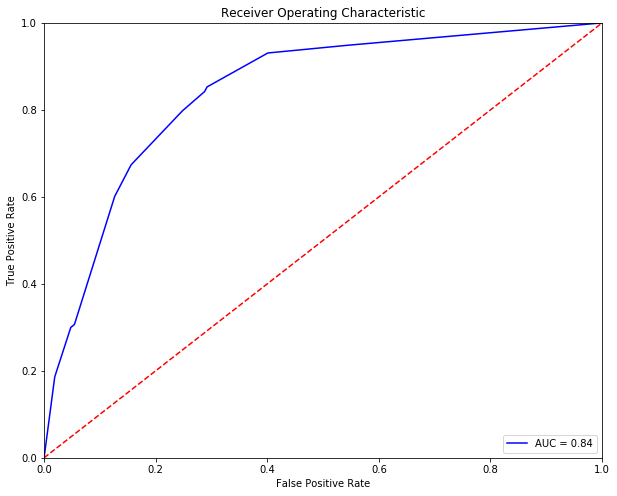

Optimal Threshold is 0.358024691358
Accuracy on test data is: 0.794071762871


Predicted   0.0  1.0  __all__
Actual                       
0.0        1147  212     1359
1.0         184  380      564
__all__    1331  592     1923

In [231]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [232]:
table_70_70_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [233]:
%%capture
table_70_70_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

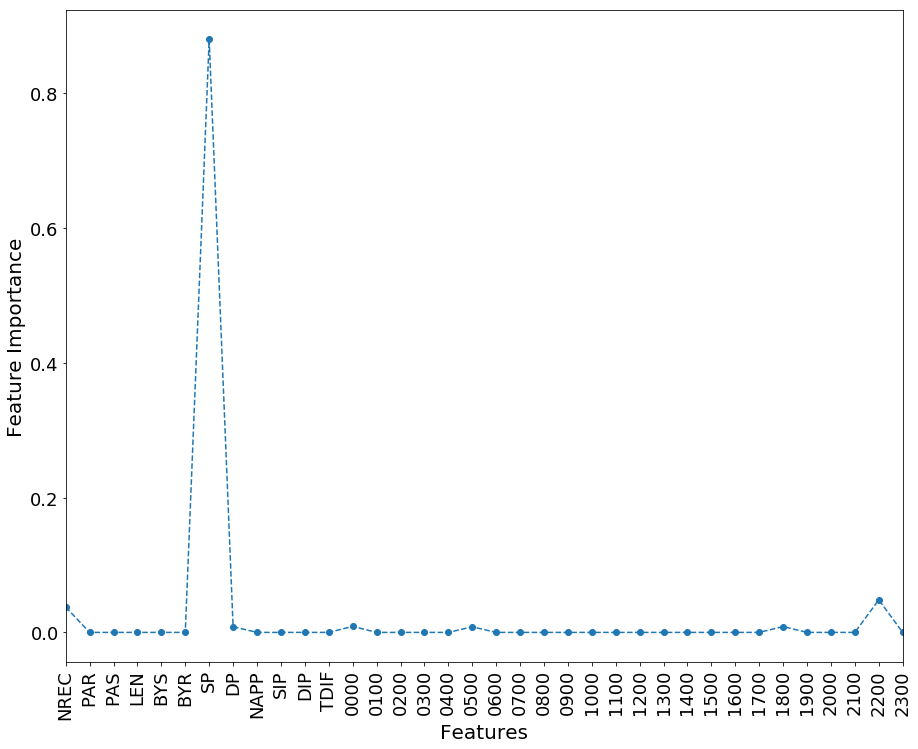

In [234]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [235]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[100,200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.2          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.954758190328

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3099    29     3128
1           174  1185     1359
__all__    3273  1214     4487

Accuracy of the  Bagging  model for test data is: 0.79355174207

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1166  193     1359
1           204  360      564
__all__    1370  553     1923

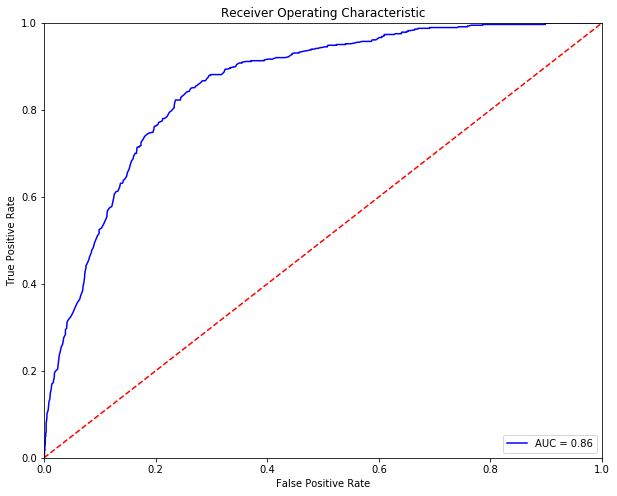

Optimal Threshold is 0.376666666667
Accuracy on test data is: 0.783671346854


Predicted   0.0  1.0  __all__
Actual                       
0.0        1067  292     1359
1.0         124  440      564
__all__    1191  732     1923

In [236]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [237]:
table_70_70_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [238]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.934477379095


Predicted     0     1  __all__
Actual                        
0          3079    49     3128
1           245  1114     1359
__all__    3324  1163     4487

The test accuracy is: 0.784191367655


Predicted     0    1  __all__
Actual                       
0          1170  189     1359
1           226  338      564
__all__    1396  527     1923

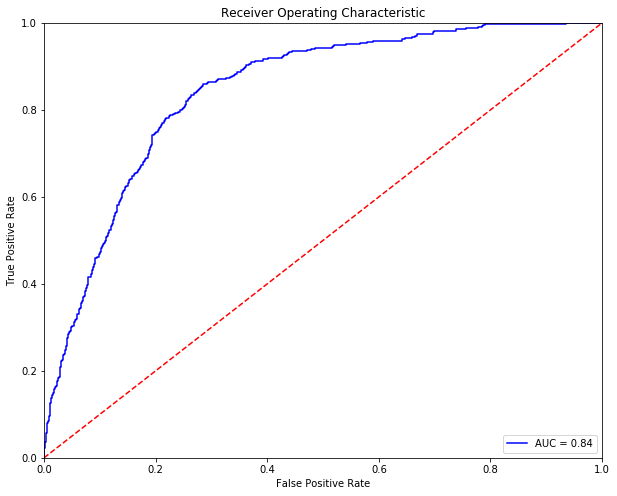

Optimal Threshold is 0.365807453021
Accuracy on test data is: 0.78107124285


Predicted   0.0  1.0  __all__
Actual                       
0.0        1062  297     1359
1.0         124  440      564
__all__    1186  737     1923

In [239]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [240]:
table_70_70_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [241]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.92333407622


Predicted     0     1  __all__
Actual                        
0          3091    37     3128
1           307  1052     1359
__all__    3398  1089     4487

The accuracy of the model on test data is: 0.750390015601


Predicted     0    1  __all__
Actual                       
0          1190  169     1359
1           311  253      564
__all__    1501  422     1923

1088/1923 [===============>..............] - ETA: 0s

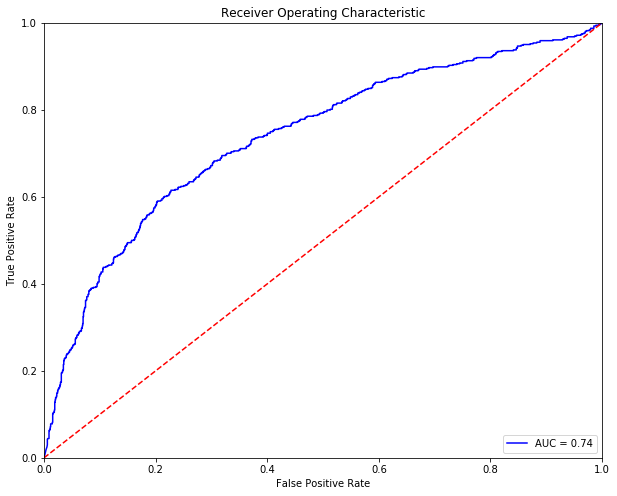

Optimal Threshold is 0.095854
Accuracy of Logistic Model on training data is: 0.684867394696


Predicted   0.0  1.0  __all__
Actual                       
0.0         931  428     1359
1.0         178  386      564
__all__    1109  814     1923

In [242]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [243]:
table_70_70_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [244]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.8min finished


The accuracy of the model on training data is: 0.80476933363


Predicted     0     1  __all__
Actual                        
0          2634   494     3128
1           382   977     1359
__all__    3016  1471     4487

The accuracy of the model on test data is: 0.783671346854


Predicted     0    1  __all__
Actual                       
0          1127  232     1359
1           184  380      564
__all__    1311  612     1923

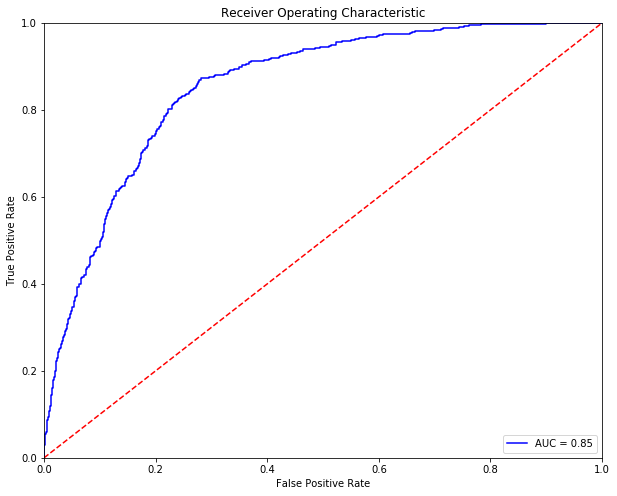

Optimal Threshold is 0.372177
Accuracy on test data is: 0.784711388456


Predicted   0.0  1.0  __all__
Actual                       
0.0        1067  292     1359
1.0         122  442      564
__all__    1189  734     1923

In [245]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [246]:
table_70_70_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [247]:
table_70_70_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_70_20_test.set_index(['index'],drop=True,inplace=True)
table_70_70_20_train.set_index(['index'],drop=True,inplace=True)
table_70_70_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_70_20_train)

print("Comparision Table for Test Accuracies:")
display(table_70_70_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_70_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        0.788277   812.0  2725.0  403.0  547.0  0.128836   
LogisticRegression          0.782928   876.0  2637.0  491.0  483.0  0.156969   
RandomForestClassifier      0.782037   947.0  2562.0  566.0  412.0  0.180946   
AdaBoostClassifier          0.792512   926.0  2630.0  498.0  433.0  0.159207   
GradientBoostingClassifier  0.801649   917.0  2680.0  448.0  442.0  0.143223   
ExtraTreeClassifier         0.790952   945.0  2604.0  524.0  414.0  0.167519   
BaggingClassifier           0.954758  1185.0  3099.0   29.0  174.0  0.009271   
VotingClassifier            0.934477  1114.0  3079.0   49.0  245.0  0.015665   
Neural Network-1            0.923334  1052.0  3091.0   37.0  307.0  0.011829   
Neural-Network-2            0.804769   977.0  2634.0  494.0  382.0  0.157928   

                                 FNR  
index                                 
KNeighborsClassifier        0.402502  
LogisticRegression          0.355408  
RandomForestClassifier      0.303164  
AdaBoostClassifier          0.318617  
GradientBoostingClassifier  0.325239  
ExtraTreeClassifier         0.304636  
BaggingClassifier           0.128035  
VotingClassifier            0.180280  
Neural Network-1            0.225901  
Neural-Network-2            0.281089

Comparision Table for Test Accuracies:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.796152  341.0  1190.0  169.0  223.0  0.124356   
LogisticRegression          0.794592  367.0  1161.0  198.0  197.0  0.145695   
RandomForestClassifier      0.795632  401.0  1129.0  230.0  163.0  0.169242   
AdaBoostClassifier          0.786271  377.0  1135.0  224.0  187.0  0.164827   
GradientBoostingClassifier  0.793032  364.0  1161.0  198.0  200.0  0.145695   
ExtraTreeClassifier         0.794072  380.0  1147.0  212.0  184.0  0.155997   
BaggingClassifier           0.793552  360.0  1166.0  193.0  204.0  0.142016   
VotingClassifier            0.784191  338.0  1170.0  189.0  226.0  0.139073   
Neural Network-1            0.750390  253.0  1190.0  169.0  311.0  0.124356   
Neural-Network-2            0.783671  380.0  1127.0  232.0  184.0  0.170714   

                                 FNR  
index                                 
KNeighborsClassifier        0.395390  
LogisticRegression          0.349291  
RandomForestClassifier      0.289007  
AdaBoostClassifier          0.331560  
GradientBoostingClassifier  0.354610  
ExtraTreeClassifier         0.326241  
BaggingClassifier           0.361702  
VotingClassifier            0.400709  
Neural Network-1            0.551418  
Neural-Network-2            0.326241

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.790432  437.0  1083.0  276.0  127.0  0.203091   
LogisticRegression          0.778991  439.0  1059.0  300.0  125.0  0.220751   
RandomForestClassifier      0.782631  441.0  1064.0  295.0  123.0  0.217071   
AdaBoostClassifier          0.780551  437.0  1064.0  295.0  127.0  0.217071   
GradientBoostingClassifier  0.783671  441.0  1066.0  293.0  123.0  0.215600   
ExtraTreeClassifier         0.794072  380.0  1147.0  212.0  184.0  0.155997   
BaggingClassifier           0.783671  440.0  1067.0  292.0  124.0  0.214864   
VotingClassifier            0.781071  440.0  1062.0  297.0  124.0  0.218543   
Neural Network-1            0.684867  386.0   931.0  428.0  178.0  0.314937   
Neural-Network-2            0.784711  442.0  1067.0  292.0  122.0  0.214864   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.225177   0.340000  0.857774  
LogisticRegression          0.221631   0.419715  0.852820  
RandomForestClassifier      0.218085   0.366072  0.835940  
AdaBoostClassifier          0.225177   0.478377  0.845525  
GradientBoostingClassifier  0.218085   0.358414  0.858058  
ExtraTreeClassifier         0.326241   0.358025  0.842019  
BaggingClassifier           0.219858   0.376667  0.855532  
VotingClassifier            0.219858   0.365807  0.843062  
Neural Network-1            0.315603   0.095854  0.738286  
Neural-Network-2            0.216312   0.372177  0.853879

In [248]:
table_70_70_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_70_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_70_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [249]:
table_70_70_train_avg['accuracy']=(table_70_70_train['accuracy']+table_70_70_10_train['accuracy']+table_70_70_20_train['accuracy'])/3.0
table_70_70_train_avg['FPR']=(table_70_70_train['FPR']+table_70_70_10_train['FPR']+table_70_70_20_train['FPR'])/3.0
table_70_70_train_avg['FNR']=(table_70_70_train['FNR']+table_70_70_10_train['FNR']+table_70_70_20_train['FNR'])/3.0

In [250]:
table_70_70_test_avg['accuracy']=(table_70_70_test['accuracy']+table_70_70_10_test['accuracy']+table_70_70_20_test['accuracy'])/3.0
table_70_70_test_avg['FPR']=(table_70_70_test['FPR']+table_70_70_10_test['FPR']+table_70_70_20_test['FPR'])/3.0
table_70_70_test_avg['FNR']=(table_70_70_test['FNR']+table_70_70_10_test['FNR']+table_70_70_20_test['FNR'])/3.0

In [251]:
table_70_70_test_roc_avg['accuracy']=(table_70_70_test_roc['accuracy']+table_70_70_10_test_roc['accuracy']+table_70_70_20_test_roc['accuracy'])/3.0
table_70_70_test_roc_avg['FPR']=(table_70_70_test_roc['FPR']+table_70_70_10_test_roc['FPR']+table_70_70_20_test_roc['FPR'])/3.0
table_70_70_test_roc_avg['FNR']=(table_70_70_test_roc['FNR']+table_70_70_10_test_roc['FNR']+table_70_70_20_test_roc['FNR'])/3.0
table_70_70_test_roc_avg['auc']=(table_70_70_test_roc['auc']+table_70_70_10_test_roc['auc']+table_70_70_20_test_roc['auc'])/3.0

In [252]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_70_70_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_70_70_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_70_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.859000  0.080667  0.280587
LogisticRegression          0.782334  0.127177  0.427149
RandomForestClassifier      0.781814  0.186101  0.292381
AdaBoostClassifier          0.788054  0.156006  0.341474
GradientBoostingClassifier  0.812644  0.126421  0.328321
ExtraTreeClassifier         0.793849  0.136012  0.368562
BaggingClassifier           0.942278  0.019896  0.145222
VotingClassifier            0.937746  0.013835  0.174246
Neural Network-1            0.936260  0.018937  0.167269
Neural-Network-2            0.806404  0.153883  0.285570

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.787311  0.116900  0.440593
LogisticRegression          0.781938  0.126975  0.434571
RandomForestClassifier      0.789738  0.180921  0.280183
AdaBoostClassifier          0.777778  0.163897  0.360783
GradientBoostingClassifier  0.790605  0.138809  0.377401
ExtraTreeClassifier         0.783845  0.140017  0.397117
BaggingClassifier           0.789738  0.142268  0.372182
VotingClassifier            0.781418  0.139807  0.406131
Neural Network-1            0.755070  0.150185  0.471050
Neural-Network-2            0.783325  0.166347  0.336183

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.783671  0.211188  0.228558  0.851499
LogisticRegression          0.776738  0.222997  0.223894  0.845640
RandomForestClassifier      0.782458  0.217333  0.218042  0.832227
AdaBoostClassifier          0.776564  0.213129  0.247776  0.841512
GradientBoostingClassifier  0.784191  0.215122  0.217448  0.853283
ExtraTreeClassifier         0.781071  0.168401  0.339501  0.831712
BaggingClassifier           0.781245  0.216846  0.223307  0.850481
VotingClassifier            0.774138  0.225471  0.226797  0.840997
Neural Network-1            0.702721  0.297040  0.297848  0.741127
Neural-Network-2            0.781418  0.218328  0.219192  0.847567

### <a id='1.C' style="text-decoration : none; color : #000000;">C. 80:20 Train Test split with PCA</a>

#### Random State 0

In [253]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_0.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC        PAR  \
Source_User                                                           
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...   441  46.138322   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...   254  24.370079   

                                                          PAS        LEN  \
Source_User                                                                
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  29.460317  66.585034   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  21.968504  33.976378   

                                                            BYS           BYR  \
Source_User                                                                     
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  4755.390023  54162.571429   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  3180.610236  25776.055118   

                                                       SP   DP  NAPP  SIP  \
Source_User                                                                 
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  438.0  6.0    21   25   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  252.0  4.0    12    2   

                                                    DIP          TDIF  0000  \
Source_User                                                                   
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  132  10734.321995    14   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  108   1006.488189     0   

                                                    0100  0200  0300  0400  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    15     2     0     1   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     0     0   

                                                    0500  0600  0700  0800  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...     1     6    19    15   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     6   231   

                                                    0900  1000  1100  1200  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...     9    12    18    18   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     1     3     1     2   

                                                    1300  1400  1500  1600  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    21    33    49    86   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     2     1     3     1   

                                                    1700  1800  1900  2000  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    72    13     4    14   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     3     0     0     0   

                                                    2100  2200  2300  
Source_User                                                           
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    11     2     6  
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     0

1 -> Infected
0 -> Uninfected


Source_User
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce66a9a4968c19e7923    0
0f12269fba4fbd7f6a9229708650d1511638053b127dc8df6d8ed628067c1c17    0
b343b9f652a841f55180dec62614b6f3f4ef123aa6c7bd4e11ba330f1f20ab1e    0
d4522f4975663af6ea4d8c261c8ff4ccca09ed099f1b4bf18c22a92219746d40    0
fd3ce5c94c3c37ad6e64bcd3fea156bce5f73d66ff8d5e38c668fd65d2fbad35    1
9bd426dc9dd76d55870bfa1d277228863be08643c1c251bfa01fbeea6befa548    0
64c7c7ab1002f853fec50dcb65b8d4ce104aa67df24a116fe47ab67d9816fda6    1
b232f1a6b8db7b92cce166503c5faafe30609a93860360536391ef9f827958ab    1
89085fa53e0136faacd2e660766c2af3e4f45890a9fe3954c72b9abd9706be63    0
13e3cf1c083c78d4313f1f000c24f9d1051d78d19a69725479c0c59cf105df0c    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.90269079243
The train/test split ratio is 80:20


In [254]:
display(X_pca_13[0:1])

array([[-0.58747807, -0.26219659, -0.09694116,  0.19041097, -0.07630951,
         0.0769075 ,  0.05119449,  0.59058062,  0.36924235,  0.27105941,
        -0.15159042,  0.14637505,  0.41697565]])

In [255]:
## Table to store training and test measures
table_80_70_PCA_0_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_PCA_0_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_PCA_0_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [256]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           20  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3576     0     3576
1             0  1552     1552
__all__    3576  1552     5128

Accuracy of the  KNN  model for test data is: 0.774570982839

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          806  105      911
1          184  187      371
__all__    990  292     1282

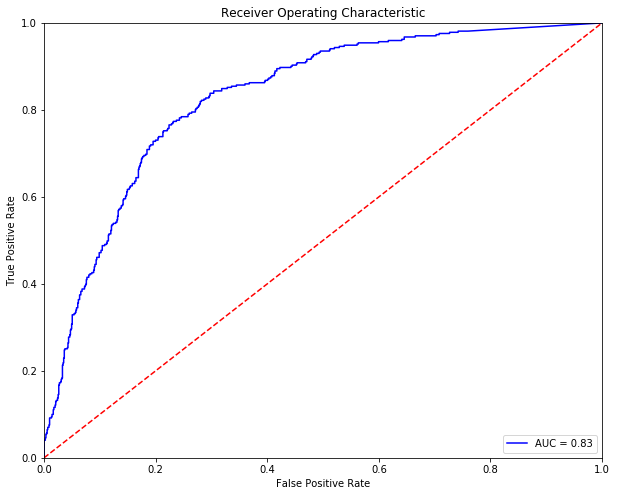

Optimal Threshold is 0.303244468179
Accuracy on test data is: 0.769890795632


Predicted  0.0  1.0  __all__
Actual                      
0.0        702  209      911
1.0         86  285      371
__all__    788  494     1282

In [257]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [258]:
table_80_70_PCA_0_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_0_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_0_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [259]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.7        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.778276131045

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2837   739     3576
1           398  1154     1552
__all__    3235  1893     5128

Accuracy of the  Logistic  model for test data is: 0.787051482059

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          725  186      911
1           87  284      371
__all__    812  470     1282

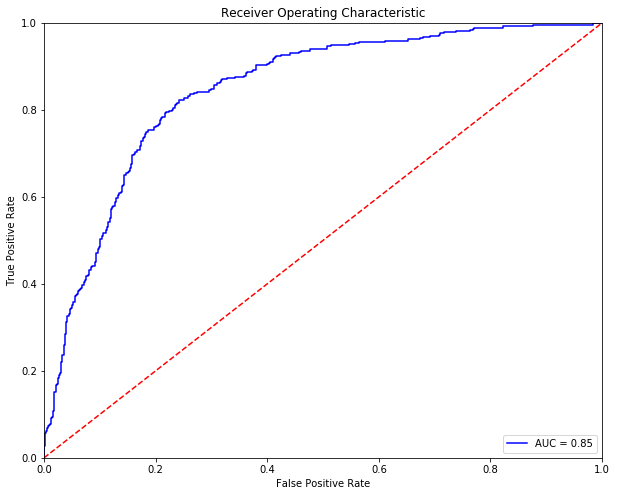

Optimal Threshold is 0.4875553483
Accuracy on test data is: 0.784711388456


Predicted  0.0  1.0  __all__
Actual                      
0.0        715  196      911
1.0         80  291      371
__all__    795  487     1282

In [260]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [261]:
table_80_70_PCA_0_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_0_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_0_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [262]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])

rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           100      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.697347893916

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          3576  0     3576
1          1552  0     1552
__all__    5128  0     5128

Accuracy of the  Random Forest Trees  model for test data is: 0.710608424337

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0           911  0      911
1           371  0      371
__all__    1282  0     1282

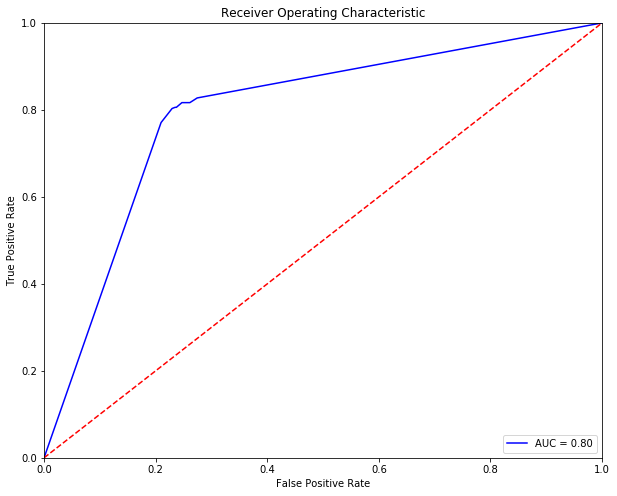

Optimal Threshold is 0.354906897275
Accuracy on test data is: 0.710608424337


Predicted   0.0  1.0  __all__
Actual                       
0.0         911    0      911
1.0         371    0      371
__all__    1282    0     1282

In [263]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [264]:
%%capture
table_80_70_PCA_0_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_0_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_0_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

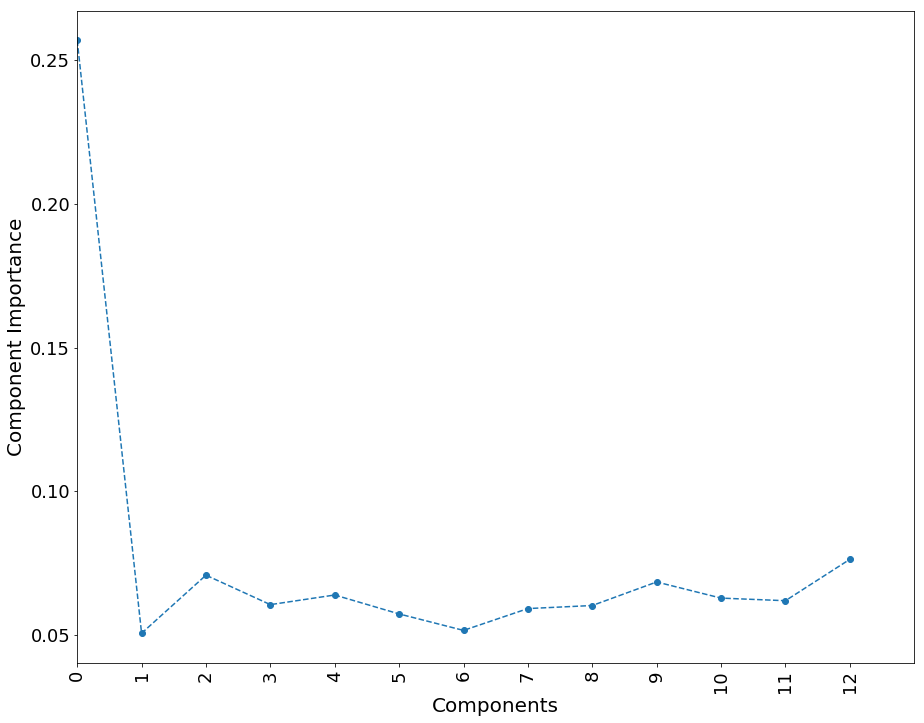

In [265]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [266]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5           150             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.803627145086

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3101   475     3576
1           532  1020     1552
__all__    3633  1495     5128

Accuracy of the  AdaBoostClassifier  model for test data is: 0.790951638066

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          784  127      911
1          141  230      371
__all__    925  357     1282

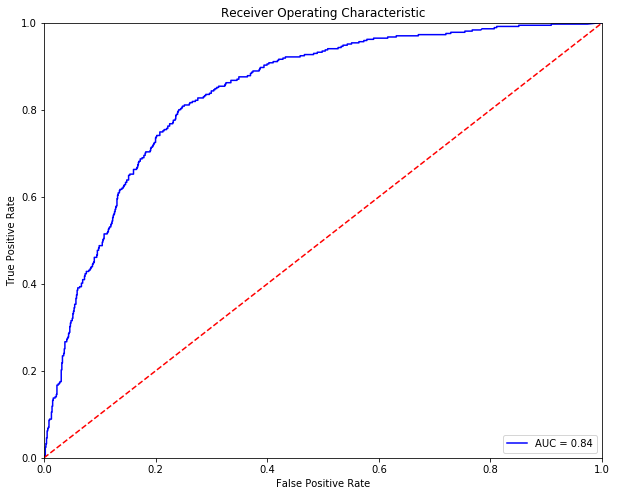

Optimal Threshold is 0.498016182507
Accuracy on test data is: 0.769890795632


Predicted  0.0  1.0  __all__
Actual                      
0.0        702  209      911
1.0         86  285      371
__all__    788  494     1282

In [267]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [268]:
table_80_70_PCA_0_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_0_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_0_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

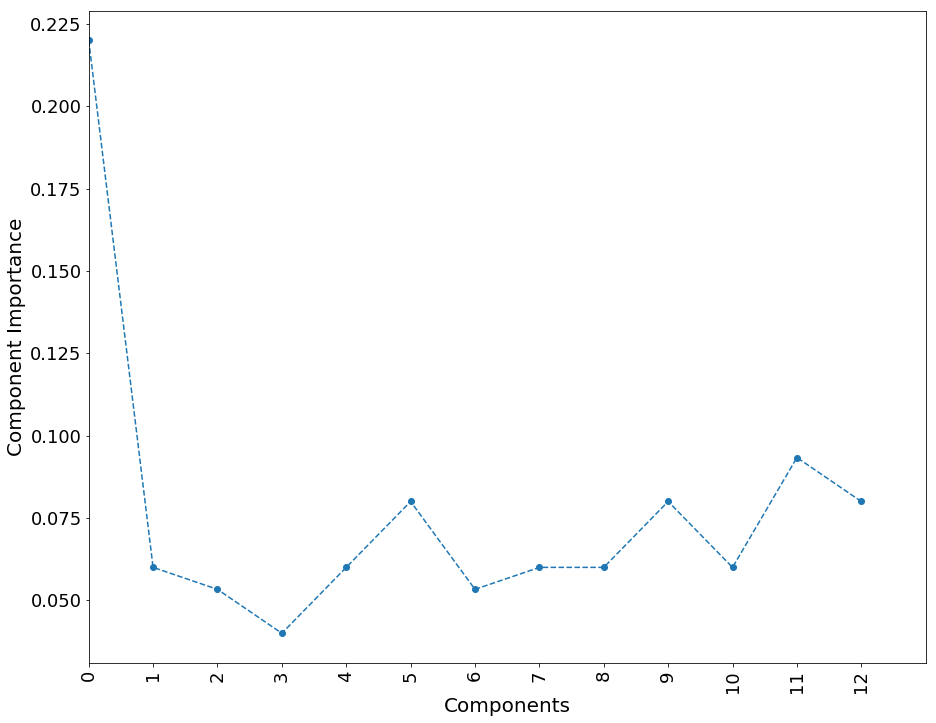

In [269]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [270]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse            0.2  exponential                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3            50             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.797971918877

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3092   484     3576
1           552  1000     1552
__all__    3644  1484     5128

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.794071762871

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          782  129      911
1          135  236      371
__all__    917  365     1282

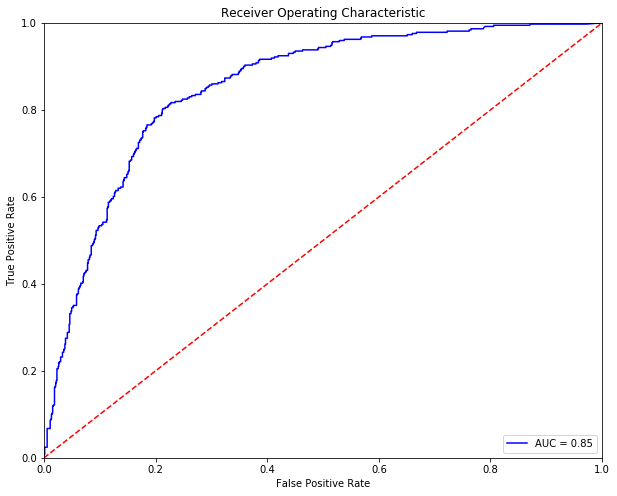

Optimal Threshold is 0.37413680689
Accuracy on test data is: 0.789391575663


Predicted  0.0  1.0  __all__
Actual                      
0.0        720  191      911
1.0         79  292      371
__all__    799  483     1282

In [271]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [272]:
table_80_70_PCA_0_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_0_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_0_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

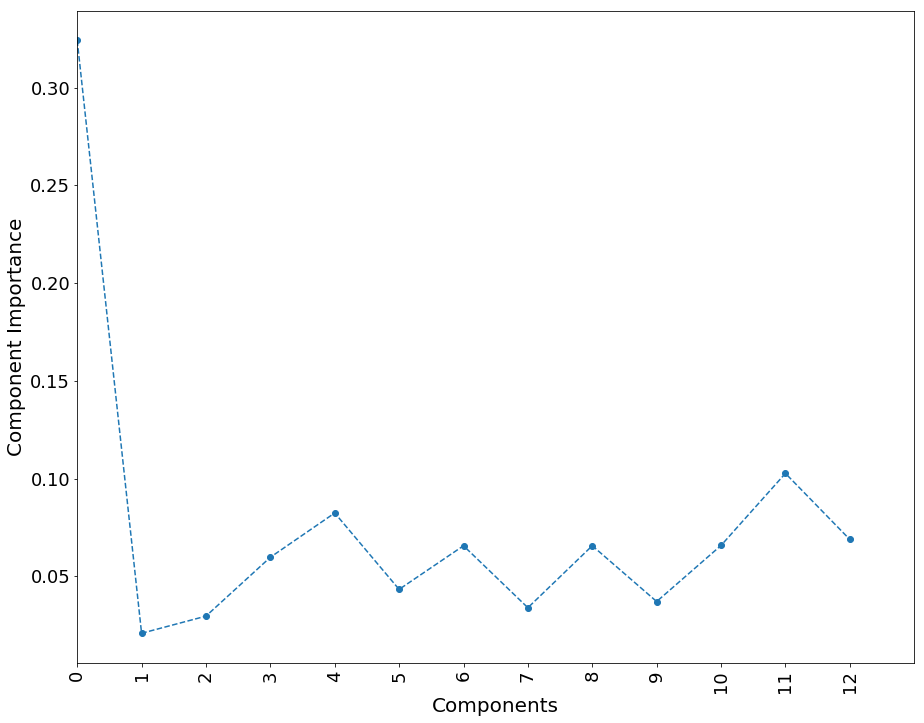

In [273]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [274]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.792511700468

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3048   528     3576
1           536  1016     1552
__all__    3584  1544     5128

Accuracy of the  Extra Decision Tree  model for test data is: 0.788611544462

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          773  138      911
1          133  238      371
__all__    906  376     1282

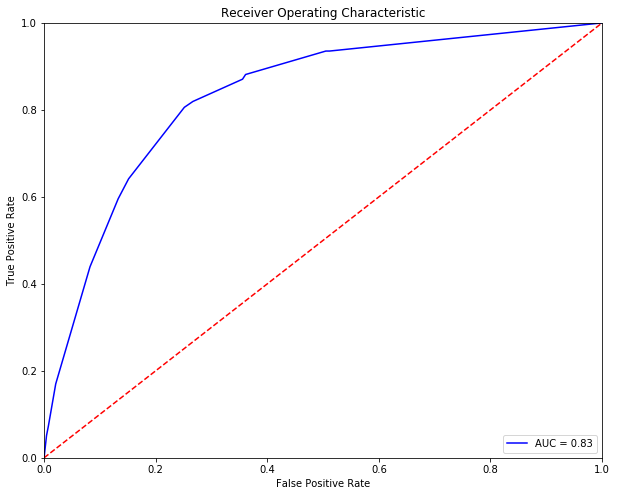

Optimal Threshold is 0.39219330855
Accuracy on test data is: 0.788611544462


Predicted  0.0  1.0  __all__
Actual                      
0.0        773  138      911
1.0        133  238      371
__all__    906  376     1282

In [275]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [276]:
table_80_70_PCA_0_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_0_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [277]:
%%capture
table_80_70_PCA_0_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

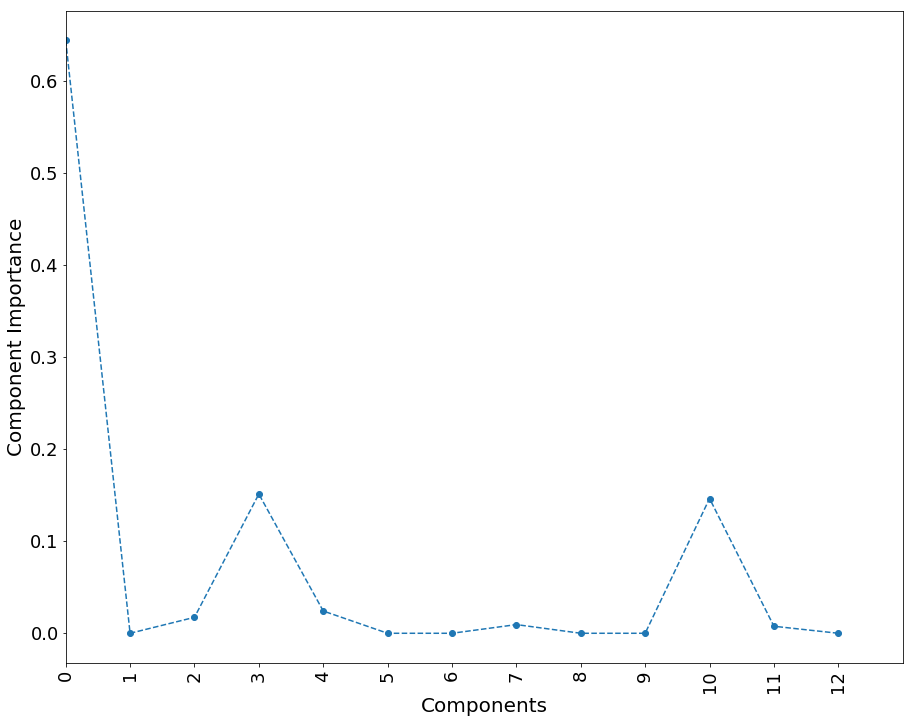

In [278]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [279]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[300,100], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.6           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.992394695788

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3576     0     3576
1            39  1513     1552
__all__    3615  1513     5128

Accuracy of the  Bagging  model for test data is: 0.787051482059

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          795  116      911
1          157  214      371
__all__    952  330     1282

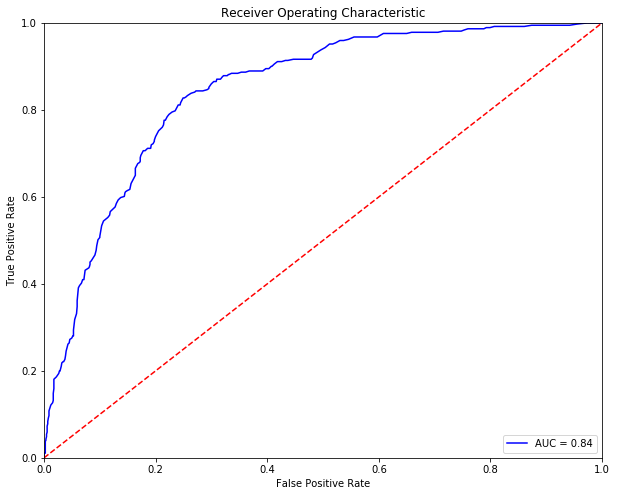

Optimal Threshold is 0.383333333333
Accuracy on test data is: 0.780811232449


Predicted  0.0  1.0  __all__
Actual                      
0.0        713  198      911
1.0         83  288      371
__all__    796  486     1282

In [280]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [281]:
table_80_70_PCA_0_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_0_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_0_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [282]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.971528861154


Predicted     0     1  __all__
Actual                        
0          3560    16     3576
1           130  1422     1552
__all__    3690  1438     5128

The test accuracy is: 0.785491419657


Predicted    0    1  __all__
Actual                      
0          786  125      911
1          150  221      371
__all__    936  346     1282

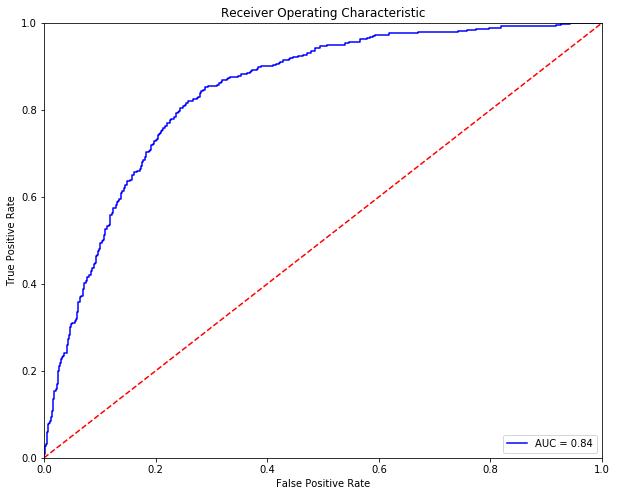

Optimal Threshold is 0.376029446575
Accuracy on test data is: 0.774570982839


Predicted  0.0  1.0  __all__
Actual                      
0.0        706  205      911
1.0         84  287      371
__all__    790  492     1282

In [283]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [284]:
table_80_70_PCA_0_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_0_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_0_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [285]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.86251950078


Predicted     0     1  __all__
Actual                        
0          3349   227     3576
1           478  1074     1552
__all__    3827  1301     5128

The accuracy of the model on test data is: 0.776911076443


Predicted    0    1  __all__
Actual                      
0          789  122      911
1          164  207      371
__all__    953  329     1282

1024/1282 [======================>.......] - ETA: 0s

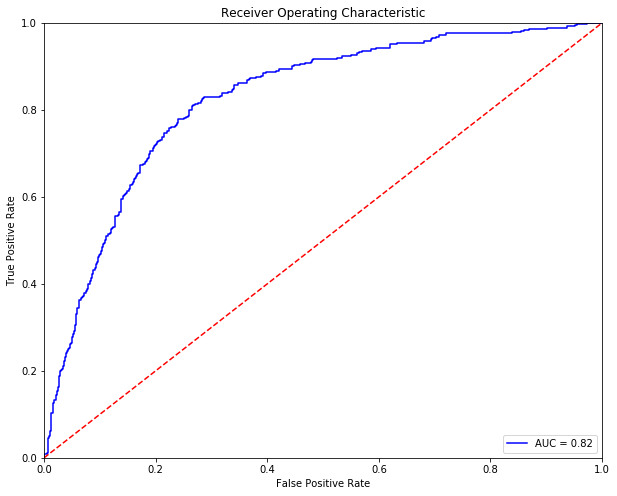

Optimal Threshold is 0.285821
Accuracy of Logistic Model on training data is: 0.763650546022


Predicted  0.0  1.0  __all__
Actual                      
0.0        696  215      911
1.0         88  283      371
__all__    784  498     1282

In [286]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [287]:
table_80_70_PCA_0_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_0_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_0_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [288]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.8min finished


The accuracy of the model on training data is: 0.799141965679


Predicted     0     1  __all__
Actual                        
0          3076   500     3576
1           530  1022     1552
__all__    3606  1522     5128

The accuracy of the model on test data is: 0.801092043682


Predicted    0    1  __all__
Actual                      
0          779  132      911
1          123  248      371
__all__    902  380     1282

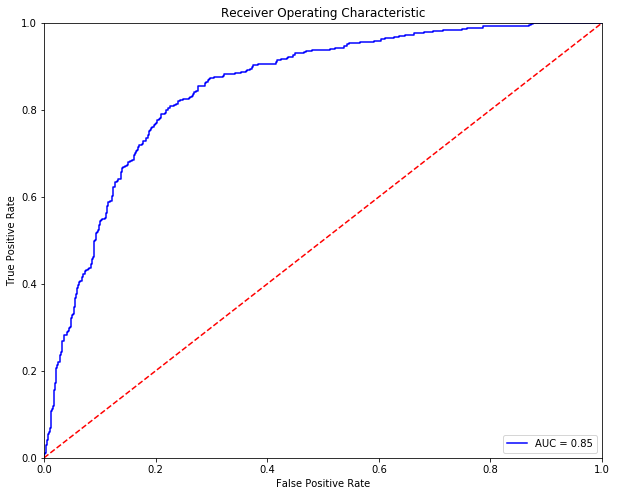

Optimal Threshold is 0.368264
Accuracy on test data is: 0.789391575663


Predicted  0.0  1.0  __all__
Actual                      
0.0        720  191      911
1.0         79  292      371
__all__    799  483     1282

In [289]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [290]:
table_80_70_PCA_0_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_0_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_0_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [291]:
table_80_70_PCA_0_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_PCA_0_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_PCA_0_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_70_PCA_0_test.set_index(['index'],drop=True,inplace=True)
table_80_70_PCA_0_train.set_index(['index'],drop=True,inplace=True)
table_80_70_PCA_0_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_70_PCA_0_train)

print("Comparision Table for Test Accuracies:")
display(table_80_70_PCA_0_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_70_PCA_0_test_roc)

Comparision Table for Training Accuracies:


accuracy           TP           TN           FP  \
index                                                                         
KNeighborsClassifier        1.000000  1552.000000  3576.000000     0.000000   
LogisticRegression          0.778276  1154.000000  2837.000000   739.000000   
RandomForestClassifier      0.697348  2493.716069  1082.283931  1082.283931   
AdaBoostClassifier          0.803627  1020.000000  3101.000000   475.000000   
GradientBoostingClassifier  0.797972  1000.000000  3092.000000   484.000000   
ExtraTreeClassifier         0.792512  1016.000000  3048.000000   528.000000   
BaggingClassifier           0.992395  1513.000000  3576.000000     0.000000   
VotingClassifier            0.971529  1422.000000  3560.000000    16.000000   
Neural Network-1            0.862520  1074.000000  3349.000000   227.000000   
Neural-Network-2            0.799142  1022.000000  3076.000000   500.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier          0.000000  0.000000  0.000000  
LogisticRegression          398.000000  0.206655  0.256443  
RandomForestClassifier      469.716069  0.697348  0.302652  
AdaBoostClassifier          532.000000  0.132830  0.342784  
GradientBoostingClassifier  552.000000  0.135347  0.355670  
ExtraTreeClassifier         536.000000  0.147651  0.345361  
BaggingClassifier            39.000000  0.000000  0.025129  
VotingClassifier            130.000000  0.004474  0.083763  
Neural Network-1            478.000000  0.063479  0.307990  
Neural-Network-2            530.000000  0.139821  0.341495

Comparision Table for Test Accuracies:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.774571  187.000000  806.000000  105.000000   
LogisticRegression          0.787051  284.000000  725.000000  186.000000   
RandomForestClassifier      0.710608  647.364275  263.635725  263.635725   
AdaBoostClassifier          0.790952  230.000000  784.000000  127.000000   
GradientBoostingClassifier  0.794072  236.000000  782.000000  129.000000   
ExtraTreeClassifier         0.788612  238.000000  773.000000  138.000000   
BaggingClassifier           0.787051  214.000000  795.000000  116.000000   
VotingClassifier            0.785491  221.000000  786.000000  125.000000   
Neural Network-1            0.776911  207.000000  789.000000  122.000000   
Neural-Network-2            0.801092  248.000000  779.000000  132.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier        184.000000  0.115258  0.495957  
LogisticRegression           87.000000  0.204171  0.234501  
RandomForestClassifier      107.364275  0.710608  0.289392  
AdaBoostClassifier          141.000000  0.139407  0.380054  
GradientBoostingClassifier  135.000000  0.141603  0.363881  
ExtraTreeClassifier         133.000000  0.151482  0.358491  
BaggingClassifier           157.000000  0.127333  0.423181  
VotingClassifier            150.000000  0.137212  0.404313  
Neural Network-1            164.000000  0.133919  0.442049  
Neural-Network-2            123.000000  0.144896  0.331536

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.769891  285.000000  702.000000  209.000000   
LogisticRegression          0.784711  291.000000  715.000000  196.000000   
RandomForestClassifier      0.710608  647.364275  263.635725  263.635725   
AdaBoostClassifier          0.769891  285.000000  702.000000  209.000000   
GradientBoostingClassifier  0.789392  292.000000  720.000000  191.000000   
ExtraTreeClassifier         0.788612  238.000000  773.000000  138.000000   
BaggingClassifier           0.780811  288.000000  713.000000  198.000000   
VotingClassifier            0.774571  287.000000  706.000000  205.000000   
Neural Network-1            0.763651  283.000000  696.000000  215.000000   
Neural-Network-2            0.789392  292.000000  720.000000  191.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier         86.000000  0.229418  0.231806   0.303244   
LogisticRegression           80.000000  0.215148  0.215633   0.487555   
RandomForestClassifier      107.364275  0.710608  0.289392   0.354907   
AdaBoostClassifier           86.000000  0.229418  0.231806   0.498016   
GradientBoostingClassifier   79.000000  0.209660  0.212938   0.374137   
ExtraTreeClassifier         133.000000  0.151482  0.358491   0.392193   
BaggingClassifier            83.000000  0.217344  0.223720   0.383333   
VotingClassifier             84.000000  0.225027  0.226415   0.376029   
Neural Network-1             88.000000  0.236004  0.237197   0.285821   
Neural-Network-2             79.000000  0.209660  0.212938   0.368264   

                                 auc  
index                                 
KNeighborsClassifier        0.830560  
LogisticRegression          0.845657  
RandomForestClassifier      0.796040  
AdaBoostClassifier          0.839837  
GradientBoostingClassifier  0.852418  
ExtraTreeClassifier         0.832489  
BaggingClassifier           0.844880  
VotingClassifier            0.841103  
Neural Network-1            0.824088  
Neural-Network-2            0.851261

#### Random State 10

In [292]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_10.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  5164  438.195198   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  1347  462.677060   

                                                           PAS         LEN  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  231.486445  116.998644   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  125.536748   90.790646   

                                                             BYS  \
Source_User                                                        
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  25566.860767   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  13083.769859   

                                                              BYR      SP  \
Source_User                                                                 
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  578623.737026  4106.0   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  633355.270973  1269.0   

                                                      DP  NAPP  SIP   DIP  \
Source_User                                                                 
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  42.0    54   69  1296   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  14.0    38   39   396   

                                                           TDIF  0000  0100  \
Source_User                                                                   
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   952.221340   521   405   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  3335.414996    63    65   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   398   211   281   225   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...   145   123   147    56   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   163   170    68    59   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    61    73    32    19   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...    36    74    99   142   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    19     6    26    52   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   201   218   307   284   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    33   135    75    21   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   219   257   223   225   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    24    23    15    28   

                                                    2200  2300  
Source_User                                                     
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   173   205  
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    56    50

1 -> Infected
0 -> Uninfected


Source_User
23a784294c34545e19b709e6b22286bd5cfda913b32d55224d18437016ca9135    1
69881d3627335af7ed5613256f13b575318085c62d0a4eb30ef45663cdf794ef    0
4336978528c6a752e441b177d8222c6477449660ce0c772e567e6d7f32c7e896    0
6507f3f2e0c22751060868de62ee74aed8c0c37d331ab7ab39d0f9b17e8ef426    0
6944129302f4af2ade449b755a7cb0eace943209459b735222b74dbd369ed94e    0
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
9695f657a7d9b2c3202a6a25c401a660dd4fff43b396060141f23b9eefe1bed1    1
da1de679d352a2e7977a412053149f36d9e70e9bf3a059d44111774d3d8dd73f    0
4f663930f46b6dbf3e88f4a24101abb6ec2d202593d5042e26aebb10b705acf4    0
ded957eff469c307b079c16459b5caffca56d2ec1b3e36a05326c99daff1888e    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.903941813185
The train/test split ratio is 80:20


In [293]:
display(X_pca_13[0:1])

array([[ 1.29352247,  0.93920716,  0.01119081,  1.60494077, -0.4938955 ,
        -0.20049509,  0.72024192, -0.04724169,  0.37682372,  1.5386344 ,
        -0.79647324,  0.96888325, -2.3284312 ]])

In [294]:
## Table to store training and test measures
table_80_70_PCA_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_PCA_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_PCA_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [295]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3584     0     3584
1             0  1544     1544
__all__    3584  1544     5128

Accuracy of the  KNN  model for test data is: 0.758190327613

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0           803  100      903
1           210  169      379
__all__    1013  269     1282

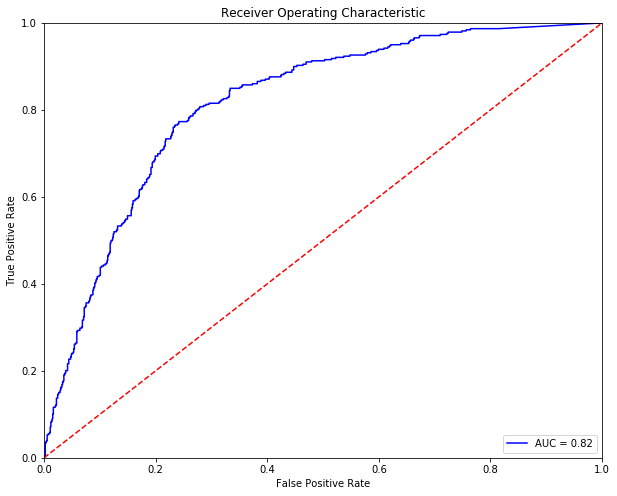

Optimal Threshold is 0.275732307406
Accuracy on test data is: 0.764430577223


Predicted  0.0  1.0  __all__
Actual                      
0.0        691  212      903
1.0         90  289      379
__all__    781  501     1282

In [296]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [297]:
table_80_70_PCA_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [298]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.7        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.779836193448

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2812   772     3584
1           357  1187     1544
__all__    3169  1959     5128

Accuracy of the  Logistic  model for test data is: 0.762090483619

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          695  208      903
1           97  282      379
__all__    792  490     1282

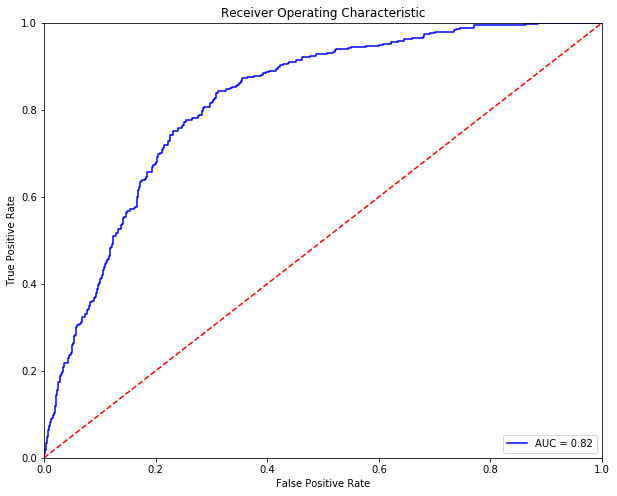

Optimal Threshold is 0.491617346029
Accuracy on test data is: 0.758190327613


Predicted  0.0  1.0  __all__
Actual                      
0.0        686  217      903
1.0         93  286      379
__all__    779  503     1282

In [299]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [300]:
table_80_70_PCA_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [301]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])

rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           100      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.698907956318

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          3584  0     3584
1          1544  0     1544
__all__    5128  0     5128

Accuracy of the  Random Forest Trees  model for test data is: 0.704368174727

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0           903  0      903
1           379  0      379
__all__    1282  0     1282

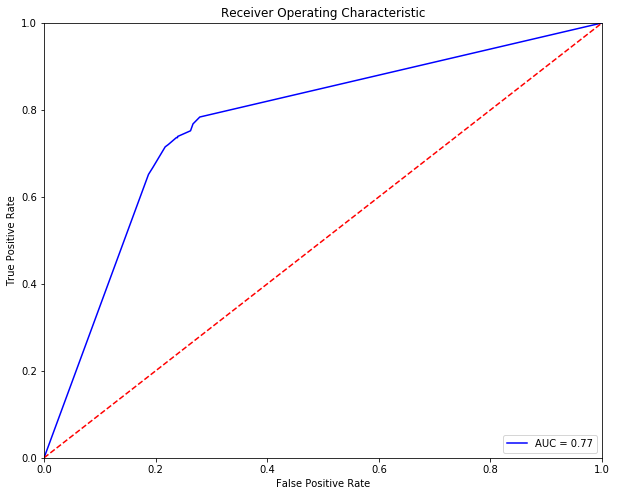

Optimal Threshold is 0.312340595814
Accuracy on test data is: 0.754290171607


Predicted  0.0  1.0  __all__
Actual                      
0.0        687  216      903
1.0         99  280      379
__all__    786  496     1282

In [302]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [303]:
%%capture
table_80_70_PCA_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

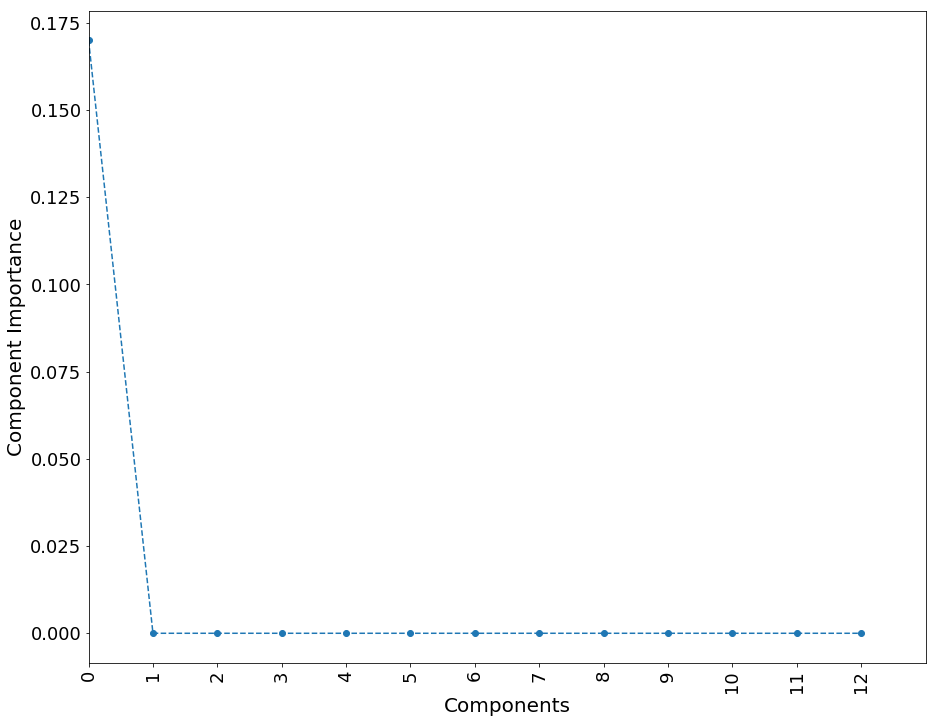

In [304]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [305]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.792121684867

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3080   504     3584
1           562   982     1544
__all__    3642  1486     5128

Accuracy of the  AdaBoostClassifier  model for test data is: 0.760530421217

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          749  154      903
1          153  226      379
__all__    902  380     1282

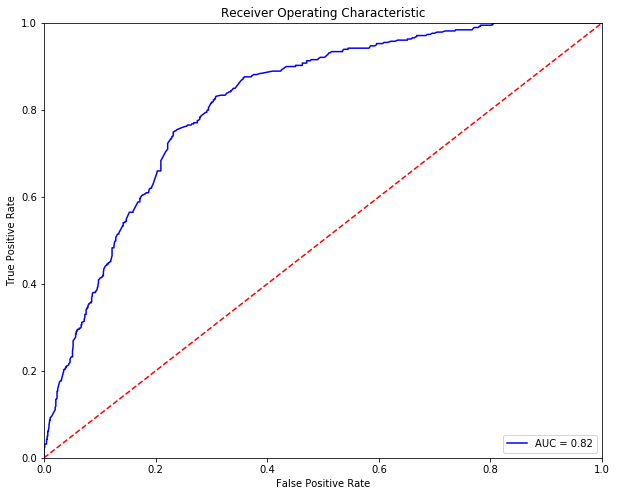

Optimal Threshold is 0.495776669503
Accuracy on test data is: 0.760530421217


Predicted  0.0  1.0  __all__
Actual                      
0.0        690  213      903
1.0         94  285      379
__all__    784  498     1282

In [306]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [307]:
table_80_70_PCA_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

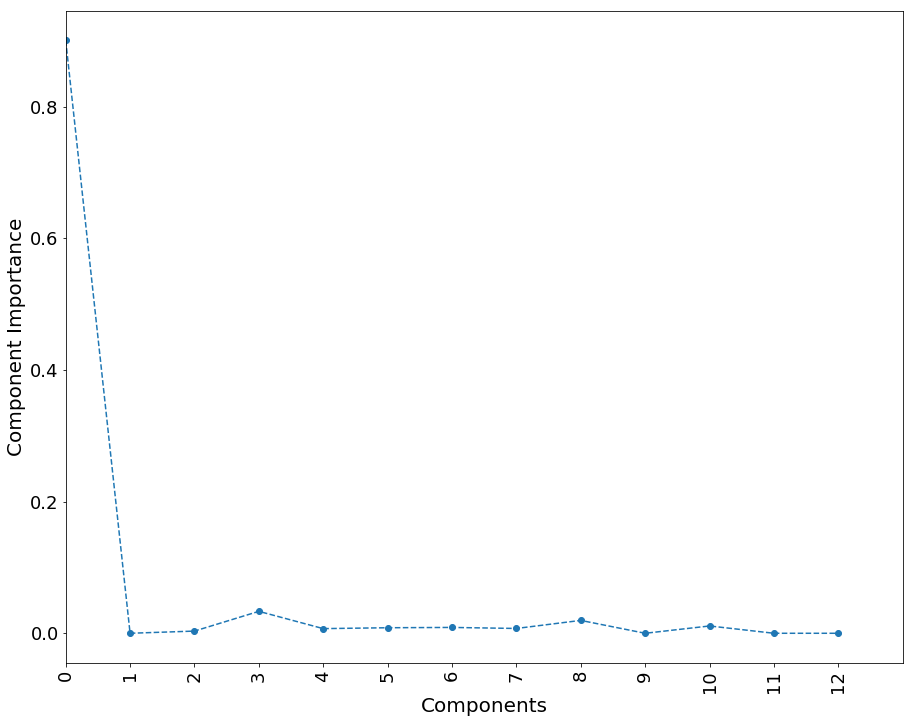

In [308]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [309]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1           100             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.802457098284

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3096   488     3584
1           525  1019     1544
__all__    3621  1507     5128

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.763650546022

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          747  156      903
1          147  232      379
__all__    894  388     1282

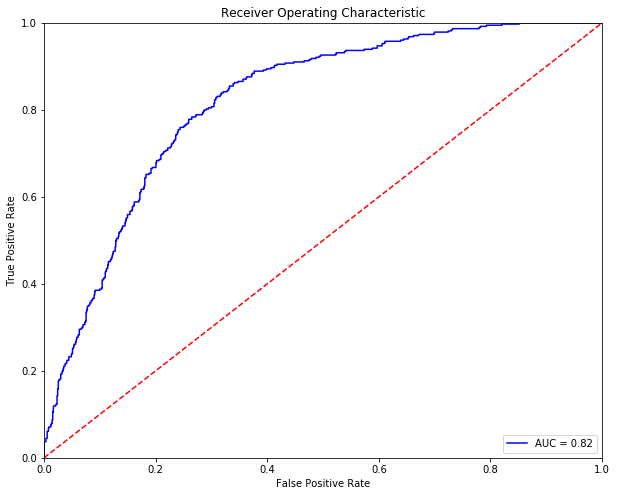

Optimal Threshold is 0.341947284977
Accuracy on test data is: 0.756630265211


Predicted  0.0  1.0  __all__
Actual                      
0.0        684  219      903
1.0         93  286      379
__all__    777  505     1282

In [310]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [311]:
table_80_70_PCA_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

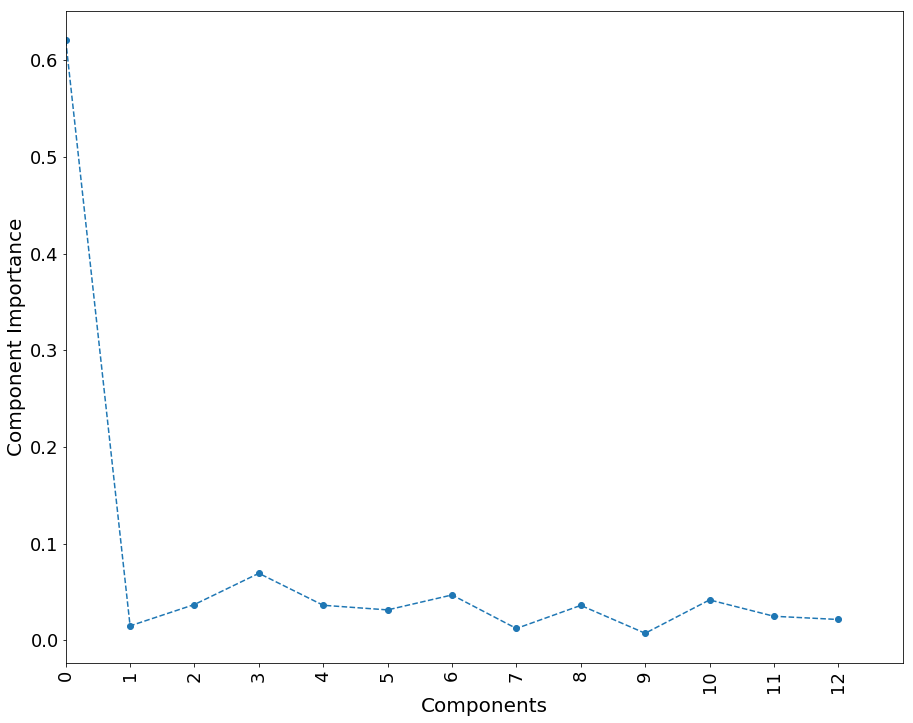

In [312]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [313]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.810062402496

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3160   424     3584
1           550   994     1544
__all__    3710  1418     5128

Accuracy of the  Extra Decision Tree  model for test data is: 0.748049921997

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          753  150      903
1          173  206      379
__all__    926  356     1282

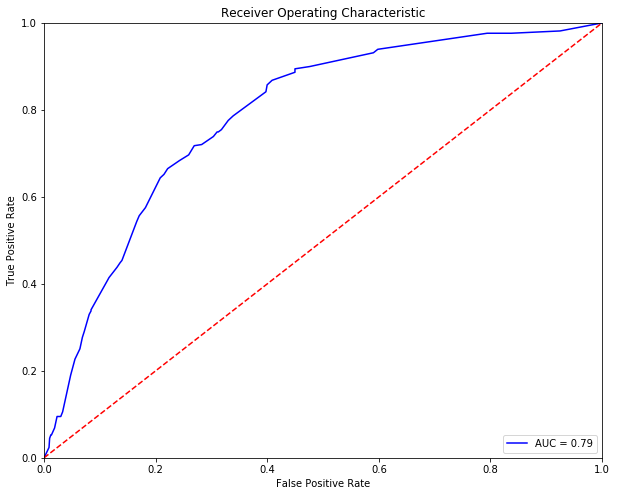

Optimal Threshold is 0.3125
Accuracy on test data is: 0.726989079563


Predicted  0.0  1.0  __all__
Actual                      
0.0        660  243      903
1.0        107  272      379
__all__    767  515     1282

In [314]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [315]:
table_80_70_PCA_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [316]:
%%capture
table_80_70_PCA_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

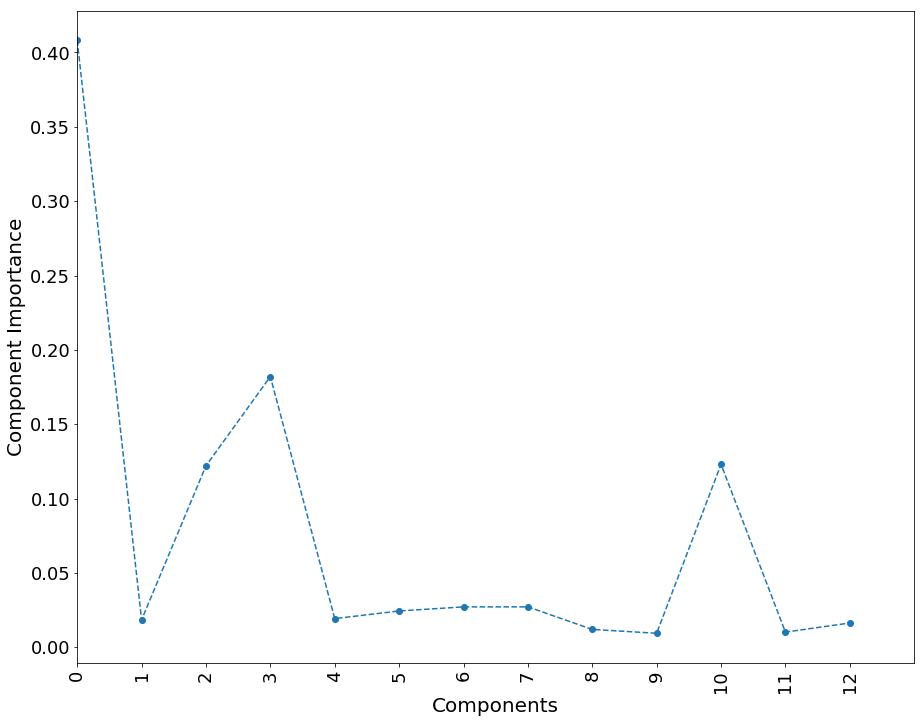

In [317]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [318]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[300,100], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.6           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.990834633385

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3584     0     3584
1            47  1497     1544
__all__    3631  1497     5128

Accuracy of the  Bagging  model for test data is: 0.748049921997

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          764  139      903
1          184  195      379
__all__    948  334     1282

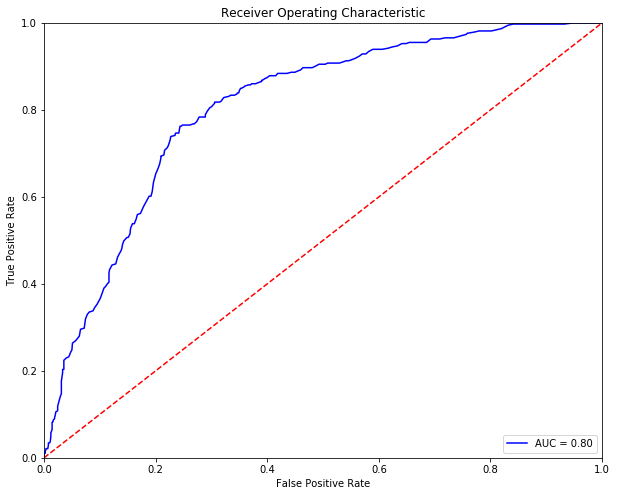

Optimal Threshold is 0.38
Accuracy on test data is: 0.756630265211


Predicted  0.0  1.0  __all__
Actual                      
0.0        684  219      903
1.0         93  286      379
__all__    777  505     1282

In [319]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [320]:
table_80_70_PCA_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [321]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.942667706708


Predicted     0     1  __all__
Actual                        
0          3570    14     3584
1           280  1264     1544
__all__    3850  1278     5128

The test accuracy is: 0.749609984399


Predicted    0    1  __all__
Actual                      
0          783  120      903
1          201  178      379
__all__    984  298     1282

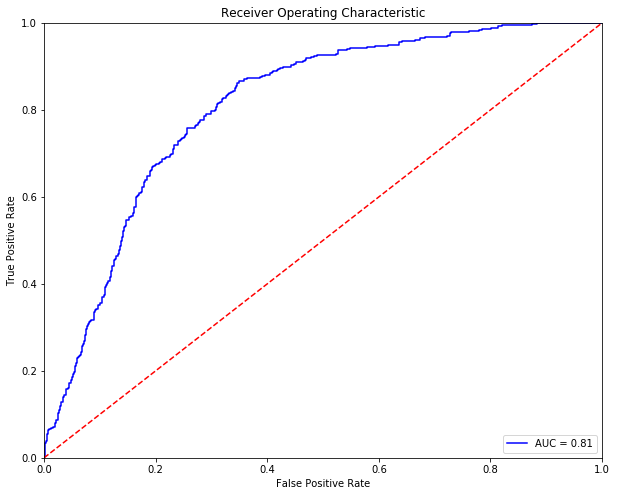

Optimal Threshold is 0.350863015975
Accuracy on test data is: 0.744929797192


Predicted  0.0  1.0  __all__
Actual                      
0.0        673  230      903
1.0         97  282      379
__all__    770  512     1282

In [322]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [323]:
table_80_70_PCA_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [324]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.861739469579


Predicted     0     1  __all__
Actual                        
0          3247   337     3584
1           372  1172     1544
__all__    3619  1509     5128

The accuracy of the model on test data is: 0.767550702028


Predicted    0    1  __all__
Actual                      
0          762  141      903
1          157  222      379
__all__    919  363     1282

 896/1282 [===================>..........] - ETA: 0s

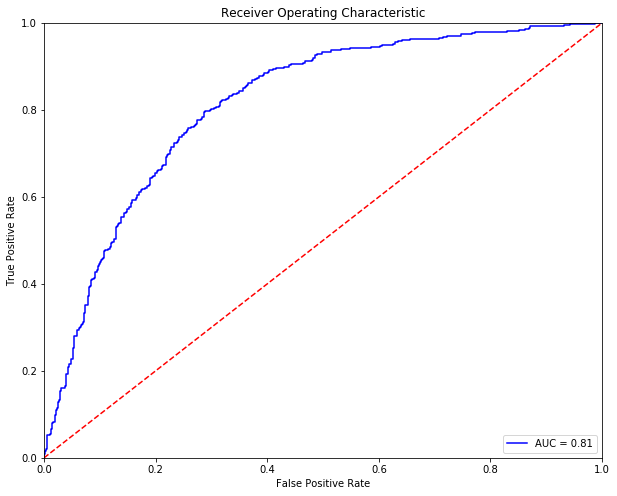

Optimal Threshold is 0.32149
Accuracy of Logistic Model on training data is: 0.747269890796


Predicted  0.0  1.0  __all__
Actual                      
0.0        675  228      903
1.0         96  283      379
__all__    771  511     1282

In [325]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [326]:
table_80_70_PCA_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [327]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.3min finished


The accuracy of the model on training data is: 0.79972698908


Predicted     0     1  __all__
Actual                        
0          2972   612     3584
1           415  1129     1544
__all__    3387  1741     5128

The accuracy of the model on test data is: 0.772230889236


Predicted    0    1  __all__
Actual                      
0          729  174      903
1          118  261      379
__all__    847  435     1282

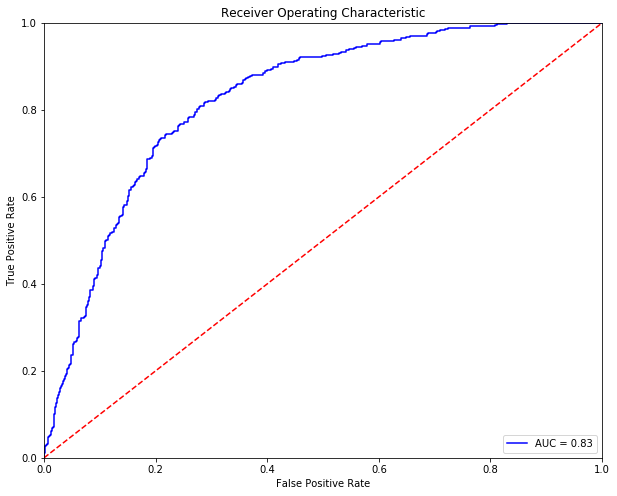

Optimal Threshold is 0.35308
Accuracy on test data is: 0.759750390016


Predicted  0.0  1.0  __all__
Actual                      
0.0        686  217      903
1.0         91  288      379
__all__    777  505     1282

In [328]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [329]:
table_80_70_PCA_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [330]:
table_80_70_PCA_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_PCA_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_PCA_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_70_PCA_10_test.set_index(['index'],drop=True,inplace=True)
table_80_70_PCA_10_train.set_index(['index'],drop=True,inplace=True)
table_80_70_PCA_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_70_PCA_10_train)

print("Comparision Table for Test Accuracies:")
display(table_80_70_PCA_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_70_PCA_10_test_roc)

Comparision Table for Training Accuracies:


accuracy           TP           TN           FP  \
index                                                                         
KNeighborsClassifier        1.000000  1544.000000  3584.000000     0.000000   
LogisticRegression          0.779836  1187.000000  2812.000000   772.000000   
RandomForestClassifier      0.698908  2504.886115  1079.113885  1079.113885   
AdaBoostClassifier          0.792122   982.000000  3080.000000   504.000000   
GradientBoostingClassifier  0.802457  1019.000000  3096.000000   488.000000   
ExtraTreeClassifier         0.810062   994.000000  3160.000000   424.000000   
BaggingClassifier           0.990835  1497.000000  3584.000000     0.000000   
VotingClassifier            0.942668  1264.000000  3570.000000    14.000000   
Neural Network-1            0.861739  1172.000000  3247.000000   337.000000   
Neural-Network-2            0.799727  1129.000000  2972.000000   612.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier          0.000000  0.000000  0.000000  
LogisticRegression          357.000000  0.215402  0.231218  
RandomForestClassifier      464.886115  0.698908  0.301092  
AdaBoostClassifier          562.000000  0.140625  0.363990  
GradientBoostingClassifier  525.000000  0.136161  0.340026  
ExtraTreeClassifier         550.000000  0.118304  0.356218  
BaggingClassifier            47.000000  0.000000  0.030440  
VotingClassifier            280.000000  0.003906  0.181347  
Neural Network-1            372.000000  0.094029  0.240933  
Neural-Network-2            415.000000  0.170759  0.268782

Comparision Table for Test Accuracies:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.758190  169.000000  803.000000  100.000000   
LogisticRegression          0.762090  282.000000  695.000000  208.000000   
RandomForestClassifier      0.704368  636.044462  266.955538  266.955538   
AdaBoostClassifier          0.760530  226.000000  749.000000  154.000000   
GradientBoostingClassifier  0.763651  232.000000  747.000000  156.000000   
ExtraTreeClassifier         0.748050  206.000000  753.000000  150.000000   
BaggingClassifier           0.748050  195.000000  764.000000  139.000000   
VotingClassifier            0.749610  178.000000  783.000000  120.000000   
Neural Network-1            0.767551  222.000000  762.000000  141.000000   
Neural-Network-2            0.772231  261.000000  729.000000  174.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier        210.000000  0.110742  0.554090  
LogisticRegression           97.000000  0.230343  0.255937  
RandomForestClassifier      112.044462  0.704368  0.295632  
AdaBoostClassifier          153.000000  0.170543  0.403694  
GradientBoostingClassifier  147.000000  0.172757  0.387863  
ExtraTreeClassifier         173.000000  0.166113  0.456464  
BaggingClassifier           184.000000  0.153931  0.485488  
VotingClassifier            201.000000  0.132890  0.530343  
Neural Network-1            157.000000  0.156146  0.414248  
Neural-Network-2            118.000000  0.192691  0.311346

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.764431  289.0  691.0  212.0   90.0  0.234773   
LogisticRegression          0.758190  286.0  686.0  217.0   93.0  0.240310   
RandomForestClassifier      0.754290  280.0  687.0  216.0   99.0  0.239203   
AdaBoostClassifier          0.760530  285.0  690.0  213.0   94.0  0.235880   
GradientBoostingClassifier  0.756630  286.0  684.0  219.0   93.0  0.242525   
ExtraTreeClassifier         0.726989  272.0  660.0  243.0  107.0  0.269103   
BaggingClassifier           0.756630  286.0  684.0  219.0   93.0  0.242525   
VotingClassifier            0.744930  282.0  673.0  230.0   97.0  0.254707   
Neural Network-1            0.747270  283.0  675.0  228.0   96.0  0.252492   
Neural-Network-2            0.759750  288.0  686.0  217.0   91.0  0.240310   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.237467   0.275732  0.815039  
LogisticRegression          0.245383   0.491617  0.821381  
RandomForestClassifier      0.261214   0.312341  0.770589  
AdaBoostClassifier          0.248021   0.495777  0.817670  
GradientBoostingClassifier  0.245383   0.341947  0.818773  
ExtraTreeClassifier         0.282322   0.312500  0.786369  
BaggingClassifier           0.245383   0.380000  0.804700  
VotingClassifier            0.255937   0.350863  0.807984  
Neural Network-1            0.253298   0.321490  0.813369  
Neural-Network-2            0.240106   0.353080  0.825875

#### Random State 20

In [331]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_20.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  1580  297.743038   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  2071   92.849831   

                                                           PAS        LEN  \
Source_User                                                                 
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  121.938608  75.572152   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   68.084500  85.015451   

                                                             BYS  \
Source_User                                                        
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  10785.806962   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   9264.509416   

                                                              BYR      SP  \
Source_User                                                                 
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  373515.271519  1513.0   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  113797.491067  1908.0   

                                                      DP  NAPP  SIP  DIP  \
Source_User                                                                
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  12.0    30   34  415   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  18.0    44   58  538   

                                                           TDIF  0000  0100  \
Source_User                                                                   
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  2816.703797    18    34   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  2378.489136   200   135   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    54    15    18    46   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    60    81    56   117   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    81    30    43    44   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    50    80   174    78   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    47    92    79    47   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   145    77    57    41   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    56    60    40   119   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    41    49    29    66   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    88   127   191   167   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    37    72    45   122   

                                                    2200  2300  
Source_User                                                     
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    45    39  
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    68   191

1 -> Infected
0 -> Uninfected


Source_User
73592328e1aba504b315fc06ce72a444a3afa3ca071ce135c6519b653b782900    0
5393c0df6a44651953827b1afab0c1c821dbdc352b1b88263f9d325b00bf1b7d    0
20e2144674cba74b4658c48eb02e290912cdf7d9815e9f0a8913e8f253d40b3c    0
0a8a122a1d0a74f656a8c288853357fe1e8ee2681f2308f75b9217f8dd73489d    0
e39c9093096a6ba89ad4d2e3987b430f8f6f8a86a6e73fc80bf4b5e0408e0edd    0
c82e979deebbc9c33760931128b2552d94d73128806ee7f3ebe1bdd3f7ca5c21    0
de1af22a9df53353a6f2c79696966a215a429a47150cd06de7b4f39b2f8e9976    0
a4a89c63ce9691738b6b014ae723928e73b2bc57ddb4bce98beb47cdce1ab45e    0
d8ccad69e30b55cf1048301d2fb7cd696a0ecab46a80e73f992ac427cd241e77    0
b7826c03e71919e65e0236c1bb7fb63e1de351fbc74c65b9ddb5cfe7c19881b0    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.97709676314
The train/test split ratio is 80:20


In [332]:
display(X_pca_13[0:1])

array([[-0.03999358, -0.01754298, -0.00368504,  0.08002672, -0.20700933,
         0.12087721,  0.22427239,  0.50013178, -0.41189911, -0.04990236,
         0.11457435,  0.52438326, -0.80044724]])

In [333]:
## Table to store training and test measures
table_80_70_PCA_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_PCA_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_PCA_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [334]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3591     0     3591
1             0  1537     1537
__all__    3591  1537     5128

Accuracy of the  KNN  model for test data is: 0.783151326053

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          782  114      896
1          164  222      386
__all__    946  336     1282

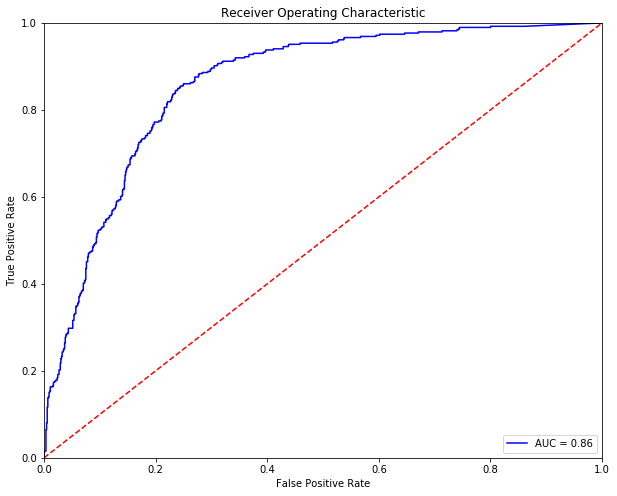

Optimal Threshold is 0.337930664503
Accuracy on test data is: 0.787051482059


Predicted  0.0  1.0  __all__
Actual                      
0.0        706  190      896
1.0         83  303      386
__all__    789  493     1282

In [335]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [336]:
table_80_70_PCA_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [337]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05

Accuracy of the  Logistic  model for the training data is: 0.782371294852

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2891   700     3591
1           416  1121     1537
__all__    3307  1821     5128

Accuracy of the  Logistic  model for test data is: 0.794071762871

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          724  172      896
1           92  294      386
__all__    816  466     1282

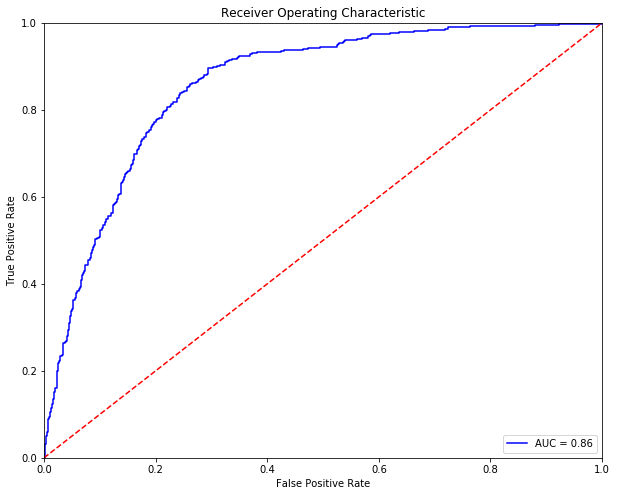

Optimal Threshold is 0.486216363808
Accuracy on test data is: 0.787051482059


Predicted  0.0  1.0  __all__
Actual                      
0.0        706  190      896
1.0         83  303      386
__all__    789  493     1282

In [338]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [339]:
table_80_70_PCA_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [340]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])

rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           100      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.70027301092

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          3591  0     3591
1          1537  0     1537
__all__    5128  0     5128

Accuracy of the  Random Forest Trees  model for test data is: 0.698907956318

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0           896  0      896
1           386  0      386
__all__    1282  0     1282

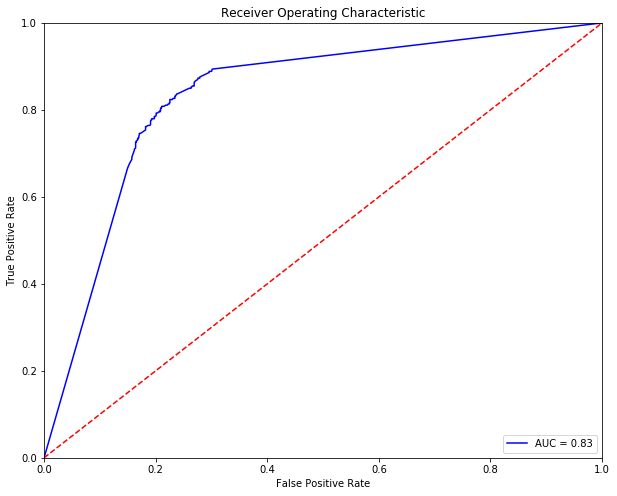

Optimal Threshold is 0.364598204188
Accuracy on test data is: 0.795631825273


Predicted  0.0  1.0  __all__
Actual                      
0.0        714  182      896
1.0         80  306      386
__all__    794  488     1282

In [341]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [342]:
%%capture
table_80_70_PCA_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

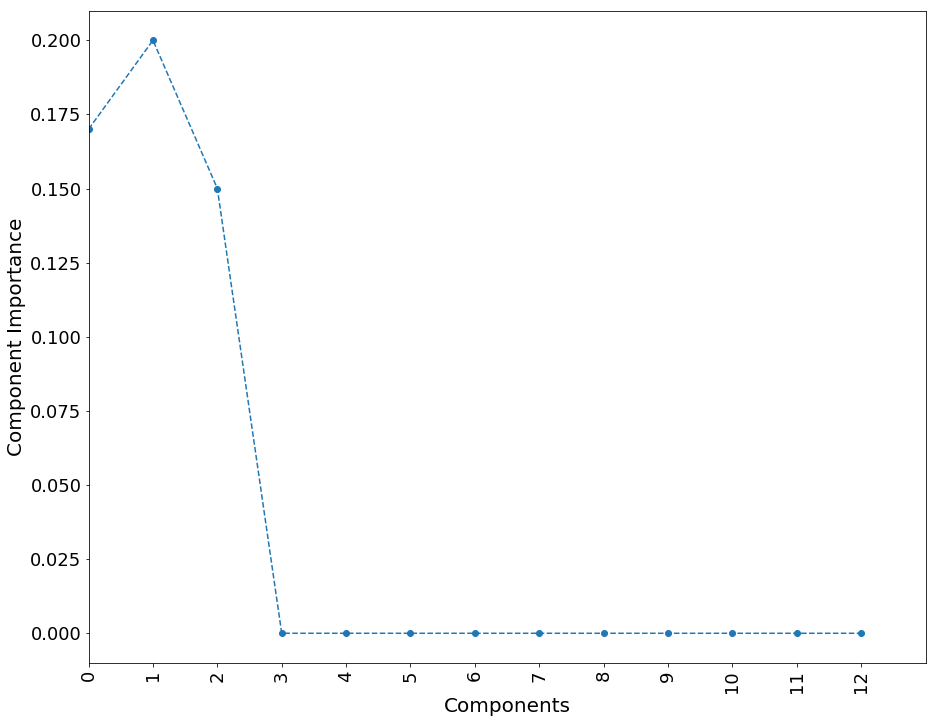

In [343]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [344]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.788611544462

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3015   576     3591
1           508  1029     1537
__all__    3523  1605     5128

Accuracy of the  AdaBoostClassifier  model for test data is: 0.787831513261

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          747  149      896
1          123  263      386
__all__    870  412     1282

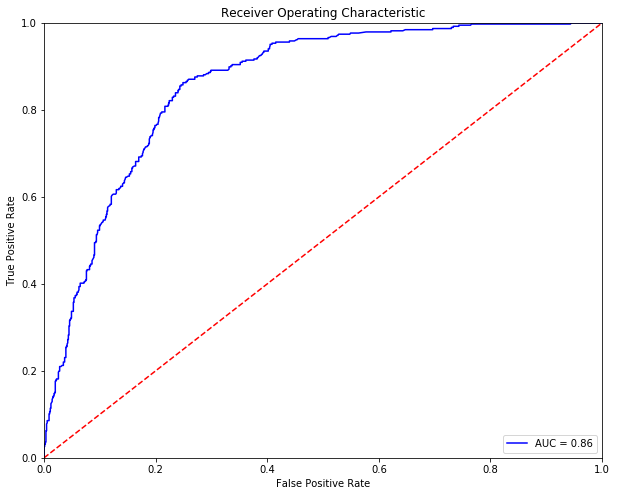

Optimal Threshold is 0.496011001057
Accuracy on test data is: 0.790951638066


Predicted  0.0  1.0  __all__
Actual                      
0.0        710  186      896
1.0         82  304      386
__all__    792  490     1282

In [345]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [346]:
table_80_70_PCA_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

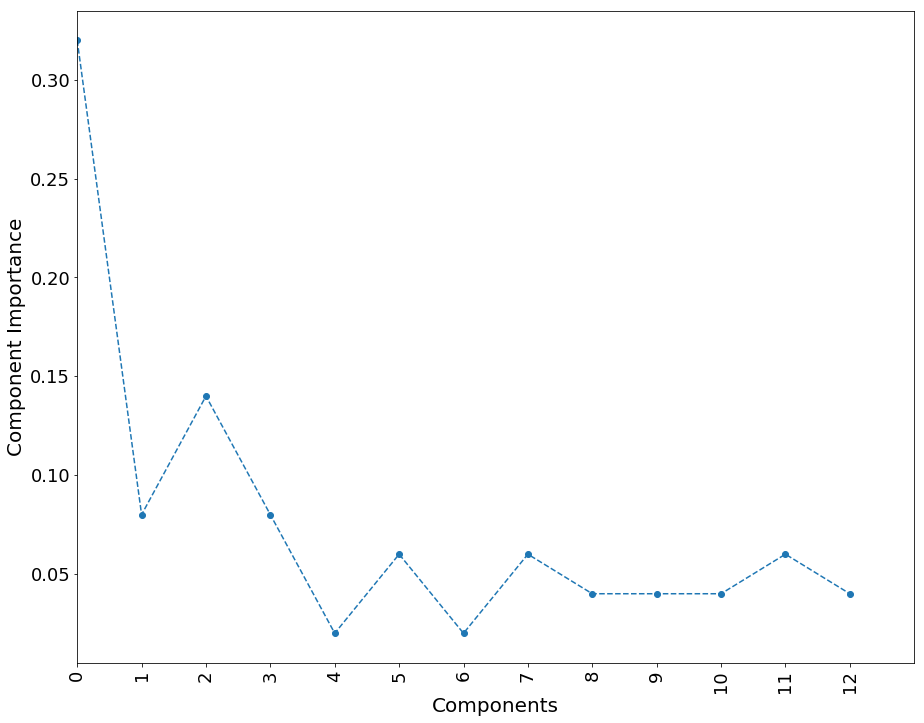

In [347]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [348]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.788611544462

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3032   559     3591
1           525  1012     1537
__all__    3557  1571     5128

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.794071762871

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          756  140      896
1          124  262      386
__all__    880  402     1282

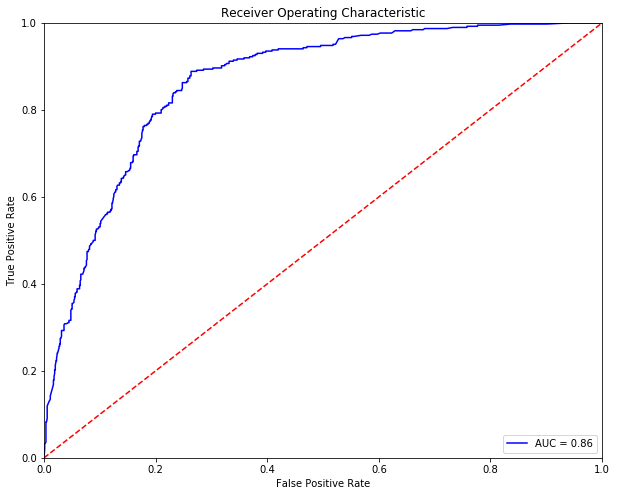

Optimal Threshold is 0.368106168522
Accuracy on test data is: 0.794851794072


Predicted  0.0  1.0  __all__
Actual                      
0.0        713  183      896
1.0         80  306      386
__all__    793  489     1282

In [349]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [350]:
table_80_70_PCA_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

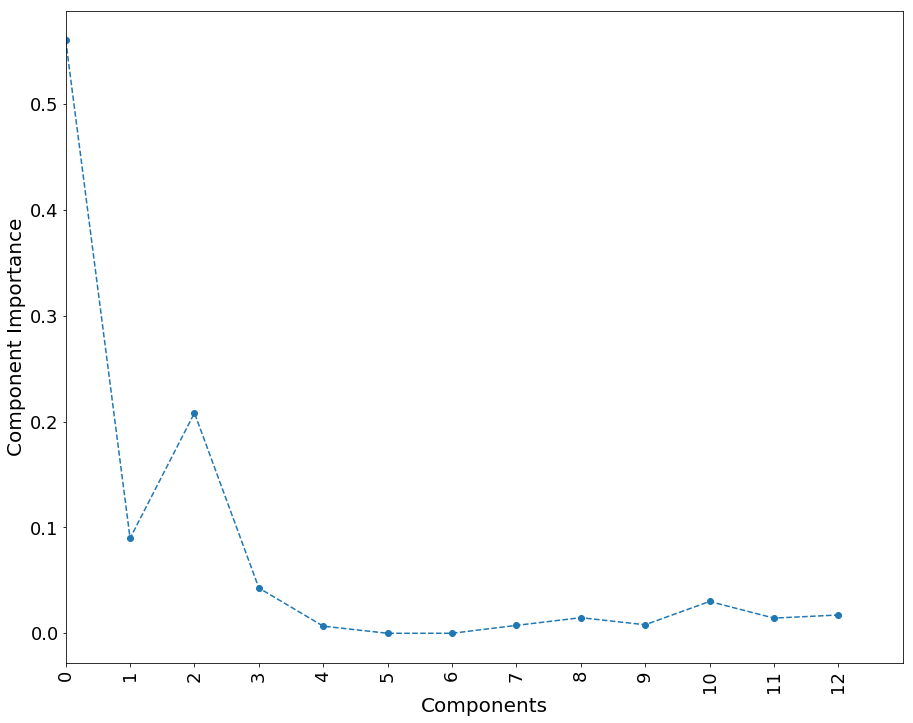

In [351]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [352]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.786661466459

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3131   460     3591
1           634   903     1537
__all__    3765  1363     5128

Accuracy of the  Extra Decision Tree  model for test data is: 0.789391575663

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          781  115      896
1          155  231      386
__all__    936  346     1282

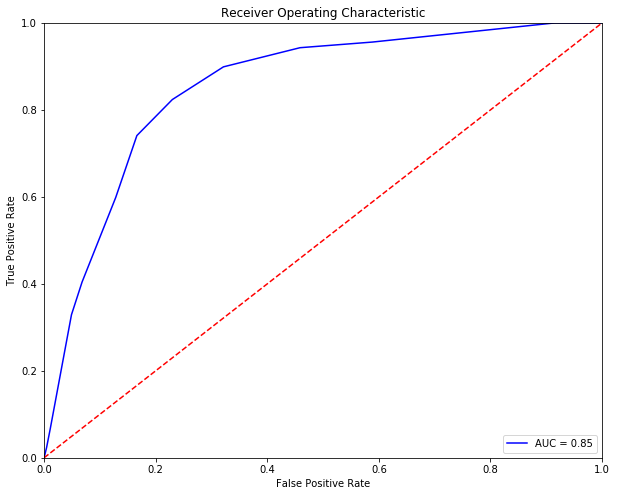

Optimal Threshold is 0.370757180157
Accuracy on test data is: 0.805772230889


Predicted  0.0  1.0  __all__
Actual                      
0.0        747  149      896
1.0        100  286      386
__all__    847  435     1282

In [353]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [354]:
table_80_70_PCA_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [355]:
%%capture
table_80_70_PCA_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

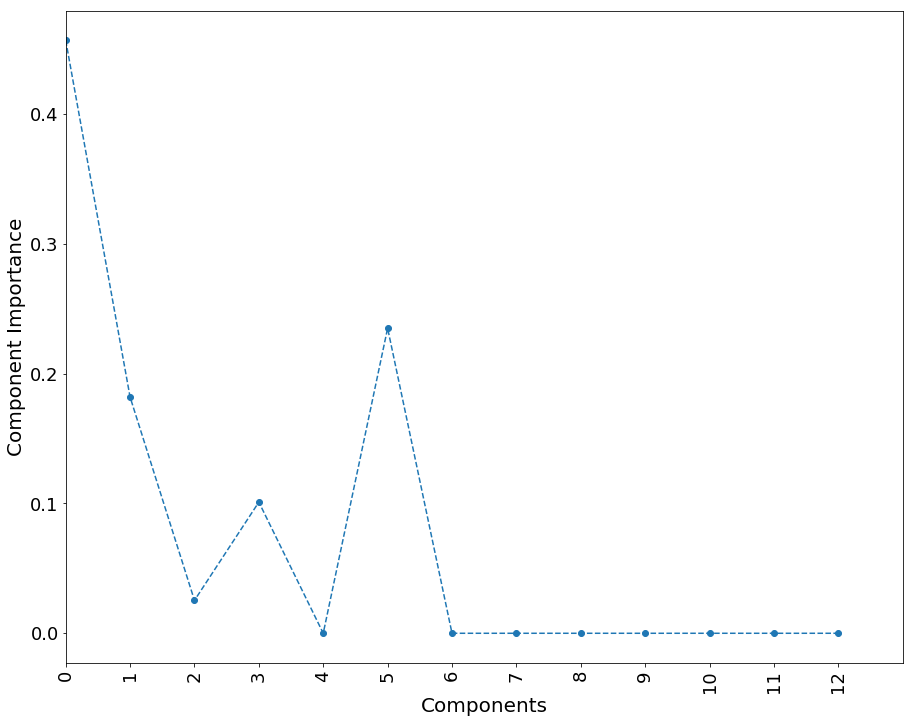

In [356]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [357]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[300,200], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.950663026521

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3547    44     3591
1           209  1328     1537
__all__    3756  1372     5128

Accuracy of the  Bagging  model for test data is: 0.798751950078

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          767  129      896
1          129  257      386
__all__    896  386     1282

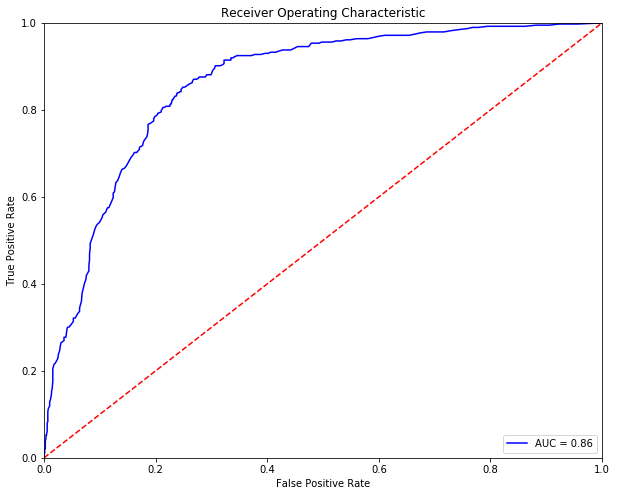

Optimal Threshold is 0.41
Accuracy on test data is: 0.794851794072


Predicted  0.0  1.0  __all__
Actual                      
0.0        713  183      896
1.0         80  306      386
__all__    793  489     1282

In [358]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [359]:
table_80_70_PCA_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [360]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.940132605304


Predicted     0     1  __all__
Actual                        
0          3567    24     3591
1           283  1254     1537
__all__    3850  1278     5128

The test accuracy is: 0.783931357254


Predicted    0    1  __all__
Actual                      
0          784  112      896
1          165  221      386
__all__    949  333     1282

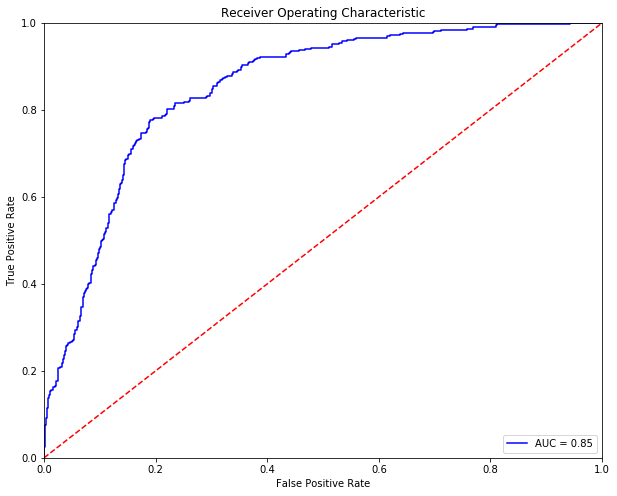

Optimal Threshold is 0.364688729289
Accuracy on test data is: 0.784711388456


Predicted  0.0  1.0  __all__
Actual                      
0.0        703  193      896
1.0         83  303      386
__all__    786  496     1282

In [361]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [362]:
table_80_70_PCA_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [363]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.851014040562


Predicted     0     1  __all__
Actual                        
0          3266   325     3591
1           439  1098     1537
__all__    3705  1423     5128

The accuracy of the model on test data is: 0.790951638066


Predicted    0    1  __all__
Actual                      
0          781  115      896
1          153  233      386
__all__    934  348     1282

 832/1282 [==================>...........] - ETA: 0s

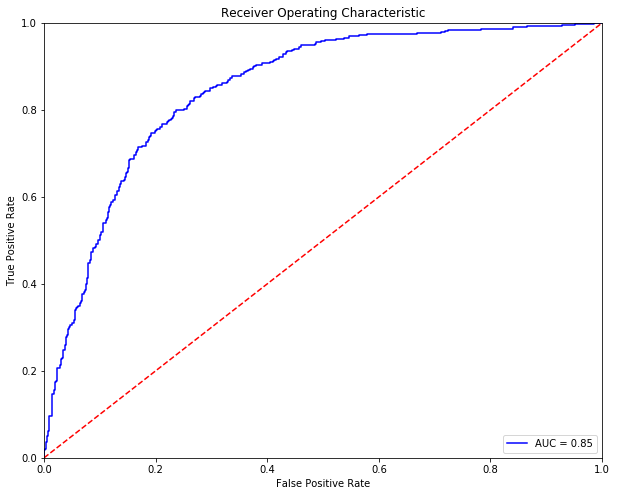

Optimal Threshold is 0.292828
Accuracy of Logistic Model on training data is: 0.776131045242


Predicted  0.0  1.0  __all__
Actual                      
0.0        696  200      896
1.0         87  299      386
__all__    783  499     1282

In [364]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [365]:
table_80_70_PCA_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [366]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.7min finished


The accuracy of the model on training data is: 0.796411856474


Predicted     0     1  __all__
Actual                        
0          3089   502     3591
1           542   995     1537
__all__    3631  1497     5128

The accuracy of the model on test data is: 0.790951638066


Predicted    0    1  __all__
Actual                      
0          765  131      896
1          137  249      386
__all__    902  380     1282

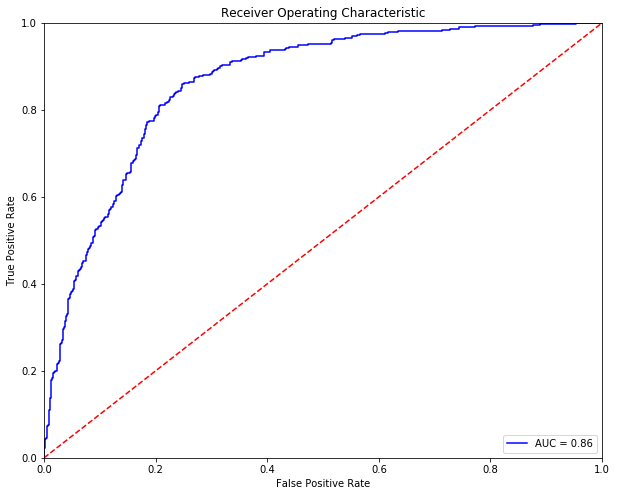

Optimal Threshold is 0.392251
Accuracy on test data is: 0.794851794072


Predicted  0.0  1.0  __all__
Actual                      
0.0        713  183      896
1.0         80  306      386
__all__    793  489     1282

In [367]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [368]:
table_80_70_PCA_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_PCA_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_70_PCA_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [369]:
table_80_70_PCA_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_PCA_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_70_PCA_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_70_PCA_20_test.set_index(['index'],drop=True,inplace=True)
table_80_70_PCA_20_train.set_index(['index'],drop=True,inplace=True)
table_80_70_PCA_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_70_PCA_20_train)

print("Comparision Table for Test Accuracies:")
display(table_80_70_PCA_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_70_PCA_20_test_roc)

Comparision Table for Training Accuracies:


accuracy           TP           TN           FP  \
index                                                                         
KNeighborsClassifier        1.000000  1537.000000  3591.000000     0.000000   
LogisticRegression          0.782371  1121.000000  2891.000000   700.000000   
RandomForestClassifier      0.700273  2514.680382  1076.319618  1076.319618   
AdaBoostClassifier          0.788612  1029.000000  3015.000000   576.000000   
GradientBoostingClassifier  0.788612  1012.000000  3032.000000   559.000000   
ExtraTreeClassifier         0.786661   903.000000  3131.000000   460.000000   
BaggingClassifier           0.950663  1328.000000  3547.000000    44.000000   
VotingClassifier            0.940133  1254.000000  3567.000000    24.000000   
Neural Network-1            0.851014  1098.000000  3266.000000   325.000000   
Neural-Network-2            0.796412   995.000000  3089.000000   502.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier          0.000000  0.000000  0.000000  
LogisticRegression          416.000000  0.194932  0.270657  
RandomForestClassifier      460.680382  0.700273  0.299727  
AdaBoostClassifier          508.000000  0.160401  0.330514  
GradientBoostingClassifier  525.000000  0.155667  0.341574  
ExtraTreeClassifier         634.000000  0.128098  0.412492  
BaggingClassifier           209.000000  0.012253  0.135979  
VotingClassifier            283.000000  0.006683  0.184125  
Neural Network-1            439.000000  0.090504  0.285621  
Neural-Network-2            542.000000  0.139794  0.352635

Comparision Table for Test Accuracies:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.783151  222.000000  782.000000  114.000000   
LogisticRegression          0.794072  294.000000  724.000000  172.000000   
RandomForestClassifier      0.698908  626.221529  269.778471  269.778471   
AdaBoostClassifier          0.787832  263.000000  747.000000  149.000000   
GradientBoostingClassifier  0.794072  262.000000  756.000000  140.000000   
ExtraTreeClassifier         0.789392  231.000000  781.000000  115.000000   
BaggingClassifier           0.798752  257.000000  767.000000  129.000000   
VotingClassifier            0.783931  221.000000  784.000000  112.000000   
Neural Network-1            0.790952  233.000000  781.000000  115.000000   
Neural-Network-2            0.790952  249.000000  765.000000  131.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier        164.000000  0.127232  0.424870  
LogisticRegression           92.000000  0.191964  0.238342  
RandomForestClassifier      116.221529  0.698908  0.301092  
AdaBoostClassifier          123.000000  0.166295  0.318653  
GradientBoostingClassifier  124.000000  0.156250  0.321244  
ExtraTreeClassifier         155.000000  0.128348  0.401554  
BaggingClassifier           129.000000  0.143973  0.334197  
VotingClassifier            165.000000  0.125000  0.427461  
Neural Network-1            153.000000  0.128348  0.396373  
Neural-Network-2            137.000000  0.146205  0.354922

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.787051  303.0  706.0  190.0   83.0  0.212054   
LogisticRegression          0.787051  303.0  706.0  190.0   83.0  0.212054   
RandomForestClassifier      0.795632  306.0  714.0  182.0   80.0  0.203125   
AdaBoostClassifier          0.790952  304.0  710.0  186.0   82.0  0.207589   
GradientBoostingClassifier  0.794852  306.0  713.0  183.0   80.0  0.204241   
ExtraTreeClassifier         0.805772  286.0  747.0  149.0  100.0  0.166295   
BaggingClassifier           0.794852  306.0  713.0  183.0   80.0  0.204241   
VotingClassifier            0.784711  303.0  703.0  193.0   83.0  0.215402   
Neural Network-1            0.776131  299.0  696.0  200.0   87.0  0.223214   
Neural-Network-2            0.794852  306.0  713.0  183.0   80.0  0.204241   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.215026   0.337931  0.858911  
LogisticRegression          0.215026   0.486216  0.857611  
RandomForestClassifier      0.207254   0.364598  0.834057  
AdaBoostClassifier          0.212435   0.496011  0.860977  
GradientBoostingClassifier  0.207254   0.368106  0.864283  
ExtraTreeClassifier         0.259067   0.370757  0.853044  
BaggingClassifier           0.207254   0.410000  0.860138  
VotingClassifier            0.215026   0.364689  0.849411  
Neural Network-1            0.225389   0.292828  0.847876  
Neural-Network-2            0.207254   0.392251  0.863293

In [370]:
table_80_70_PCA_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_70_PCA_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_70_PCA_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [371]:
table_80_70_PCA_train_avg['accuracy']=(table_80_70_PCA_0_train['accuracy']+table_80_70_PCA_10_train['accuracy']+table_80_70_PCA_20_train['accuracy'])/3.0
table_80_70_PCA_train_avg['FPR']=(table_80_70_PCA_0_train['FPR']+table_80_70_PCA_10_train['FPR']+table_80_70_PCA_20_train['FPR'])/3.0
table_80_70_PCA_train_avg['FNR']=(table_80_70_PCA_0_train['FNR']+table_80_70_PCA_10_train['FNR']+table_80_70_PCA_20_train['FNR'])/3.0

In [372]:
table_80_70_PCA_test_avg['accuracy']=(table_80_70_PCA_0_test['accuracy']+table_80_70_PCA_10_test['accuracy']+table_80_70_PCA_20_test['accuracy'])/3.0
table_80_70_PCA_test_avg['FPR']=(table_80_70_PCA_0_test['FPR']+table_80_70_PCA_10_test['FPR']+table_80_70_PCA_20_test['FPR'])/3.0
table_80_70_PCA_test_avg['FNR']=(table_80_70_PCA_0_test['FNR']+table_80_70_PCA_10_test['FNR']+table_80_70_PCA_20_test['FNR'])/3.0

In [373]:
table_80_70_PCA_test_roc_avg['accuracy']=(table_80_70_PCA_0_test_roc['accuracy']+table_80_70_PCA_10_test_roc['accuracy']+table_80_70_PCA_20_test_roc['accuracy'])/3.0
table_80_70_PCA_test_roc_avg['FPR']=(table_80_70_PCA_0_test_roc['FPR']+table_80_70_PCA_10_test_roc['FPR']+table_80_70_PCA_20_test_roc['FPR'])/3.0
table_80_70_PCA_test_roc_avg['FNR']=(table_80_70_PCA_0_test_roc['FNR']+table_80_70_PCA_10_test_roc['FNR']+table_80_70_PCA_20_test_roc['FNR'])/3.0
table_80_70_PCA_test_roc_avg['auc']=(table_80_70_PCA_0_test_roc['auc']+table_80_70_PCA_10_test_roc['auc']+table_80_70_PCA_20_test_roc['auc'])/3.0

In [374]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_80_70_PCA_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_80_70_PCA_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_70_PCA_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        1.000000  0.000000  0.000000
LogisticRegression          0.780161  0.205663  0.252773
RandomForestClassifier      0.698843  0.698843  0.301157
AdaBoostClassifier          0.794787  0.144619  0.345762
GradientBoostingClassifier  0.796347  0.142391  0.345757
ExtraTreeClassifier         0.796412  0.131351  0.371357
BaggingClassifier           0.977964  0.004084  0.063849
VotingClassifier            0.951443  0.005021  0.149745
Neural Network-1            0.858424  0.082671  0.278181
Neural-Network-2            0.798427  0.150125  0.320971

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.771971  0.117744  0.491639
LogisticRegression          0.781071  0.208826  0.242927
RandomForestClassifier      0.704628  0.704628  0.295372
AdaBoostClassifier          0.779771  0.158748  0.367467
GradientBoostingClassifier  0.783931  0.156870  0.357663
ExtraTreeClassifier         0.775351  0.148648  0.405503
BaggingClassifier           0.777951  0.141746  0.414289
VotingClassifier            0.773011  0.131701  0.454039
Neural Network-1            0.778471  0.139471  0.417557
Neural-Network-2            0.788092  0.161264  0.332601

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.773791  0.225415  0.228100  0.834837
LogisticRegression          0.776651  0.222504  0.225347  0.841550
RandomForestClassifier      0.753510  0.384312  0.252620  0.800229
AdaBoostClassifier          0.773791  0.224296  0.230754  0.839495
GradientBoostingClassifier  0.780291  0.218809  0.221858  0.845158
ExtraTreeClassifier         0.773791  0.195627  0.299960  0.823967
BaggingClassifier           0.777431  0.221370  0.225452  0.836573
VotingClassifier            0.768071  0.231712  0.232459  0.832833
Neural Network-1            0.762350  0.237237  0.238628  0.828444
Neural-Network-2            0.781331  0.218070  0.220099  0.846810

### <a id='1.D' style="text-decoration : none; color : #000000;">D. 70:30 Train Test split with PCA </a>

#### Random State 0

In [375]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_0.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC        PAR  \
Source_User                                                           
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...   441  46.138322   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...   254  24.370079   

                                                          PAS        LEN  \
Source_User                                                                
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  29.460317  66.585034   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  21.968504  33.976378   

                                                            BYS           BYR  \
Source_User                                                                     
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  4755.390023  54162.571429   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  3180.610236  25776.055118   

                                                       SP   DP  NAPP  SIP  \
Source_User                                                                 
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  438.0  6.0    21   25   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  252.0  4.0    12    2   

                                                    DIP          TDIF  0000  \
Source_User                                                                   
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...  132  10734.321995    14   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...  108   1006.488189     0   

                                                    0100  0200  0300  0400  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    15     2     0     1   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     0     0   

                                                    0500  0600  0700  0800  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...     1     6    19    15   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     6   231   

                                                    0900  1000  1100  1200  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...     9    12    18    18   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     1     3     1     2   

                                                    1300  1400  1500  1600  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    21    33    49    86   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     2     1     3     1   

                                                    1700  1800  1900  2000  \
Source_User                                                                  
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    72    13     4    14   
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     3     0     0     0   

                                                    2100  2200  2300  
Source_User                                                           
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce...    11     2     6  
0f12269fba4fbd7f6a9229708650d1511638053b127dc8d...     0     0     0

1 -> Infected
0 -> Uninfected


Source_User
faa73b3f65d10c31ffdaddc8709cc96679970d7bca5f9ce66a9a4968c19e7923    0
0f12269fba4fbd7f6a9229708650d1511638053b127dc8df6d8ed628067c1c17    0
b343b9f652a841f55180dec62614b6f3f4ef123aa6c7bd4e11ba330f1f20ab1e    0
d4522f4975663af6ea4d8c261c8ff4ccca09ed099f1b4bf18c22a92219746d40    0
fd3ce5c94c3c37ad6e64bcd3fea156bce5f73d66ff8d5e38c668fd65d2fbad35    1
9bd426dc9dd76d55870bfa1d277228863be08643c1c251bfa01fbeea6befa548    0
64c7c7ab1002f853fec50dcb65b8d4ce104aa67df24a116fe47ab67d9816fda6    1
b232f1a6b8db7b92cce166503c5faafe30609a93860360536391ef9f827958ab    1
89085fa53e0136faacd2e660766c2af3e4f45890a9fe3954c72b9abd9706be63    0
13e3cf1c083c78d4313f1f000c24f9d1051d78d19a69725479c0c59cf105df0c    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.90269079243
The train/test split ratio is 70:30


In [376]:
display(X_pca_13[0:1])

array([[-0.58747807, -0.26219659, -0.09694116,  0.19041097, -0.07630951,
         0.0769075 ,  0.05119449,  0.59058062,  0.36924235,  0.27105941,
        -0.15159042,  0.14637505,  0.41697565]])

In [377]:
## Table to store training and test measures
table_70_70_PCA_0_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_PCA_0_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_PCA_0_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [378]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3133     0     3133
1             0  1354     1354
__all__    3133  1354     4487

Accuracy of the  KNN  model for test data is: 0.778991159646

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1233  121     1354
1           304  265      569
__all__    1537  386     1923

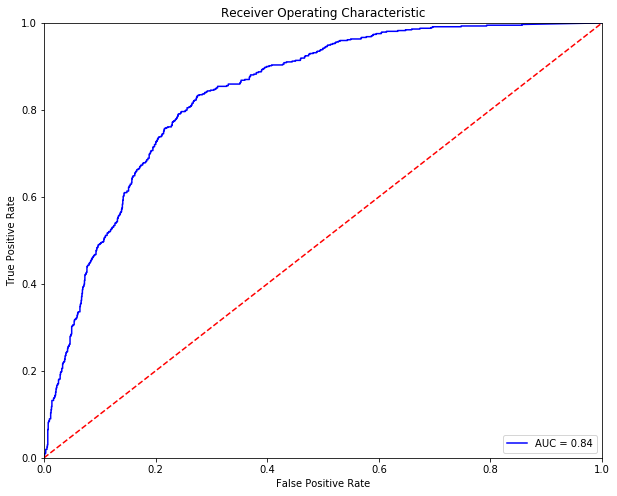

Optimal Threshold is 0.284878830524
Accuracy on test data is: 0.770150806032


Predicted   0.0  1.0  __all__
Actual                       
0.0        1043  311     1354
1.0         131  438      569
__all__    1174  749     1923

In [379]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [380]:
table_70_70_PCA_0_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_0_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_0_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [381]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05

Accuracy of the  Logistic  model for the training data is: 0.776911076443

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2763   370     3133
1           631   723     1354
__all__    3394  1093     4487

Accuracy of the  Logistic  model for test data is: 0.782631305252

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1208  146     1354
1           272  297      569
__all__    1480  443     1923

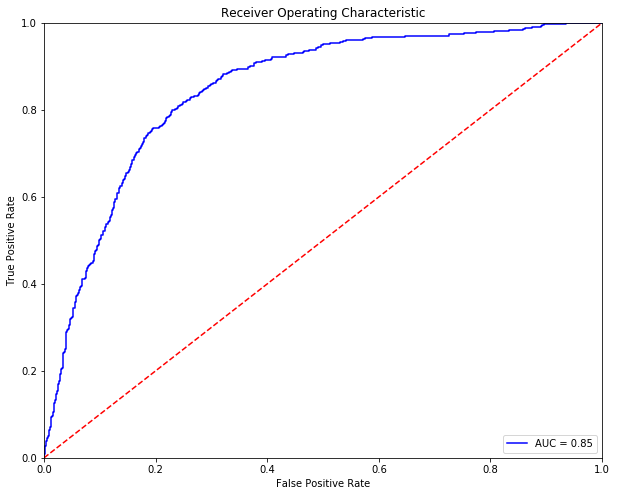

Optimal Threshold is 0.402820121862
Accuracy on test data is: 0.780551222049


Predicted   0.0  1.0  __all__
Actual                       
0.0        1057  297     1354
1.0         125  444      569
__all__    1182  741     1923

In [382]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [383]:
table_70_70_PCA_0_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_0_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_0_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [384]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])

rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           100      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.698239358146

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          3133  0     3133
1          1354  0     1354
__all__    4487  0     4487

Accuracy of the  Random Forest Trees  model for test data is: 0.704108164327

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          1354  0     1354
1           569  0      569
__all__    1923  0     1923

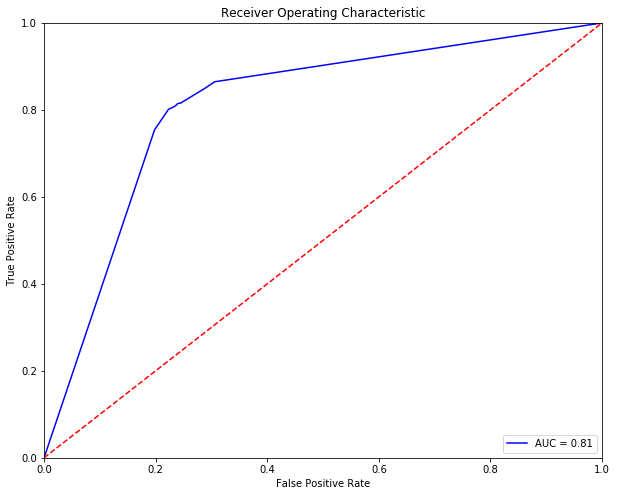

Optimal Threshold is 0.345648699912
Accuracy on test data is: 0.787831513261


Predicted   0.0  1.0  __all__
Actual                       
0.0        1086  268     1354
1.0         140  429      569
__all__    1226  697     1923

In [385]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [386]:
%%capture
table_70_70_PCA_0_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_0_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_0_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

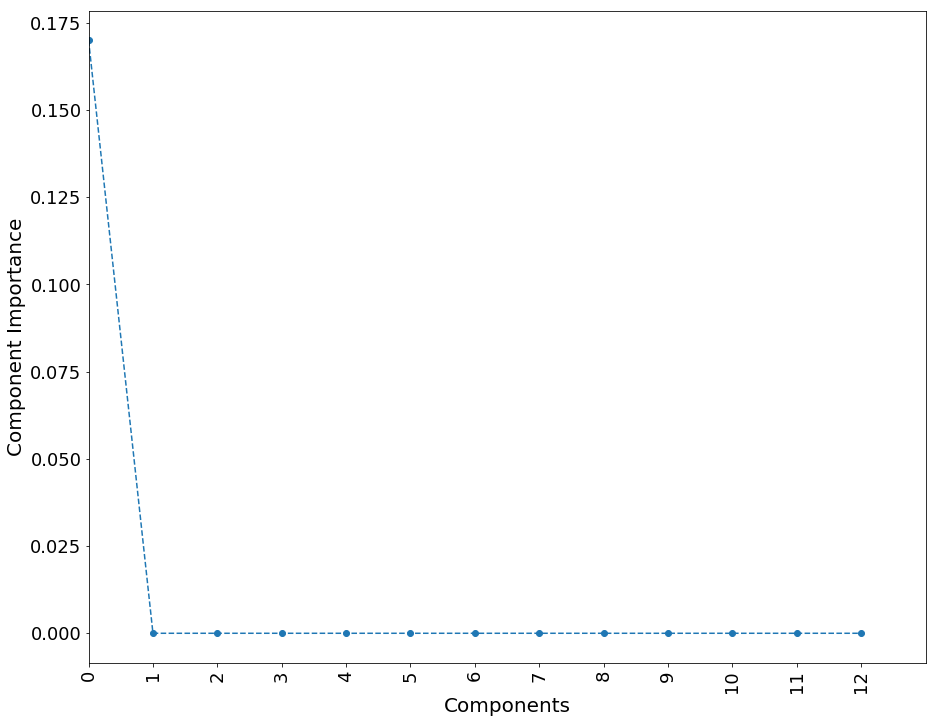

In [387]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [388]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.789614441721

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2730   403     3133
1           541   813     1354
__all__    3271  1216     4487

Accuracy of the  AdaBoostClassifier  model for test data is: 0.787831513261

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1185  169     1354
1           239  330      569
__all__    1424  499     1923

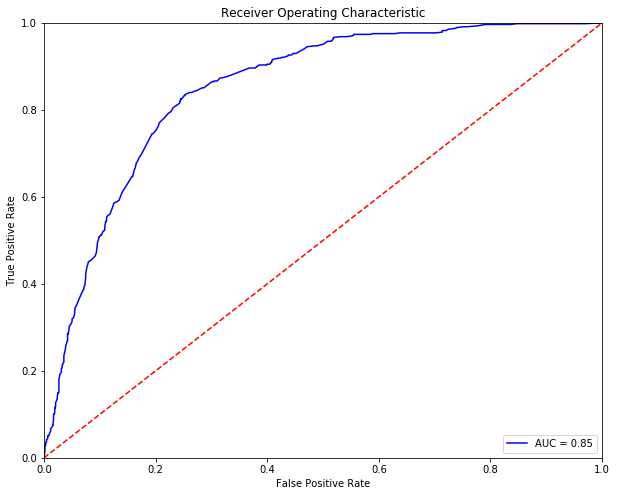

Optimal Threshold is 0.494703029305
Accuracy on test data is: 0.784191367655


Predicted   0.0  1.0  __all__
Actual                       
0.0        1064  290     1354
1.0         125  444      569
__all__    1189  734     1923

In [389]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [390]:
table_70_70_PCA_0_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_0_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_0_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

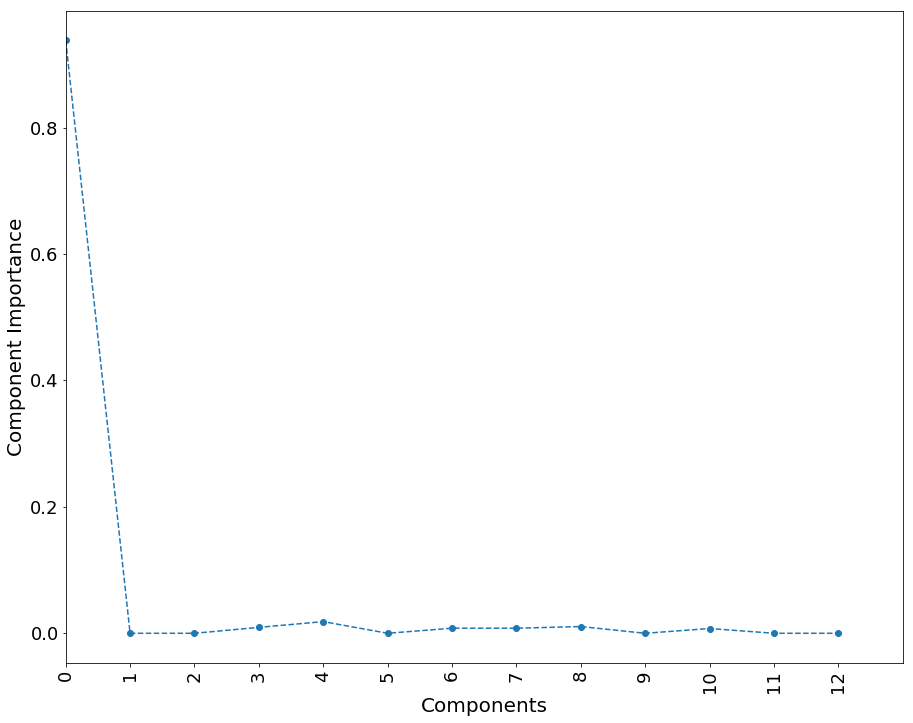

In [391]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [392]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse            0.1  deviance                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           150             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.813906841988

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2777   356     3133
1           479   875     1354
__all__    3256  1231     4487

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.795111804472

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1183  171     1354
1           223  346      569
__all__    1406  517     1923

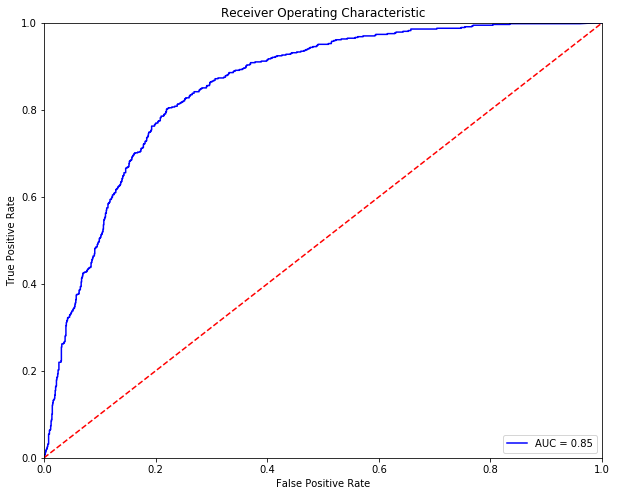

Optimal Threshold is 0.352065298336
Accuracy on test data is: 0.786271450858


Predicted   0.0  1.0  __all__
Actual                       
0.0        1065  289     1354
1.0         122  447      569
__all__    1187  736     1923

In [393]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [394]:
table_70_70_PCA_0_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_0_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_0_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

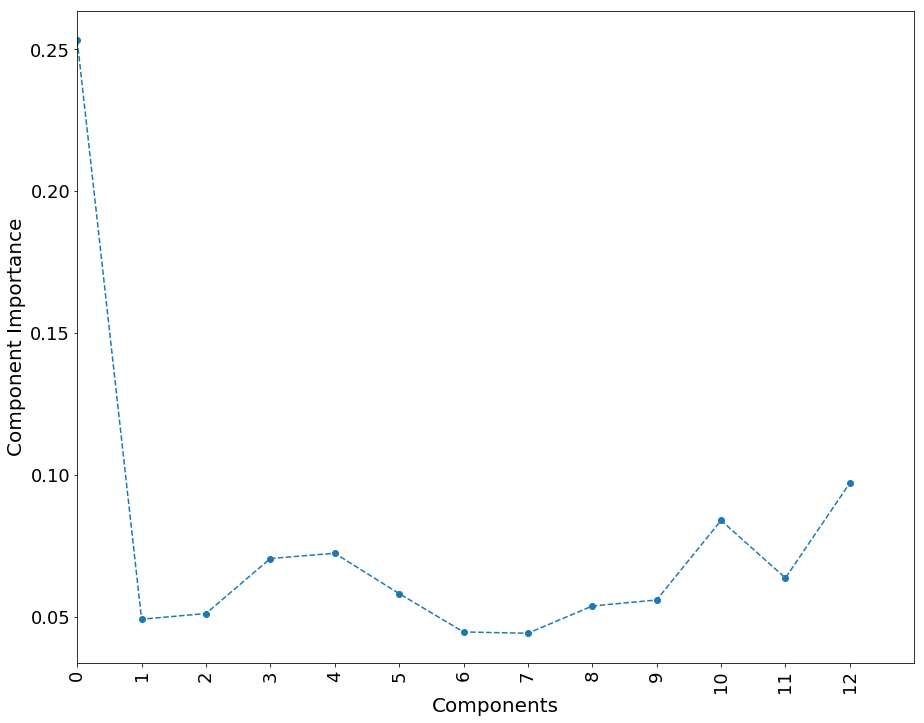

In [395]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [396]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.768887898373

Confusion Matrix for Training data is:


Predicted     0    1  __all__
Actual                       
0          2914  219     3133
1           818  536     1354
__all__    3732  755     4487

Accuracy of the  Extra Decision Tree  model for test data is: 0.764430577223

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1253  101     1354
1           352  217      569
__all__    1605  318     1923

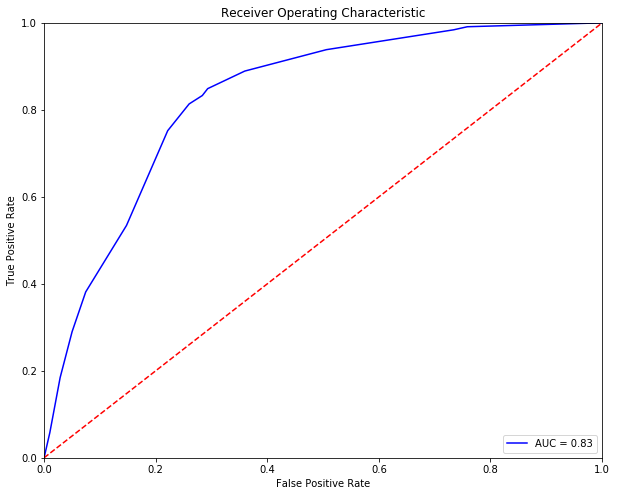

Optimal Threshold is 0.464912280702
Accuracy on test data is: 0.758190327613


Predicted   0.0  1.0  __all__
Actual                       
0.0        1154  200     1354
1.0         265  304      569
__all__    1419  504     1923

In [397]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [398]:
table_70_70_PCA_0_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_0_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [399]:
%%capture
table_70_70_PCA_0_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

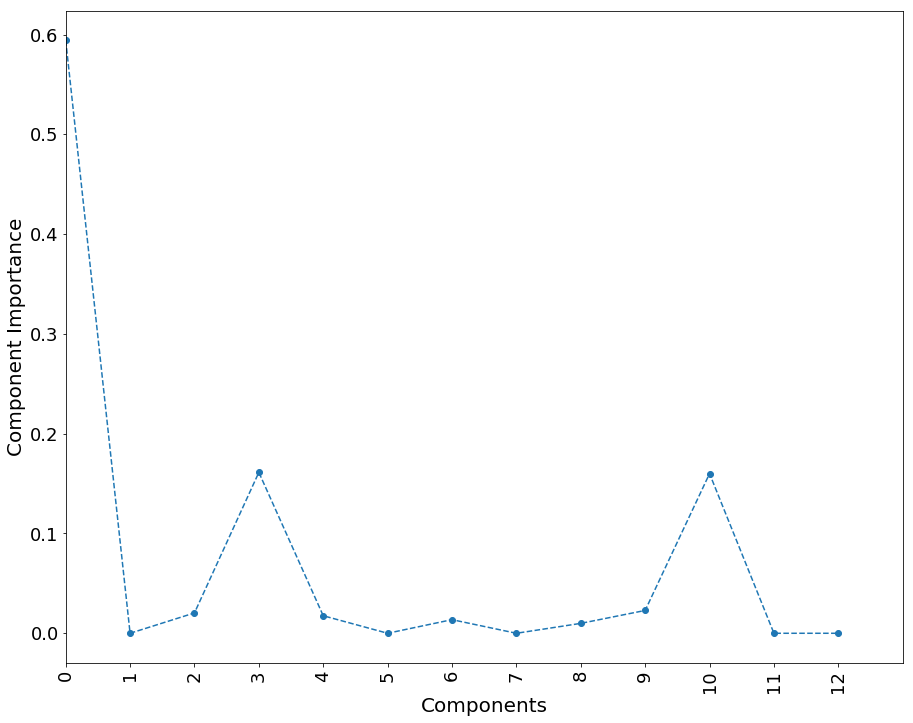

In [400]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [401]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[300,100], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.3           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.93046579006

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3074    59     3133
1           253  1101     1354
__all__    3327  1160     4487

Accuracy of the  Bagging  model for test data is: 0.778991159646

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1200  154     1354
1           271  298      569
__all__    1471  452     1923

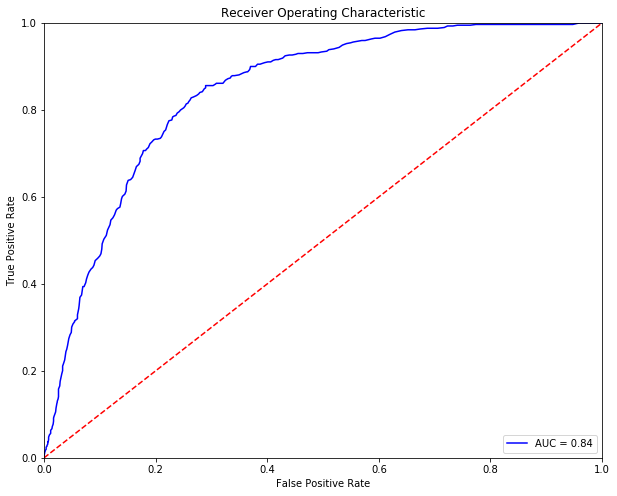

Optimal Threshold is 0.376666666667
Accuracy on test data is: 0.775351014041


Predicted   0.0  1.0  __all__
Actual                       
0.0        1055  299     1354
1.0         133  436      569
__all__    1188  735     1923

In [402]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [403]:
table_70_70_PCA_0_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_0_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_0_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [404]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.942723423223


Predicted     0     1  __all__
Actual                        
0          3123    10     3133
1           247  1107     1354
__all__    3370  1117     4487

The test accuracy is: 0.777431097244


Predicted     0    1  __all__
Actual                       
0          1195  159     1354
1           269  300      569
__all__    1464  459     1923

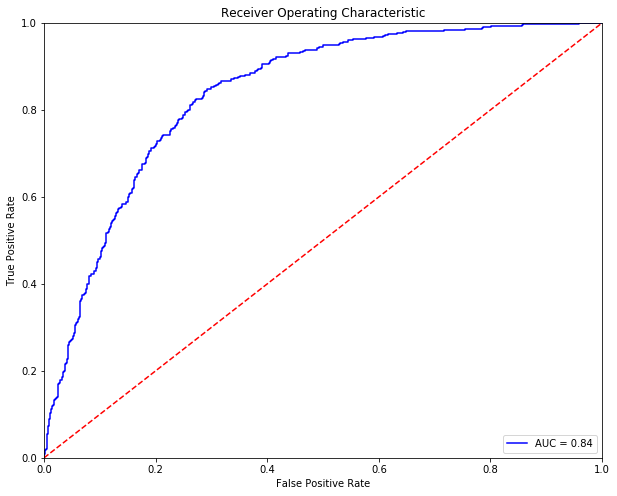

Optimal Threshold is 0.352641521545
Accuracy on test data is: 0.763390535621


Predicted   0.0  1.0  __all__
Actual                       
0.0        1034  320     1354
1.0         135  434      569
__all__    1169  754     1923

In [405]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [406]:
table_70_70_PCA_0_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_0_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_0_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [407]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.874080677526


Predicted     0     1  __all__
Actual                        
0          2925   208     3133
1           357   997     1354
__all__    3282  1205     4487

The accuracy of the model on test data is: 0.772230889236


Predicted     0    1  __all__
Actual                       
0          1162  192     1354
1           246  323      569
__all__    1408  515     1923

1472/1923 [=====================>........] - ETA: 0s

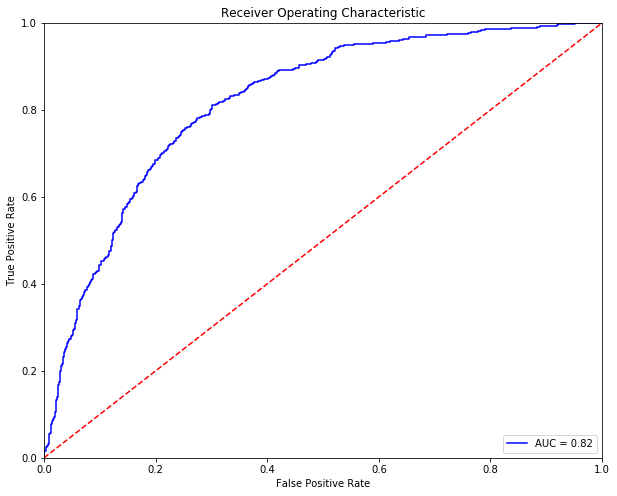

Optimal Threshold is 0.315228
Accuracy of Logistic Model on training data is: 0.751950078003


Predicted   0.0  1.0  __all__
Actual                       
0.0        1019  335     1354
1.0         142  427      569
__all__    1161  762     1923

In [408]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [409]:
table_70_70_PCA_0_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_0_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_0_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [410]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.6min finished


The accuracy of the model on training data is: 0.804323601515


Predicted     0     1  __all__
Actual                        
0          2774   359     3133
1           519   835     1354
__all__    3293  1194     4487

The accuracy of the model on test data is: 0.785751430057


Predicted     0    1  __all__
Actual                       
0          1181  173     1354
1           239  330      569
__all__    1420  503     1923

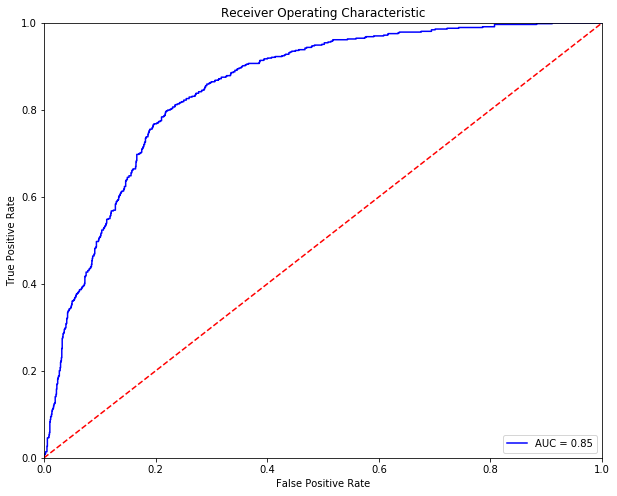

Optimal Threshold is 0.357111
Accuracy on test data is: 0.785231409256


Predicted   0.0  1.0  __all__
Actual                       
0.0        1064  290     1354
1.0         123  446      569
__all__    1187  736     1923

In [411]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [412]:
table_70_70_PCA_0_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_0_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_0_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [413]:
table_70_70_PCA_0_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_PCA_0_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_PCA_0_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_70_PCA_0_test.set_index(['index'],drop=True,inplace=True)
table_70_70_PCA_0_train.set_index(['index'],drop=True,inplace=True)
table_70_70_PCA_0_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_70_PCA_0_train)

print("Comparision Table for Test Accuracies:")
display(table_70_70_PCA_0_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_70_PCA_0_test_roc)

Comparision Table for Training Accuracies:


accuracy           TP           TN          FP  \
index                                                                        
KNeighborsClassifier        1.000000  1354.000000  3133.000000    0.000000   
LogisticRegression          0.776911   723.000000  2763.000000  370.000000   
RandomForestClassifier      0.698239  2187.583909   945.416091  945.416091   
AdaBoostClassifier          0.789614   813.000000  2730.000000  403.000000   
GradientBoostingClassifier  0.813907   875.000000  2777.000000  356.000000   
ExtraTreeClassifier         0.768888   536.000000  2914.000000  219.000000   
BaggingClassifier           0.930466  1101.000000  3074.000000   59.000000   
VotingClassifier            0.942723  1107.000000  3123.000000   10.000000   
Neural Network-1            0.874081   997.000000  2925.000000  208.000000   
Neural-Network-2            0.804324   835.000000  2774.000000  359.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier          0.000000  0.000000  0.000000  
LogisticRegression          631.000000  0.118098  0.466027  
RandomForestClassifier      408.583909  0.698239  0.301761  
AdaBoostClassifier          541.000000  0.128631  0.399557  
GradientBoostingClassifier  479.000000  0.113629  0.353767  
ExtraTreeClassifier         818.000000  0.069901  0.604136  
BaggingClassifier           253.000000  0.018832  0.186854  
VotingClassifier            247.000000  0.003192  0.182422  
Neural Network-1            357.000000  0.066390  0.263663  
Neural-Network-2            519.000000  0.114587  0.383309

Comparision Table for Test Accuracies:


accuracy          TP           TN          FP  \
index                                                                       
KNeighborsClassifier        0.778991  265.000000  1233.000000  121.000000   
LogisticRegression          0.782631  297.000000  1208.000000  146.000000   
RandomForestClassifier      0.704108  953.362454   400.637546  400.637546   
AdaBoostClassifier          0.787832  330.000000  1185.000000  169.000000   
GradientBoostingClassifier  0.795112  346.000000  1183.000000  171.000000   
ExtraTreeClassifier         0.764431  217.000000  1253.000000  101.000000   
BaggingClassifier           0.778991  298.000000  1200.000000  154.000000   
VotingClassifier            0.777431  300.000000  1195.000000  159.000000   
Neural Network-1            0.772231  323.000000  1162.000000  192.000000   
Neural-Network-2            0.785751  330.000000  1181.000000  173.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier        304.000000  0.089365  0.534271  
LogisticRegression          272.000000  0.107829  0.478032  
RandomForestClassifier      168.362454  0.704108  0.295892  
AdaBoostClassifier          239.000000  0.124815  0.420035  
GradientBoostingClassifier  223.000000  0.126292  0.391916  
ExtraTreeClassifier         352.000000  0.074594  0.618629  
BaggingClassifier           271.000000  0.113737  0.476274  
VotingClassifier            269.000000  0.117430  0.472759  
Neural Network-1            246.000000  0.141802  0.432337  
Neural-Network-2            239.000000  0.127770  0.420035

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.770151  438.0  1043.0  311.0  131.0  0.229690   
LogisticRegression          0.780551  444.0  1057.0  297.0  125.0  0.219350   
RandomForestClassifier      0.787832  429.0  1086.0  268.0  140.0  0.197932   
AdaBoostClassifier          0.784191  444.0  1064.0  290.0  125.0  0.214180   
GradientBoostingClassifier  0.786271  447.0  1065.0  289.0  122.0  0.213442   
ExtraTreeClassifier         0.758190  304.0  1154.0  200.0  265.0  0.147710   
BaggingClassifier           0.775351  436.0  1055.0  299.0  133.0  0.220827   
VotingClassifier            0.763391  434.0  1034.0  320.0  135.0  0.236337   
Neural Network-1            0.751950  427.0  1019.0  335.0  142.0  0.247415   
Neural-Network-2            0.785231  446.0  1064.0  290.0  123.0  0.214180   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.230228   0.284879  0.839944  
LogisticRegression          0.219684   0.402820  0.846277  
RandomForestClassifier      0.246046   0.345649  0.810197  
AdaBoostClassifier          0.219684   0.494703  0.849047  
GradientBoostingClassifier  0.214411   0.352065  0.853912  
ExtraTreeClassifier         0.465729   0.464912  0.829725  
BaggingClassifier           0.233743   0.376667  0.842313  
VotingClassifier            0.237258   0.352642  0.837678  
Neural Network-1            0.249561   0.315228  0.819052  
Neural-Network-2            0.216169   0.357111  0.851544

#### Random State 10

In [414]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_10.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  5164  438.195198   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  1347  462.677060   

                                                           PAS         LEN  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  231.486445  116.998644   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  125.536748   90.790646   

                                                             BYS  \
Source_User                                                        
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  25566.860767   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  13083.769859   

                                                              BYR      SP  \
Source_User                                                                 
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  578623.737026  4106.0   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  633355.270973  1269.0   

                                                      DP  NAPP  SIP   DIP  \
Source_User                                                                 
23a784294c34545e19b709e6b22286bd5cfda913b32d552...  42.0    54   69  1296   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  14.0    38   39   396   

                                                           TDIF  0000  0100  \
Source_User                                                                   
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   952.221340   521   405   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...  3335.414996    63    65   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   398   211   281   225   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...   145   123   147    56   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   163   170    68    59   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    61    73    32    19   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...    36    74    99   142   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    19     6    26    52   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   201   218   307   284   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    33   135    75    21   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   219   257   223   225   
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    24    23    15    28   

                                                    2200  2300  
Source_User                                                     
23a784294c34545e19b709e6b22286bd5cfda913b32d552...   173   205  
69881d3627335af7ed5613256f13b575318085c62d0a4eb...    56    50

1 -> Infected
0 -> Uninfected


Source_User
23a784294c34545e19b709e6b22286bd5cfda913b32d55224d18437016ca9135    1
69881d3627335af7ed5613256f13b575318085c62d0a4eb30ef45663cdf794ef    0
4336978528c6a752e441b177d8222c6477449660ce0c772e567e6d7f32c7e896    0
6507f3f2e0c22751060868de62ee74aed8c0c37d331ab7ab39d0f9b17e8ef426    0
6944129302f4af2ade449b755a7cb0eace943209459b735222b74dbd369ed94e    0
60a7e83d06013e0ecddb5488d101b31bdc44a0738f64667b46945011e3061980    0
9695f657a7d9b2c3202a6a25c401a660dd4fff43b396060141f23b9eefe1bed1    1
da1de679d352a2e7977a412053149f36d9e70e9bf3a059d44111774d3d8dd73f    0
4f663930f46b6dbf3e88f4a24101abb6ec2d202593d5042e26aebb10b705acf4    0
ded957eff469c307b079c16459b5caffca56d2ec1b3e36a05326c99daff1888e    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.903941813185
The train/test split ratio is 70:30


In [415]:
display(X_pca_13[0:1])

array([[ 1.29352247,  0.93920716,  0.01119081,  1.60494077, -0.4938955 ,
        -0.20049509,  0.72024192, -0.04724169,  0.37682372,  1.5386344 ,
        -0.79647324,  0.96888325, -2.3284312 ]])

In [416]:
## Table to store training and test measures
table_70_70_PCA_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_PCA_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_PCA_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [417]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3137     0     3137
1             0  1350     1350
__all__    3137  1350     4487

Accuracy of the  KNN  model for test data is: 0.769110764431

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1216  134     1350
1           310  263      573
__all__    1526  397     1923

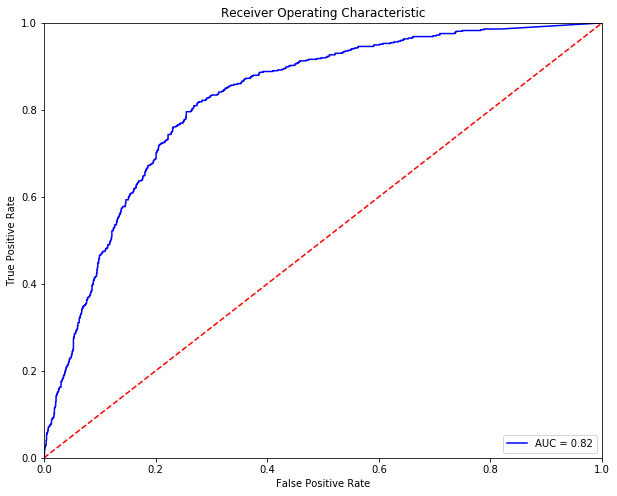

Optimal Threshold is 0.276932466214
Accuracy on test data is: 0.762870514821


Predicted   0.0  1.0  __all__
Actual                       
0.0        1031  319     1350
1.0         137  436      573
__all__    1168  755     1923

In [418]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [419]:
table_70_70_PCA_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [420]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False          False                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05

Accuracy of the  Logistic  model for the training data is: 0.775128147983

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2459   678     3137
1           331  1019     1350
__all__    2790  1697     4487

Accuracy of the  Logistic  model for test data is: 0.777951118045

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1064  286     1350
1           141  432      573
__all__    1205  718     1923

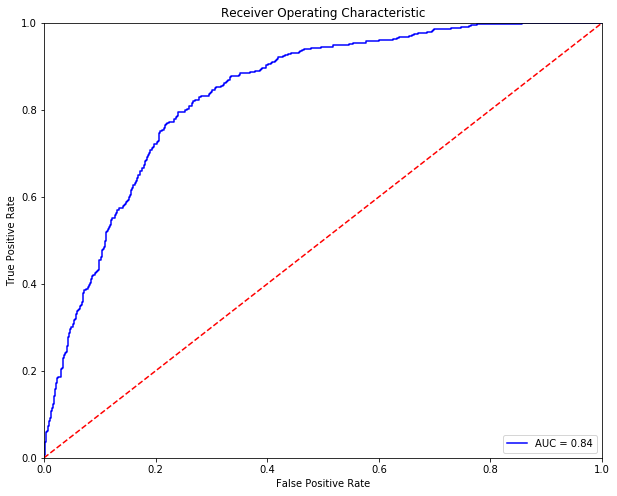

Optimal Threshold is 0.489570558746
Accuracy on test data is: 0.774310972439


Predicted   0.0  1.0  __all__
Actual                       
0.0        1047  303     1350
1.0         131  442      573
__all__    1178  745     1923

In [421]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [422]:
table_70_70_PCA_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [423]:
rf=RandomForestClassifier()
parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])

rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           100      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.699130822376

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          3137  0     3137
1          1350  0     1350
__all__    4487  0     4487

Accuracy of the  Random Forest Trees  model for test data is: 0.702028081123

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          1350  0     1350
1           573  0      573
__all__    1923  0     1923

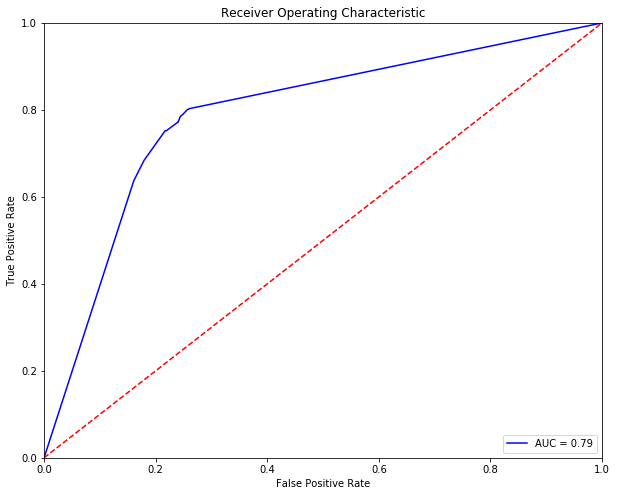

Optimal Threshold is 0.327960505647
Accuracy on test data is: 0.772230889236


Predicted   0.0  1.0  __all__
Actual                       
0.0        1054  296     1350
1.0         142  431      573
__all__    1196  727     1923

In [424]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [425]:
table_70_70_PCA_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

3137
0
0
3137
1350
0
0
1350
1.0
0.0
0.0
1.0
1350
0
0
1350
573
0
0
573
1.0
0.0
0.0
1.0


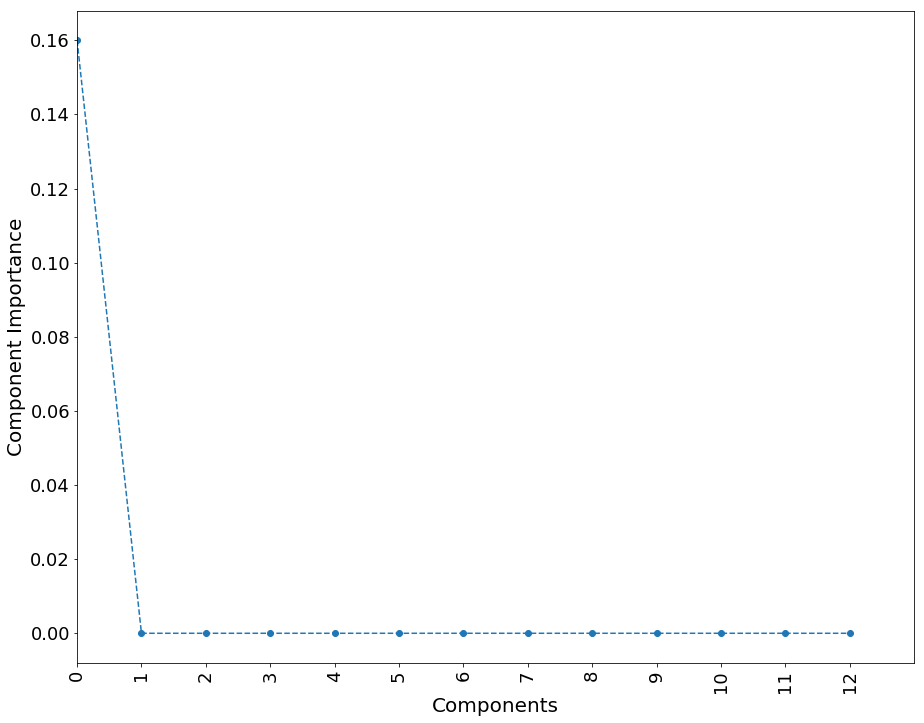

In [426]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [427]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           150             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.791843102296

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2643   494     3137
1           440   910     1350
__all__    3083  1404     4487

Accuracy of the  AdaBoostClassifier  model for test data is: 0.775351014041

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1121  229     1350
1           203  370      573
__all__    1324  599     1923

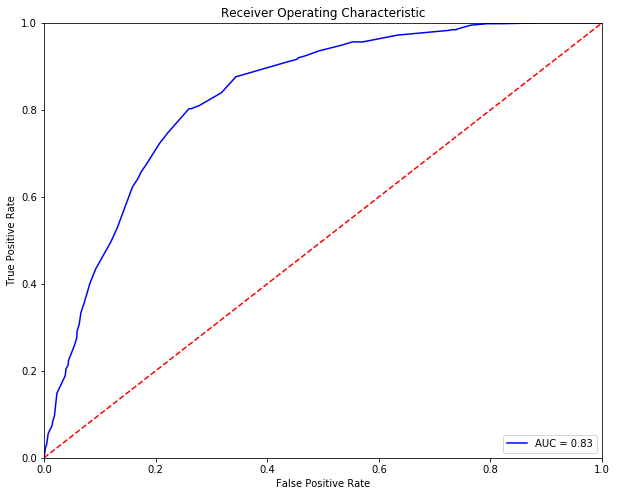

Optimal Threshold is 0.490712098246
Accuracy on test data is: 0.772230889236


Predicted   0.0  1.0  __all__
Actual                       
0.0        1071  279     1350
1.0         159  414      573
__all__    1230  693     1923

In [428]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [429]:
table_70_70_PCA_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

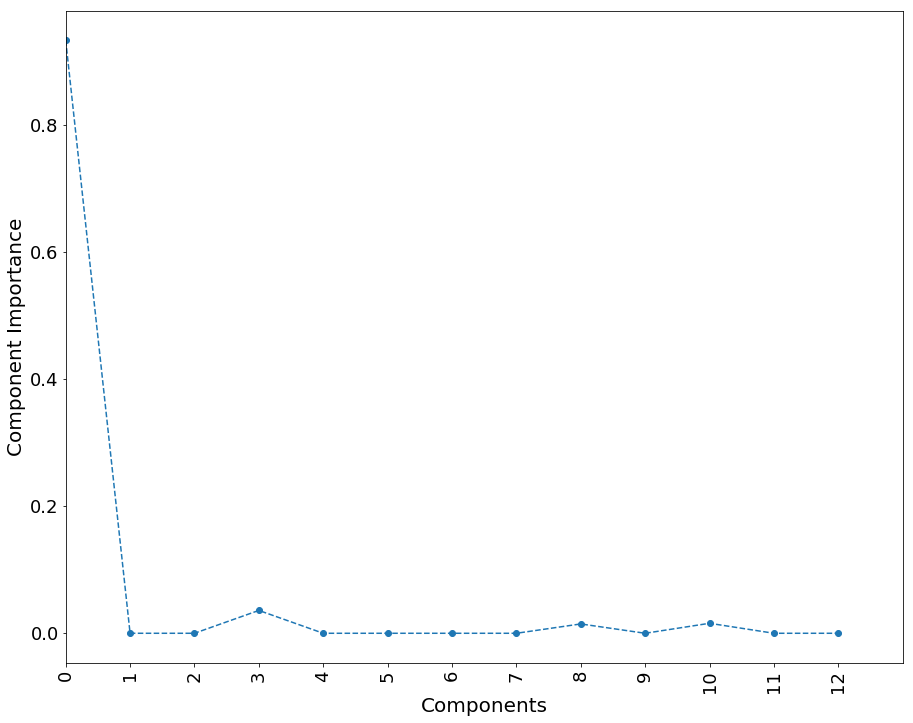

In [430]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [431]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.798974816136

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2716   421     3137
1           481   869     1350
__all__    3197  1290     4487

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.777431097244

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1150  200     1350
1           228  345      573
__all__    1378  545     1923

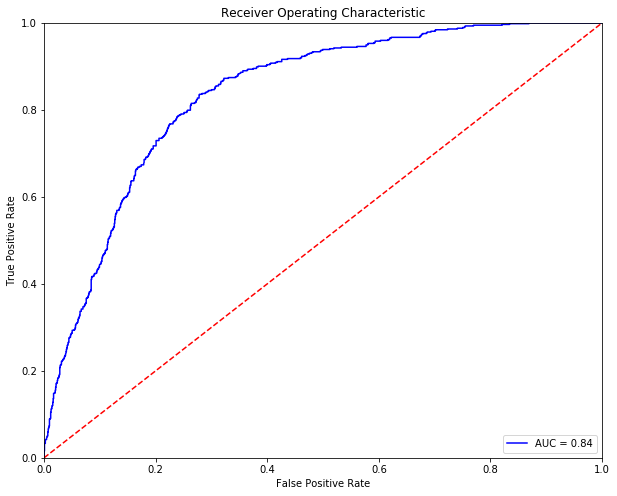

Optimal Threshold is 0.33349987274
Accuracy on test data is: 0.769110764431


Predicted   0.0  1.0  __all__
Actual                       
0.0        1039  311     1350
1.0         133  440      573
__all__    1172  751     1923

In [432]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [433]:
table_70_70_PCA_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

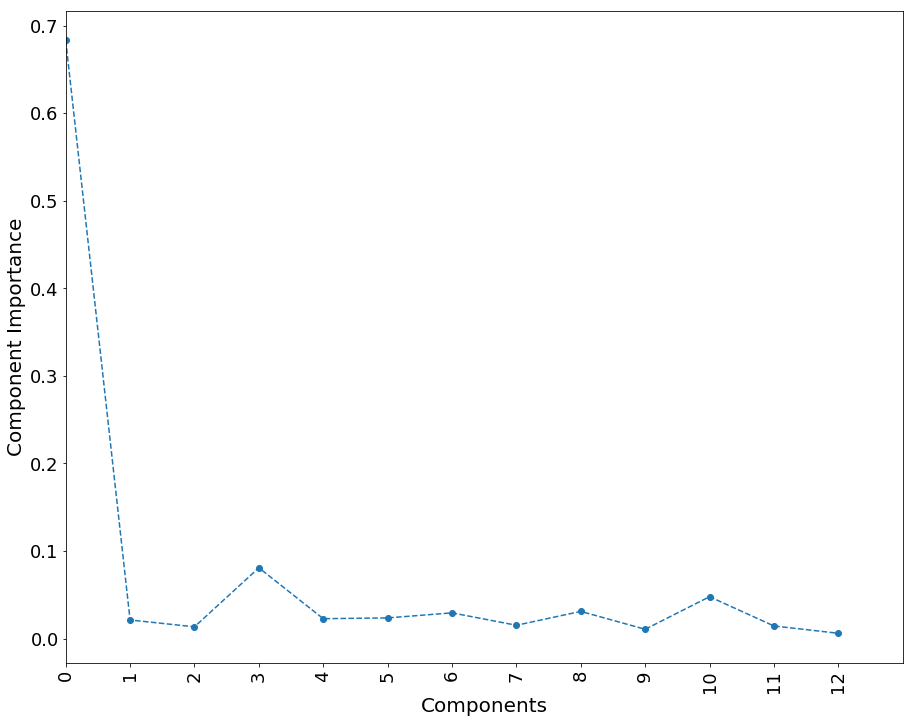

In [434]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [435]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0        entropy         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.81011811901

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2739   398     3137
1           454   896     1350
__all__    3193  1294     4487

Accuracy of the  Extra Decision Tree  model for test data is: 0.759230369215

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1133  217     1350
1           246  327      573
__all__    1379  544     1923

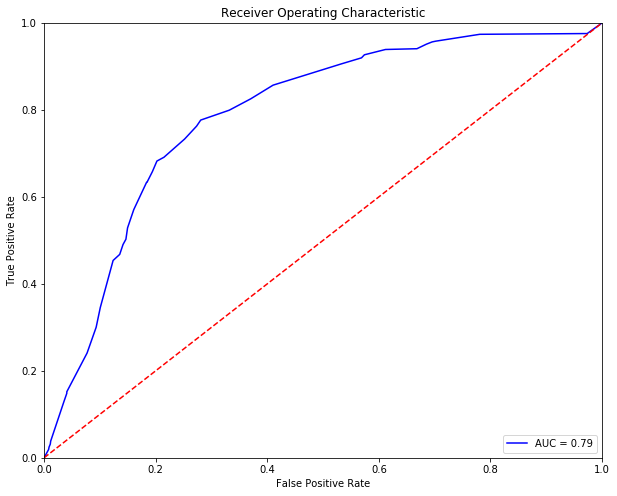

Optimal Threshold is 0.316666666667
Accuracy on test data is: 0.757150286011


Predicted   0.0  1.0  __all__
Actual                       
0.0        1060  290     1350
1.0         177  396      573
__all__    1237  686     1923

In [436]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [437]:
table_70_70_PCA_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [438]:
%%capture
table_70_70_PCA_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

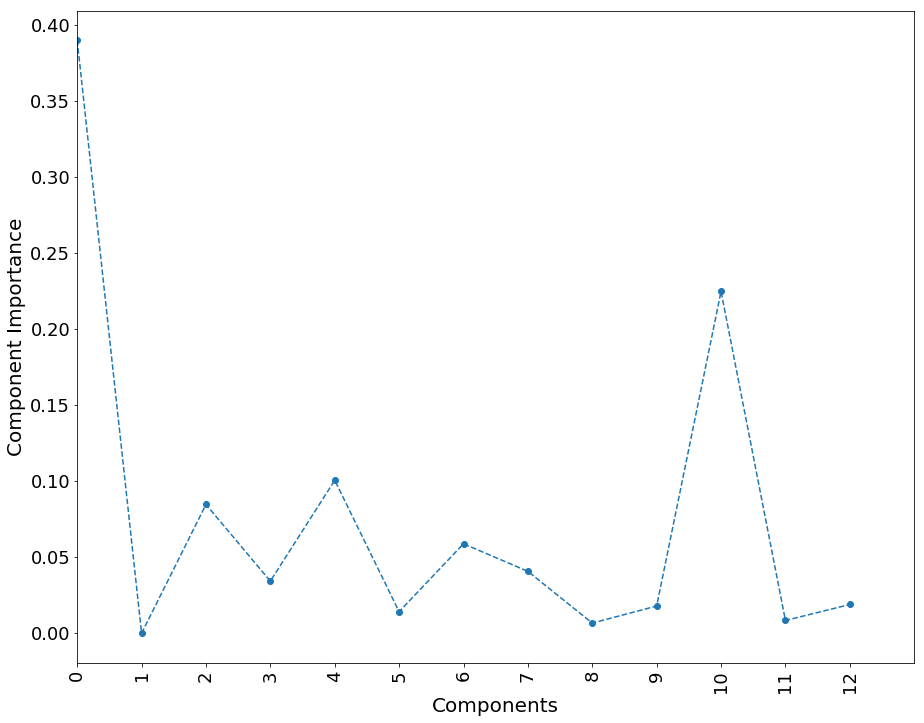

In [439]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [440]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[300,100], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.960329841765

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3128     9     3137
1           169  1181     1350
__all__    3297  1190     4487

Accuracy of the  Bagging  model for test data is: 0.766510660426

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1172  178     1350
1           271  302      573
__all__    1443  480     1923

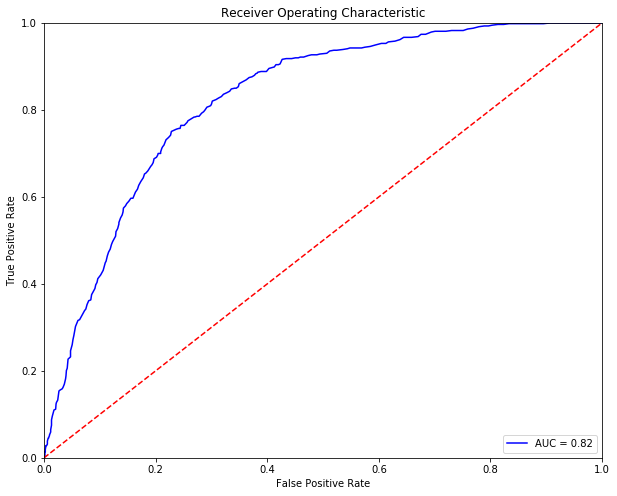

Optimal Threshold is 0.376666666667
Accuracy on test data is: 0.760790431617


Predicted   0.0  1.0  __all__
Actual                       
0.0        1030  320     1350
1.0         140  433      573
__all__    1170  753     1923

In [441]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [442]:
table_70_70_PCA_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [443]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.940940494763


Predicted     0     1  __all__
Actual                        
0          3128     9     3137
1           256  1094     1350
__all__    3384  1103     4487

The test accuracy is: 0.757150286011


Predicted     0    1  __all__
Actual                       
0          1191  159     1350
1           308  265      573
__all__    1499  424     1923

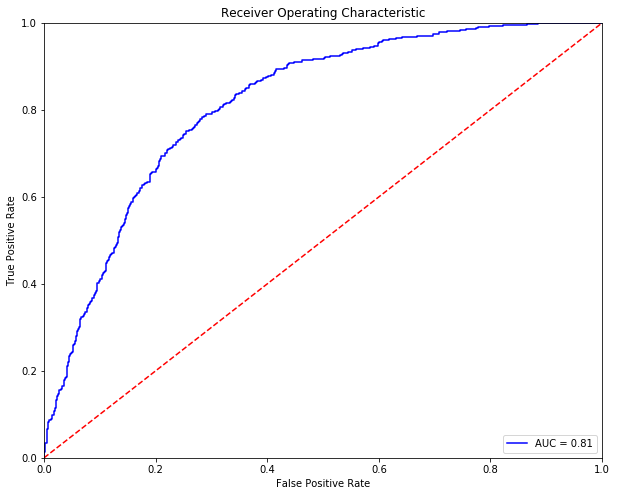

Optimal Threshold is 0.358746364856
Accuracy on test data is: 0.745709828393


Predicted   0.0  1.0  __all__
Actual                       
0.0        1007  343     1350
1.0         146  427      573
__all__    1153  770     1923

In [444]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [445]:
table_70_70_PCA_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [446]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.855359928709


Predicted     0     1  __all__
Actual                        
0          2840   297     3137
1           352   998     1350
__all__    3192  1295     4487

The accuracy of the model on test data is: 0.764950598024


Predicted     0    1  __all__
Actual                       
0          1138  212     1350
1           240  333      573
__all__    1378  545     1923

1376/1923 [====================>.........] - ETA: 0s

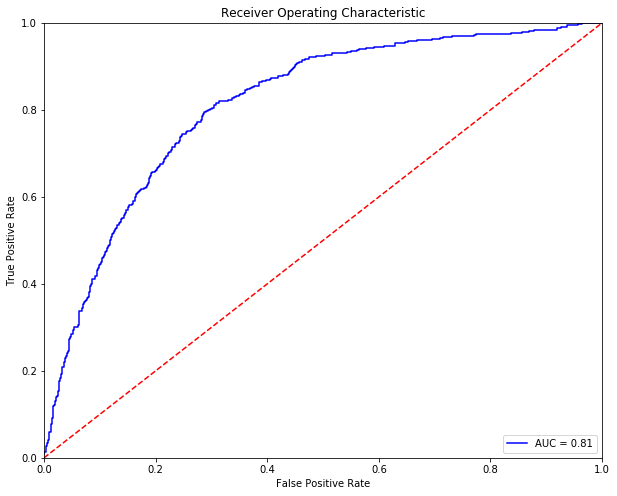

Optimal Threshold is 0.309715
Accuracy of Logistic Model on training data is: 0.746229849194


Predicted   0.0  1.0  __all__
Actual                       
0.0        1008  342     1350
1.0         146  427      573
__all__    1154  769     1923

In [447]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [448]:
table_70_70_PCA_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [449]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.0min finished


The accuracy of the model on training data is: 0.803209271228


Predicted     0     1  __all__
Actual                        
0          2635   502     3137
1           381   969     1350
__all__    3016  1471     4487

The accuracy of the model on test data is: 0.784191367655


Predicted     0    1  __all__
Actual                       
0          1120  230     1350
1           185  388      573
__all__    1305  618     1923

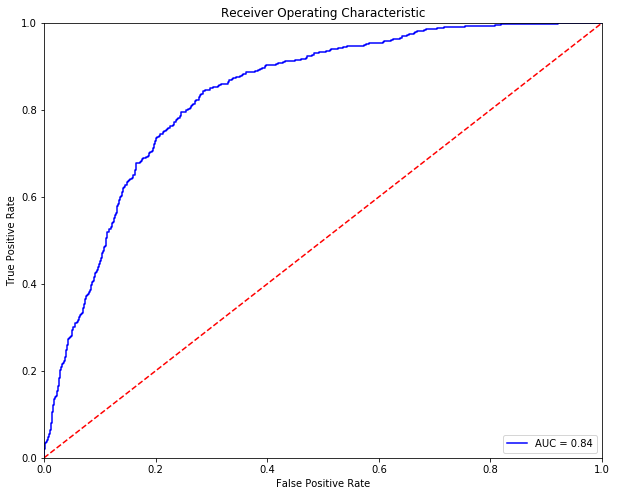

Optimal Threshold is 0.321188
Accuracy on test data is: 0.767030681227


Predicted   0.0  1.0  __all__
Actual                       
0.0        1036  314     1350
1.0         134  439      573
__all__    1170  753     1923

In [450]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [451]:
table_70_70_PCA_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [452]:
table_70_70_PCA_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_PCA_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_PCA_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_70_PCA_10_test.set_index(['index'],drop=True,inplace=True)
table_70_70_PCA_10_train.set_index(['index'],drop=True,inplace=True)
table_70_70_PCA_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_70_PCA_10_train)

print("Comparision Table for Test Accuracies:")
display(table_70_70_PCA_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_70_PCA_10_test_roc)

Comparision Table for Training Accuracies:


accuracy          TP          TN         FP  \
index                                                                     
KNeighborsClassifier        1.000000  1350.00000  3137.00000    0.00000   
LogisticRegression          0.775128  1019.00000  2459.00000  678.00000   
RandomForestClassifier      0.699131  2193.17339   943.82661  943.82661   
AdaBoostClassifier          0.791843   910.00000  2643.00000  494.00000   
GradientBoostingClassifier  0.798975   869.00000  2716.00000  421.00000   
ExtraTreeClassifier         0.810118   896.00000  2739.00000  398.00000   
BaggingClassifier           0.960330  1181.00000  3128.00000    9.00000   
VotingClassifier            0.940940  1094.00000  3128.00000    9.00000   
Neural Network-1            0.855360   998.00000  2840.00000  297.00000   
Neural-Network-2            0.803209   969.00000  2635.00000  502.00000   

                                   FN       FPR       FNR  
index                                                      
KNeighborsClassifier          0.00000  0.000000  0.000000  
LogisticRegression          331.00000  0.216130  0.245185  
RandomForestClassifier      406.17339  0.699131  0.300869  
AdaBoostClassifier          440.00000  0.157475  0.325926  
GradientBoostingClassifier  481.00000  0.134205  0.356296  
ExtraTreeClassifier         454.00000  0.126873  0.336296  
BaggingClassifier           169.00000  0.002869  0.125185  
VotingClassifier            256.00000  0.002869  0.189630  
Neural Network-1            352.00000  0.094676  0.260741  
Neural-Network-2            381.00000  0.160026  0.282222

Comparision Table for Test Accuracies:


accuracy         TP          TN         FP  \
index                                                                    
KNeighborsClassifier        0.769111  263.00000  1216.00000  134.00000   
LogisticRegression          0.777951  432.00000  1064.00000  286.00000   
RandomForestClassifier      0.702028  947.73791   402.26209  402.26209   
AdaBoostClassifier          0.775351  370.00000  1121.00000  229.00000   
GradientBoostingClassifier  0.777431  345.00000  1150.00000  200.00000   
ExtraTreeClassifier         0.759230  327.00000  1133.00000  217.00000   
BaggingClassifier           0.766511  302.00000  1172.00000  178.00000   
VotingClassifier            0.757150  265.00000  1191.00000  159.00000   
Neural Network-1            0.764951  333.00000  1138.00000  212.00000   
Neural-Network-2            0.784191  388.00000  1120.00000  230.00000   

                                   FN       FPR       FNR  
index                                                      
KNeighborsClassifier        310.00000  0.099259  0.541012  
LogisticRegression          141.00000  0.211852  0.246073  
RandomForestClassifier      170.73791  0.702028  0.297972  
AdaBoostClassifier          203.00000  0.169630  0.354276  
GradientBoostingClassifier  228.00000  0.148148  0.397906  
ExtraTreeClassifier         246.00000  0.160741  0.429319  
BaggingClassifier           271.00000  0.131852  0.472949  
VotingClassifier            308.00000  0.117778  0.537522  
Neural Network-1            240.00000  0.157037  0.418848  
Neural-Network-2            185.00000  0.170370  0.322862

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.762871  436.0  1031.0  319.0  137.0  0.236296   
LogisticRegression          0.774311  442.0  1047.0  303.0  131.0  0.224444   
RandomForestClassifier      0.772231  431.0  1054.0  296.0  142.0  0.219259   
AdaBoostClassifier          0.772231  414.0  1071.0  279.0  159.0  0.206667   
GradientBoostingClassifier  0.769111  440.0  1039.0  311.0  133.0  0.230370   
ExtraTreeClassifier         0.757150  396.0  1060.0  290.0  177.0  0.214815   
BaggingClassifier           0.760790  433.0  1030.0  320.0  140.0  0.237037   
VotingClassifier            0.745710  427.0  1007.0  343.0  146.0  0.254074   
Neural Network-1            0.746230  427.0  1008.0  342.0  146.0  0.253333   
Neural-Network-2            0.767031  439.0  1036.0  314.0  134.0  0.232593   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.239092   0.276932  0.823843  
LogisticRegression          0.228621   0.489571  0.838600  
RandomForestClassifier      0.247818   0.327961  0.790887  
AdaBoostClassifier          0.277487   0.490712  0.831493  
GradientBoostingClassifier  0.232112   0.333500  0.836366  
ExtraTreeClassifier         0.308901   0.316667  0.788546  
BaggingClassifier           0.244328   0.376667  0.823462  
VotingClassifier            0.254799   0.358746  0.814419  
Neural Network-1            0.254799   0.309715  0.812493  
Neural-Network-2            0.233857   0.321188  0.836373

#### Random State 20

In [453]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_70_30_3_17_random_state_20.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    4487
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  1580  297.743038   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  2071   92.849831   

                                                           PAS        LEN  \
Source_User                                                                 
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  121.938608  75.572152   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   68.084500  85.015451   

                                                             BYS  \
Source_User                                                        
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  10785.806962   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   9264.509416   

                                                              BYR      SP  \
Source_User                                                                 
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  373515.271519  1513.0   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  113797.491067  1908.0   

                                                      DP  NAPP  SIP  DIP  \
Source_User                                                                
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  12.0    30   34  415   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  18.0    44   58  538   

                                                           TDIF  0000  0100  \
Source_User                                                                   
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...  2816.703797    18    34   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...  2378.489136   200   135   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    54    15    18    46   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    60    81    56   117   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    81    30    43    44   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    50    80   174    78   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    47    92    79    47   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...   145    77    57    41   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    56    60    40   119   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    41    49    29    66   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    88   127   191   167   
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    37    72    45   122   

                                                    2200  2300  
Source_User                                                     
73592328e1aba504b315fc06ce72a444a3afa3ca071ce13...    45    39  
5393c0df6a44651953827b1afab0c1c821dbdc352b1b882...    68   191

1 -> Infected
0 -> Uninfected


Source_User
73592328e1aba504b315fc06ce72a444a3afa3ca071ce135c6519b653b782900    0
5393c0df6a44651953827b1afab0c1c821dbdc352b1b88263f9d325b00bf1b7d    0
20e2144674cba74b4658c48eb02e290912cdf7d9815e9f0a8913e8f253d40b3c    0
0a8a122a1d0a74f656a8c288853357fe1e8ee2681f2308f75b9217f8dd73489d    0
e39c9093096a6ba89ad4d2e3987b430f8f6f8a86a6e73fc80bf4b5e0408e0edd    0
c82e979deebbc9c33760931128b2552d94d73128806ee7f3ebe1bdd3f7ca5c21    0
de1af22a9df53353a6f2c79696966a215a429a47150cd06de7b4f39b2f8e9976    0
a4a89c63ce9691738b6b014ae723928e73b2bc57ddb4bce98beb47cdce1ab45e    0
d8ccad69e30b55cf1048301d2fb7cd696a0ecab46a80e73f992ac427cd241e77    0
b7826c03e71919e65e0236c1bb7fb63e1de351fbc74c65b9ddb5cfe7c19881b0    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.97709676314
The train/test split ratio is 70:30


In [454]:
display(X_pca_13[0:1])

array([[-0.03999358, -0.01754298, -0.00368504,  0.08002672, -0.20700933,
         0.12087721,  0.22427239,  0.50013178, -0.41189911, -0.04990236,
         0.11457435,  0.52438326, -0.80044724]])

In [455]:
## Table to store training and test measures
table_70_70_PCA_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_PCA_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_70_PCA_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [456]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3128     0     3128
1             0  1359     1359
__all__    3128  1359     4487

Accuracy of the  KNN  model for test data is: 0.788871554862

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1199  160     1359
1           246  318      564
__all__    1445  478     1923

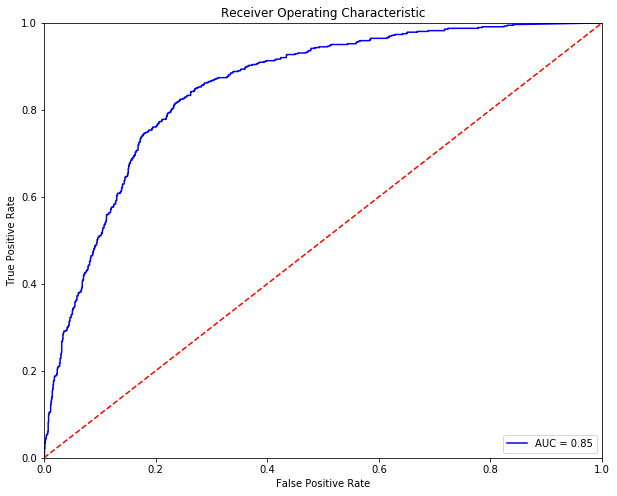

Optimal Threshold is 0.320465970972
Accuracy on test data is: 0.78107124285


Predicted   0.0  1.0  __all__
Actual                       
0.0        1062  297     1359
1.0         124  440      564
__all__    1186  737     1923

In [457]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [458]:
table_70_70_PCA_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [459]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False          False                0.5       100  multinomial   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  1e-05

Accuracy of the  Logistic  model for the training data is: 0.779808335191

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2465   663     3128
1           325  1034     1359
__all__    2790  1697     4487

Accuracy of the  Logistic  model for test data is: 0.786271450858

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1081  278     1359
1           133  431      564
__all__    1214  709     1923

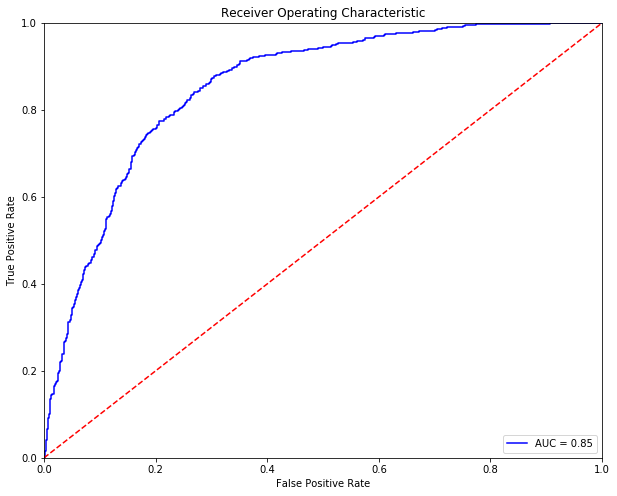

Optimal Threshold is 0.490462585749
Accuracy on test data is: 0.781591263651


Predicted   0.0  1.0  __all__
Actual                       
0.0        1063  296     1359
1.0         124  440      564
__all__    1187  736     1923

In [460]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [461]:
table_70_70_PCA_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [462]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[100,200],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])

rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           100      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.697125027858

Confusion Matrix for Training data is:


Predicted     0  1  __all__
Actual                     
0          3128  0     3128
1          1359  0     1359
__all__    4487  0     4487

Accuracy of the  Random Forest Trees  model for test data is: 0.706708268331

Confusion Matrix for test data is:


Predicted     0  1  __all__
Actual                     
0          1359  0     1359
1           564  0      564
__all__    1923  0     1923

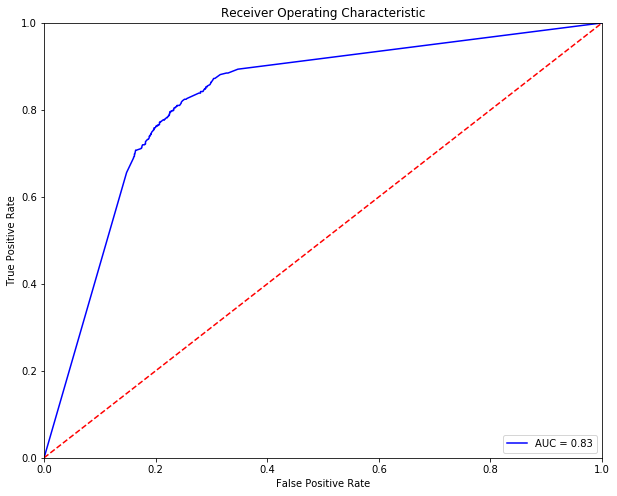

Optimal Threshold is 0.333399472529
Accuracy on test data is: 0.782111284451


Predicted   0.0  1.0  __all__
Actual                       
0.0        1065  294     1359
1.0         125  439      564
__all__    1190  733     1923

In [463]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [464]:
%%capture
table_70_70_PCA_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

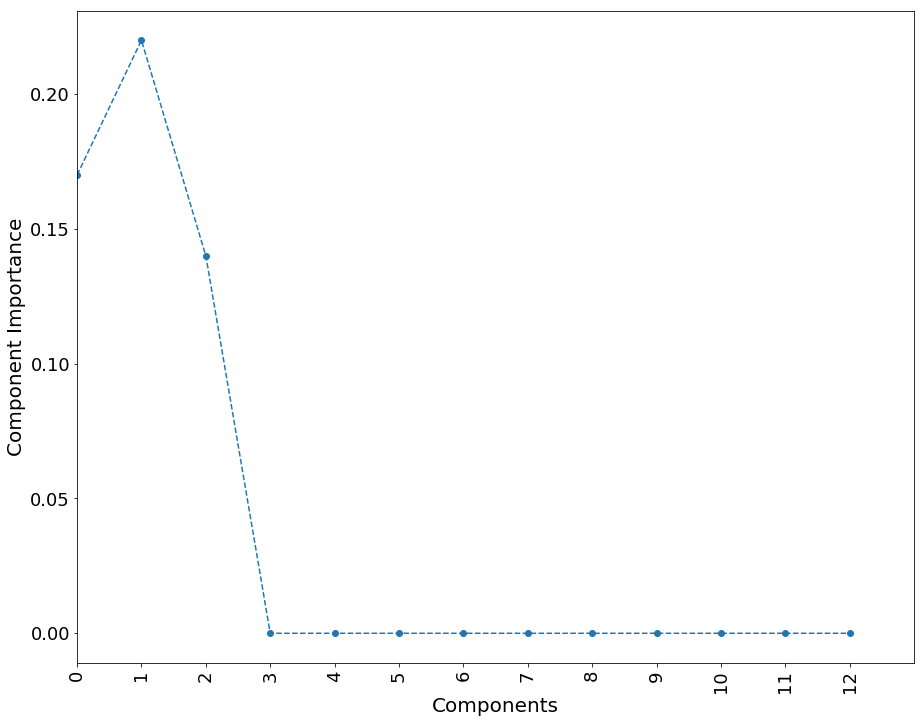

In [465]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [466]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.786048584801

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2549   579     3128
1           381   978     1359
__all__    2930  1557     4487

Accuracy of the  AdaBoostClassifier  model for test data is: 0.788351534061

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1107  252     1359
1           155  409      564
__all__    1262  661     1923

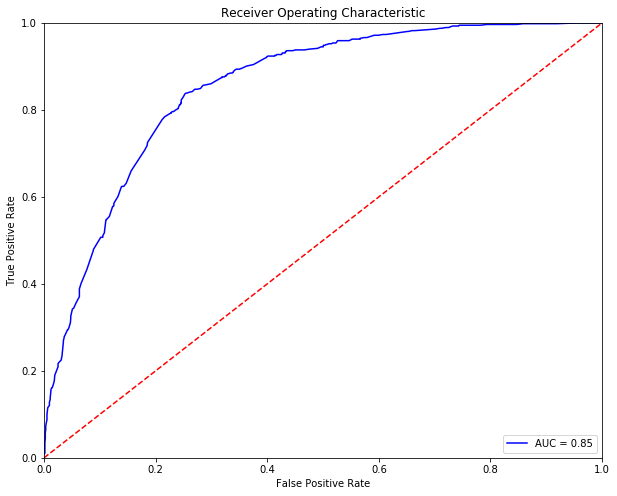

Optimal Threshold is 0.499569925979
Accuracy on test data is: 0.784711388456


Predicted   0.0  1.0  __all__
Actual                       
0.0        1069  290     1359
1.0         124  440      564
__all__    1193  730     1923

In [467]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [468]:
table_70_70_PCA_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

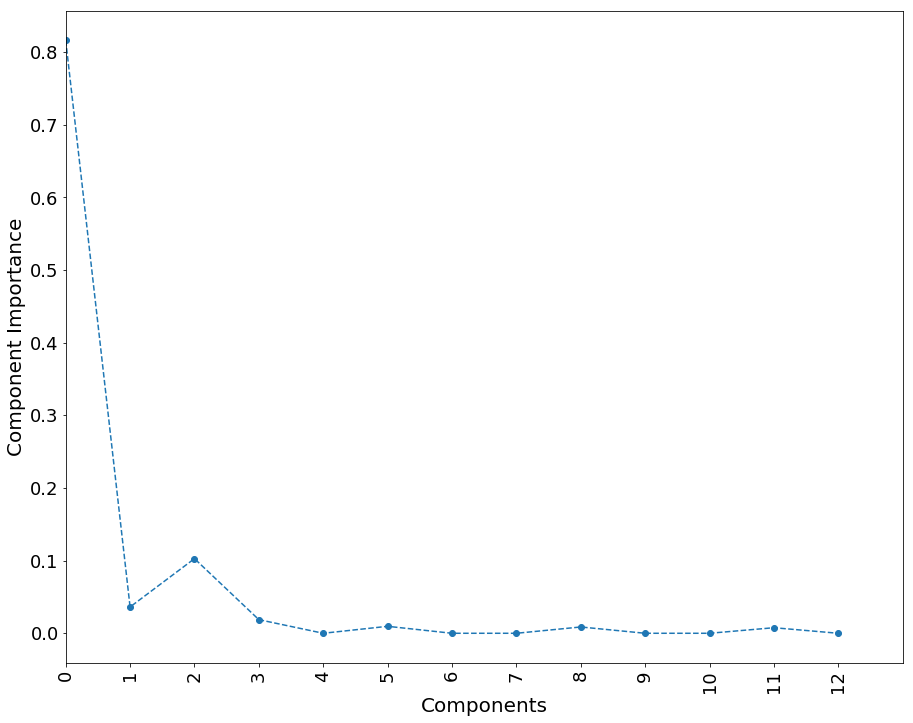

In [469]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [470]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1           100             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.791620236238

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2650   478     3128
1           457   902     1359
__all__    3107  1380     4487

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.79355174207

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1156  203     1359
1           194  370      564
__all__    1350  573     1923

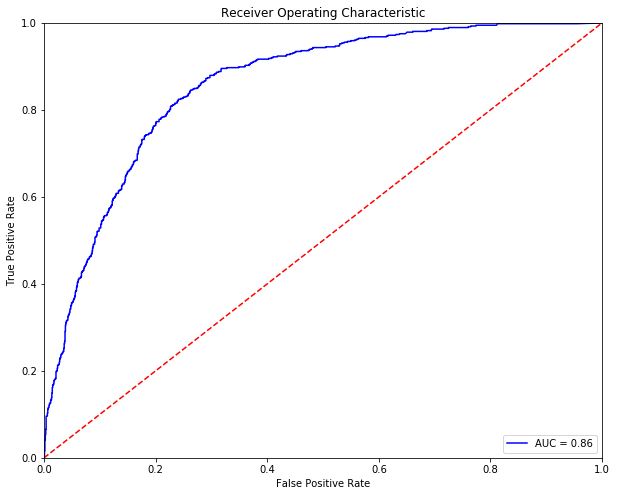

Optimal Threshold is 0.36297716283
Accuracy on test data is: 0.784711388456


Predicted   0.0  1.0  __all__
Actual                       
0.0        1067  292     1359
1.0         122  442      564
__all__    1189  734     1923

In [471]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [472]:
table_70_70_PCA_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

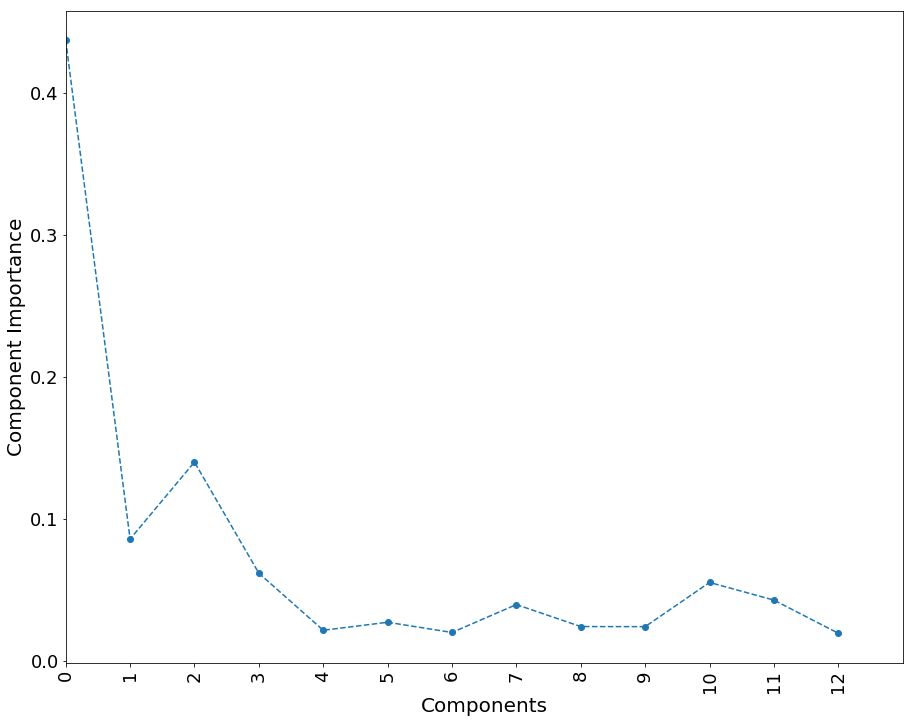

In [473]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [474]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.789168709606

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          2595   533     3128
1           413   946     1359
__all__    3008  1479     4487

Accuracy of the  Extra Decision Tree  model for test data is: 0.796151846074

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1135  224     1359
1           168  396      564
__all__    1303  620     1923

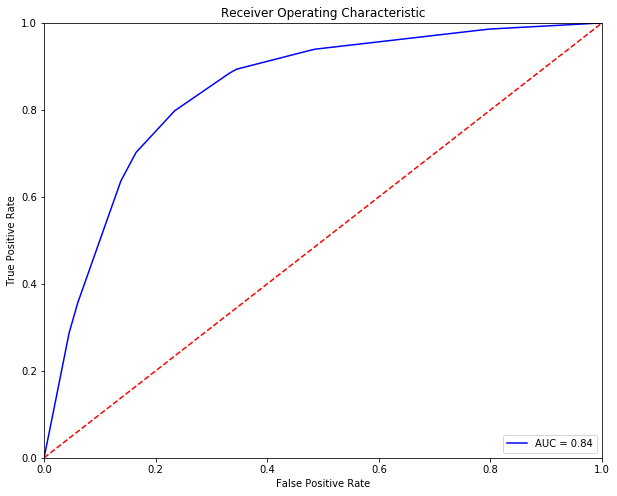

Optimal Threshold is 0.380681818182
Accuracy on test data is: 0.796151846074


Predicted   0.0  1.0  __all__
Actual                       
0.0        1135  224     1359
1.0         168  396      564
__all__    1303  620     1923

In [475]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [476]:
table_70_70_PCA_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [477]:
%%capture
table_70_70_PCA_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

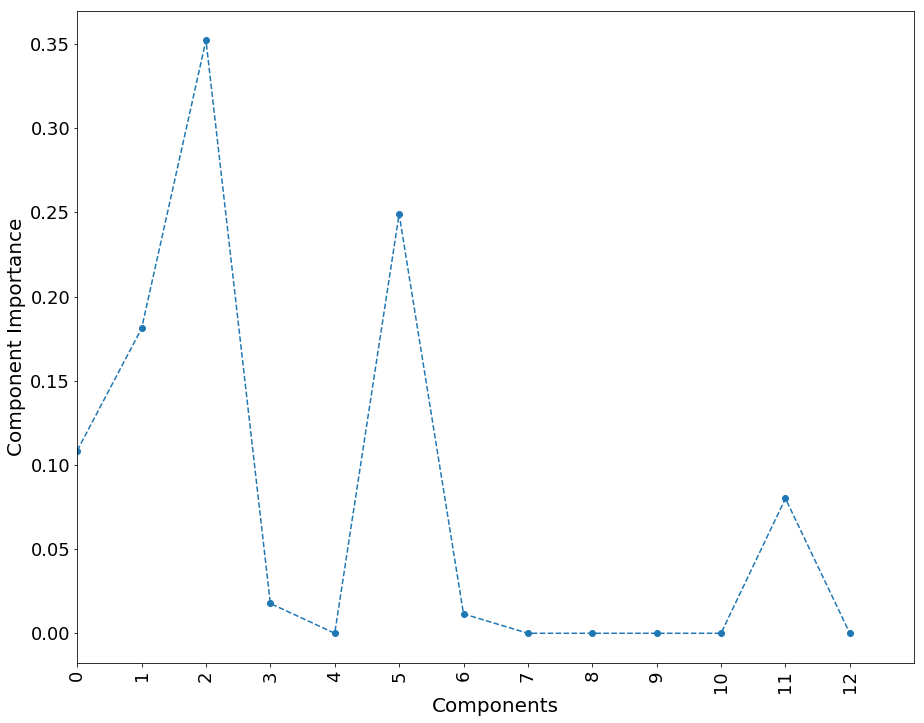

In [478]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [479]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[300,100], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.927122799198

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          3047    81     3128
1           246  1113     1359
__all__    3293  1194     4487

Accuracy of the  Bagging  model for test data is: 0.794071762871

Confusion Matrix for test data is:


Predicted     0    1  __all__
Actual                       
0          1174  185     1359
1           211  353      564
__all__    1385  538     1923

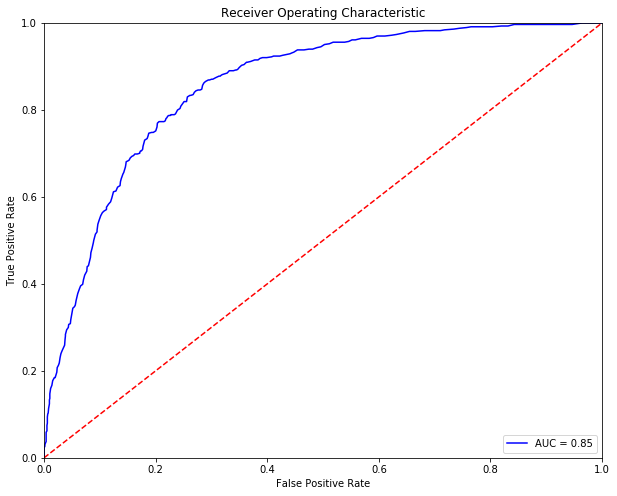

Optimal Threshold is 0.38
Accuracy on test data is: 0.780551222049


Predicted   0.0  1.0  __all__
Actual                       
0.0        1064  295     1359
1.0         127  437      564
__all__    1191  732     1923

In [480]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [481]:
table_70_70_PCA_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [482]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.939826164475


Predicted     0     1  __all__
Actual                        
0          3107    21     3128
1           249  1110     1359
__all__    3356  1131     4487

The test accuracy is: 0.775351014041


Predicted     0    1  __all__
Actual                       
0          1183  176     1359
1           256  308      564
__all__    1439  484     1923

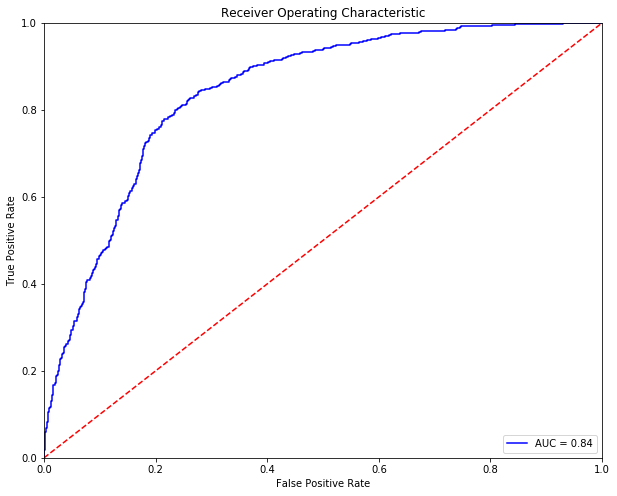

Optimal Threshold is 0.36386884142
Accuracy on test data is: 0.778471138846


Predicted   0.0  1.0  __all__
Actual                       
0.0        1057  302     1359
1.0         124  440      564
__all__    1181  742     1923

In [483]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [484]:
table_70_70_PCA_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [485]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.865166035213


Predicted     0     1  __all__
Actual                        
0          2929   199     3128
1           406   953     1359
__all__    3335  1152     4487

The accuracy of the model on test data is: 0.770670826833


Predicted     0    1  __all__
Actual                       
0          1174  185     1359
1           256  308      564
__all__    1430  493     1923

1920/1923 [============================>.] - ETA: 0s

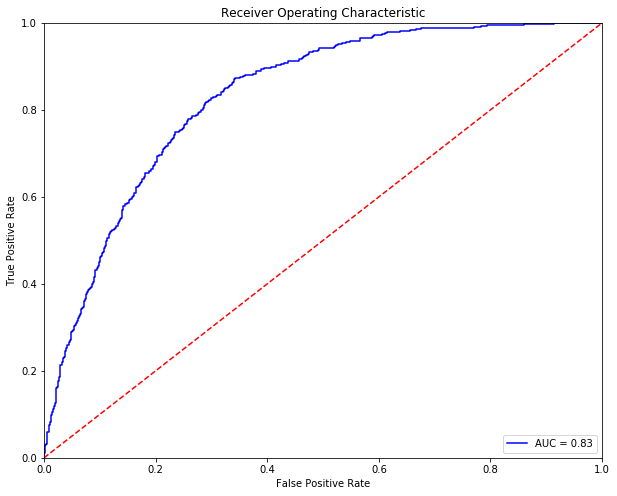

Optimal Threshold is 0.299402
Accuracy of Logistic Model on training data is: 0.752990119605


Predicted   0.0  1.0  __all__
Actual                       
0.0        1023  336     1359
1.0         139  425      564
__all__    1162  761     1923

In [486]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [487]:
table_70_70_PCA_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [488]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.6min finished


The accuracy of the model on training data is: 0.794517494986


Predicted     0     1  __all__
Actual                        
0          2716   412     3128
1           510   849     1359
__all__    3226  1261     4487

The accuracy of the model on test data is: 0.793031721269


Predicted     0    1  __all__
Actual                       
0          1180  179     1359
1           219  345      564
__all__    1399  524     1923

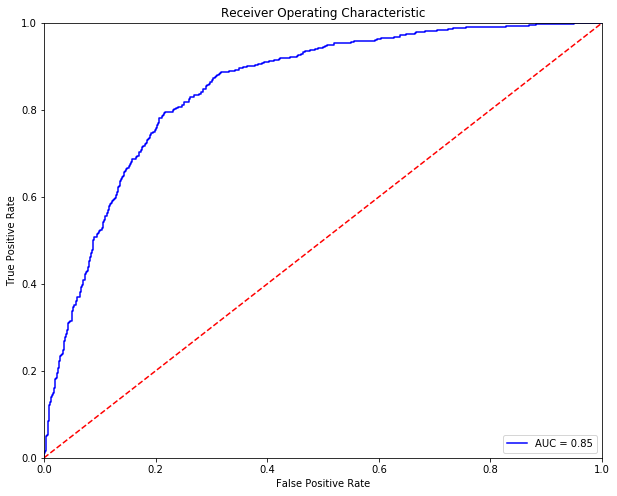

Optimal Threshold is 0.415883
Accuracy on test data is: 0.786791471659


Predicted   0.0  1.0  __all__
Actual                       
0.0        1070  289     1359
1.0         121  443      564
__all__    1191  732     1923

In [489]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [490]:
table_70_70_PCA_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_70_PCA_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_70_PCA_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [491]:
table_70_70_PCA_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_PCA_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_70_PCA_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_70_PCA_20_test.set_index(['index'],drop=True,inplace=True)
table_70_70_PCA_20_train.set_index(['index'],drop=True,inplace=True)
table_70_70_PCA_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_70_PCA_20_train)

print("Comparision Table for Test Accuracies:")
display(table_70_70_PCA_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_70_PCA_20_test_roc)

Comparision Table for Training Accuracies:


accuracy           TP           TN          FP  \
index                                                                        
KNeighborsClassifier        1.000000  1359.000000  3128.000000    0.000000   
LogisticRegression          0.779808  1034.000000  2465.000000  663.000000   
RandomForestClassifier      0.697125  2180.607087   947.392913  947.392913   
AdaBoostClassifier          0.786049   978.000000  2549.000000  579.000000   
GradientBoostingClassifier  0.791620   902.000000  2650.000000  478.000000   
ExtraTreeClassifier         0.789169   946.000000  2595.000000  533.000000   
BaggingClassifier           0.927123  1113.000000  3047.000000   81.000000   
VotingClassifier            0.939826  1110.000000  3107.000000   21.000000   
Neural Network-1            0.865166   953.000000  2929.000000  199.000000   
Neural-Network-2            0.794517   849.000000  2716.000000  412.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier          0.000000  0.000000  0.000000  
LogisticRegression          325.000000  0.211957  0.239146  
RandomForestClassifier      411.607087  0.697125  0.302875  
AdaBoostClassifier          381.000000  0.185102  0.280353  
GradientBoostingClassifier  457.000000  0.152813  0.336277  
ExtraTreeClassifier         413.000000  0.170396  0.303900  
BaggingClassifier           246.000000  0.025895  0.181015  
VotingClassifier            249.000000  0.006714  0.183223  
Neural Network-1            406.000000  0.063619  0.298749  
Neural-Network-2            510.000000  0.131714  0.375276

Comparision Table for Test Accuracies:


accuracy          TP           TN          FP  \
index                                                                       
KNeighborsClassifier        0.788872  318.000000  1199.000000  160.000000   
LogisticRegression          0.786271  431.000000  1081.000000  278.000000   
RandomForestClassifier      0.706708  960.416537   398.583463  398.583463   
AdaBoostClassifier          0.788352  409.000000  1107.000000  252.000000   
GradientBoostingClassifier  0.793552  370.000000  1156.000000  203.000000   
ExtraTreeClassifier         0.796152  396.000000  1135.000000  224.000000   
BaggingClassifier           0.794072  353.000000  1174.000000  185.000000   
VotingClassifier            0.775351  308.000000  1183.000000  176.000000   
Neural Network-1            0.770671  308.000000  1174.000000  185.000000   
Neural-Network-2            0.793032  345.000000  1180.000000  179.000000   

                                    FN       FPR       FNR  
index                                                       
KNeighborsClassifier        246.000000  0.117734  0.436170  
LogisticRegression          133.000000  0.204562  0.235816  
RandomForestClassifier      165.416537  0.706708  0.293292  
AdaBoostClassifier          155.000000  0.185430  0.274823  
GradientBoostingClassifier  194.000000  0.149375  0.343972  
ExtraTreeClassifier         168.000000  0.164827  0.297872  
BaggingClassifier           211.000000  0.136130  0.374113  
VotingClassifier            256.000000  0.129507  0.453901  
Neural Network-1            256.000000  0.136130  0.453901  
Neural-Network-2            219.000000  0.131714  0.388298

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP      TN     FP     FN       FPR  \
index                                                                         
KNeighborsClassifier        0.781071  440.0  1062.0  297.0  124.0  0.218543   
LogisticRegression          0.781591  440.0  1063.0  296.0  124.0  0.217807   
RandomForestClassifier      0.782111  439.0  1065.0  294.0  125.0  0.216336   
AdaBoostClassifier          0.784711  440.0  1069.0  290.0  124.0  0.213392   
GradientBoostingClassifier  0.784711  442.0  1067.0  292.0  122.0  0.214864   
ExtraTreeClassifier         0.796152  396.0  1135.0  224.0  168.0  0.164827   
BaggingClassifier           0.780551  437.0  1064.0  295.0  127.0  0.217071   
VotingClassifier            0.778471  440.0  1057.0  302.0  124.0  0.222222   
Neural Network-1            0.752990  425.0  1023.0  336.0  139.0  0.247241   
Neural-Network-2            0.786791  443.0  1070.0  289.0  121.0  0.212656   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.219858   0.320466  0.851740  
LogisticRegression          0.219858   0.490463  0.853207  
RandomForestClassifier      0.221631   0.333399  0.826893  
AdaBoostClassifier          0.219858   0.499570  0.853043  
GradientBoostingClassifier  0.216312   0.362977  0.855908  
ExtraTreeClassifier         0.297872   0.380682  0.844060  
BaggingClassifier           0.225177   0.380000  0.854682  
VotingClassifier            0.219858   0.363869  0.841904  
Neural Network-1            0.246454   0.299402  0.831102  
Neural-Network-2            0.214539   0.415883  0.850629

In [492]:
table_70_70_PCA_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_70_PCA_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_70_PCA_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [493]:
table_70_70_PCA_train_avg['accuracy']=(table_70_70_PCA_0_train['accuracy']+table_70_70_PCA_10_train['accuracy']+table_70_70_PCA_20_train['accuracy'])/3.0
table_70_70_PCA_train_avg['FPR']=(table_70_70_PCA_0_train['FPR']+table_70_70_PCA_10_train['FPR']+table_70_70_PCA_20_train['FPR'])/3.0
table_70_70_PCA_train_avg['FNR']=(table_70_70_PCA_0_train['FNR']+table_70_70_PCA_10_train['FNR']+table_70_70_PCA_20_train['FNR'])/3.0

In [494]:
table_70_70_PCA_test_avg['accuracy']=(table_70_70_PCA_0_test['accuracy']+table_70_70_PCA_10_test['accuracy']+table_70_70_PCA_20_test['accuracy'])/3.0
table_70_70_PCA_test_avg['FPR']=(table_70_70_PCA_0_test['FPR']+table_70_70_PCA_10_test['FPR']+table_70_70_PCA_20_test['FPR'])/3.0
table_70_70_PCA_test_avg['FNR']=(table_70_70_PCA_0_test['FNR']+table_70_70_PCA_10_test['FNR']+table_70_70_PCA_20_test['FNR'])/3.0

In [495]:
table_70_70_PCA_test_roc_avg['accuracy']=(table_70_70_PCA_0_test_roc['accuracy']+table_70_70_PCA_10_test_roc['accuracy']+table_70_70_PCA_20_test_roc['accuracy'])/3.0
table_70_70_PCA_test_roc_avg['FPR']=(table_70_70_PCA_0_test_roc['FPR']+table_70_70_PCA_10_test_roc['FPR']+table_70_70_PCA_20_test_roc['FPR'])/3.0
table_70_70_PCA_test_roc_avg['FNR']=(table_70_70_PCA_0_test_roc['FNR']+table_70_70_PCA_10_test_roc['FNR']+table_70_70_PCA_20_test_roc['FNR'])/3.0
table_70_70_PCA_test_roc_avg['auc']=(table_70_70_PCA_0_test_roc['auc']+table_70_70_PCA_10_test_roc['auc']+table_70_70_PCA_20_test_roc['auc'])/3.0

In [496]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_70_70_PCA_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_70_70_PCA_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_70_PCA_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        1.000000  0.000000  0.000000
LogisticRegression          0.777283  0.182061  0.316786
RandomForestClassifier      0.698165  0.698165  0.301835
AdaBoostClassifier          0.789169  0.157069  0.335279
GradientBoostingClassifier  0.801501  0.133549  0.348780
ExtraTreeClassifier         0.789392  0.122390  0.414777
BaggingClassifier           0.939306  0.015865  0.164351
VotingClassifier            0.941163  0.004258  0.185092
Neural Network-1            0.864869  0.074895  0.274384
Neural-Network-2            0.800683  0.135442  0.346936

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.778991  0.102119  0.503818
LogisticRegression          0.782285  0.174748  0.319974
RandomForestClassifier      0.704282  0.704282  0.295718
AdaBoostClassifier          0.783845  0.159958  0.349711
GradientBoostingClassifier  0.788698  0.141272  0.377931
ExtraTreeClassifier         0.773271  0.133387  0.448607
BaggingClassifier           0.779858  0.127239  0.441112
VotingClassifier            0.769977  0.121572  0.488061
Neural Network-1            0.769284  0.144990  0.435029
Neural-Network-2            0.787658  0.143285  0.377065

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.771364  0.228176  0.229726  0.838509
LogisticRegression          0.778818  0.220534  0.222721  0.846028
RandomForestClassifier      0.780725  0.211176  0.238498  0.809326
AdaBoostClassifier          0.780378  0.211413  0.239010  0.844528
GradientBoostingClassifier  0.780031  0.219559  0.220945  0.848729
ExtraTreeClassifier         0.770497  0.175784  0.357501  0.820777
BaggingClassifier           0.772231  0.224979  0.234416  0.840152
VotingClassifier            0.762524  0.237544  0.237305  0.831334
Neural Network-1            0.750390  0.249330  0.250271  0.820882
Neural-Network-2            0.779685  0.219810  0.221522  0.846182

In [2]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')